# LOAD Packages

In [1]:
!git clone https://github.com/marianopoisson/ModelingArs ARSFIT

Cloning into 'ARSFIT'...
remote: Enumerating objects: 211, done.
remote: Counting objects: 100% (211/211), done.
remote: Compressing objects: 100% (189/189), done.
remote: Total 211 (delta 65), reused 121 (delta 21), pack-reused 0 (from 0)
Receiving objects: 100% (211/211), 38.38 MiB | 12.93 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.lines as mlines
from scipy.io import readsav
from scipy import ndimage
from scipy.stats import skew
import matplotlib.transforms as mtransforms
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
# import math
import glob as glob
import seaborn as sns
from scipy.stats import linregress


#import sys
#sys.path.append('./ARSFIT/')

from scipy import stats

import os

#from funciones.opencube2 import opencube2
#from funciones.func4 import tilt,elong,MFLUX,barys,set_ranges,sizes
#from funciones.modelcube import modelmag,modelmagf,modelmag2

from IPython.display import display, HTML
display(HTML("<style>.output_scroll {height: 400px; overflow-y: scroll;}</style>"))

In [3]:
%cd /content/ARSFIT/stats-tilt/

/content/ARSFIT/stats-tilt


In [4]:
DF=pd.read_csv('compare-params-TM3-B.csv')

# Polarity separation

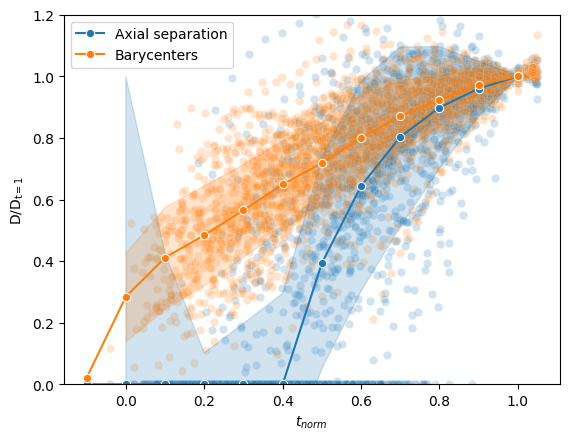

In [30]:
DFx2=DFx.assign(frac=lambda x: np.sign(x.alpha*x.alphab)*np.abs(x.alpha-x.alphab)/np.abs(x.alphab))
DFx2=DFx2.assign(t_mean=lambda x: round(10*x.t_norm)/10)

DFx2=DFx2[DFx2.t_mean<=1]


DFmax_D = (
    DFx2[DFx2.t_mean == 1]
    .groupby("AR")[["sar", "sepax"]]
    .mean()
    .reset_index()
    .rename(columns={"sar": "sar_max", "sepax": "sepax_max"})
)

DFx2 = DFx2.merge(DFmax_D, on="AR", how="left")


sns.scatterplot(data=DFx2.assign(sepax=lambda x: x.sepax/x.sepax_max),x='t_norm',y='sepax',alpha=0.2)
sns.scatterplot(data=DFx2.assign(sar=lambda x: x.sar/x.sar_max),x='t_norm',y='sar',alpha=0.2)

DFx2=DFx2.groupby(['AR','t_mean']).median().reset_index()


sns.lineplot(data=DFx2.assign(sepax=lambda x: x.sepax/x.sepax_max),x='t_mean',y='sepax',estimator='median',
errorbar='sd',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
err_style='band',   # o 'bars' para barras verticales
marker='o',label='Axial separation'
          )
sns.lineplot(data=DFx2.assign(sar=lambda x: x.sar/x.sar_max),x='t_mean',y='sar',estimator='median',
errorbar='sd',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
err_style='band',   # o 'bars' para barras verticales
marker='o',label='Barycenters'

             )

plt.legend()
plt.ylim(0,1.2)
plt.ylabel(r'D/D$_\mathrm{t=1}$')
plt.xlabel(r'$t_{norm}$')
plt.show()


In [81]:
DFx

AR      alpha     alphab    t_norm   lat        fn        Nt  \
0    8193  55.413941  17.580973  0.001103 -22.0  0.050234  0.468819   
1    8193  52.658806  17.694912  0.067696 -22.0  0.066990  0.468819   
2    8193  26.857078  15.790828  0.134289 -22.0  0.107903  0.468819   
3    8193  20.252607   9.252872  0.200882 -22.0  0.143195  0.468819   
4    8193  19.019187   9.131157  0.267475 -22.0  0.195707  0.468819   
..    ...        ...        ...       ...   ...       ...       ...   
15  10747  -2.532979  -2.883163  0.790109  -7.0  0.609831 -0.279194   
16  10747  -3.766676  -2.948410  0.842582  -7.0  0.715223 -0.279194   
17  10747  -8.162120  -3.470280  0.895055  -7.0  0.802347 -0.279194   
18  10747  -8.328748  -2.716777  0.947527  -7.0  0.911246 -0.279194   
19  10747  -3.312615  -1.507657  1.000000  -7.0  0.981142 -0.279194   

          sar      sepax   mag          flux    d_norm  
0   27.404675   0.000000   0.0  5.281523e+20  0.002347  
1   22.574678   0.000000   4.0  7.043322e+20  0.052230  
2   24.657657   0.000000   8.0  1.134488e+21  0.102112  
3   27.584949   0.000000  12.0  1.505539e+21  0.151995  
4   30.701854   0.000000  16.0  2.057652e+21  0.201877  
..        ...        ...   ...           ...       ...  
15  50.768554  63.871315  45.0  4.781975e+21  0.789850  
16  50.178550  63.228762  48.0  5.608403e+21  0.842388  
17  52.920804  60.286301  51.0  6.291583e+21  0.894925  
18  55.223317  62.192506  54.0  7.145513e+21  0.947463  
19  57.687773  64.157412  57.0  7.693606e+21  1.000000  

[2845 rows x 12 columns]

# Plots for norm time

(0.0, 1.0)

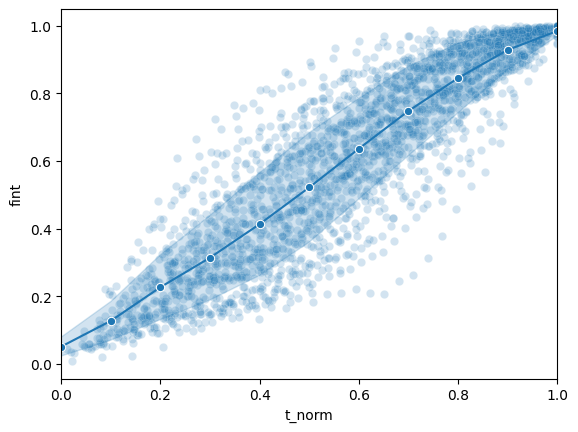

In [31]:
DFx2=DFx.assign(frac=lambda x: x.alpha-x.alphab)
DFx2=DFx2.assign(t_mean=lambda x: round(10*x.t_norm)/10)


g=sns.scatterplot(data=DFx2,x='t_norm',y='fint',alpha=0.2)

DFx2=DFx2.groupby(['AR','t_mean']).mean().reset_index()
g=sns.lineplot(
data=DFx2,
x='t_mean',
y='fint',
estimator='mean',
errorbar='sd',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
err_style='band',   # o 'bars' para barras verticales
marker='o'          # opcional para marcar puntos medios
)
#   sns.lineplot(data=DFx2.groupby(['t_norm','variable']).median().reset_index(),x='t_norm',y='value',hue='variable')
plt.xlim(0,1)

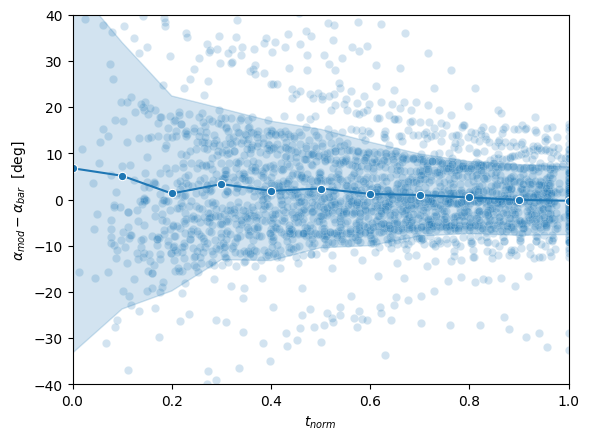

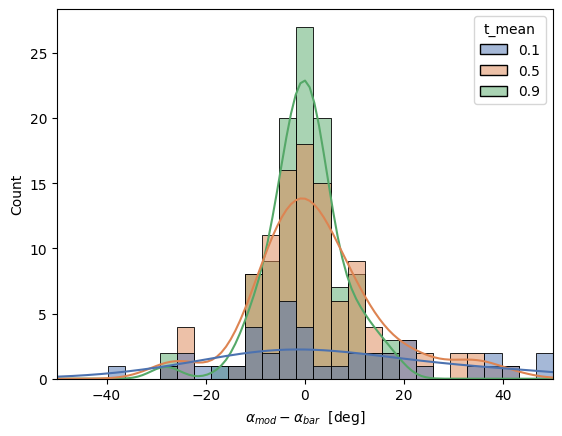

In [32]:

DFx2=DFx.assign(frac=lambda x: x.alpha-x.alphab)
DFx2=DFx2.assign(t_mean=lambda x: round(10*x.t_norm)/10)


g=sns.scatterplot(data=DFx2,x='t_norm',y='frac',alpha=0.2)

DFx2=DFx2.groupby(['AR','t_mean']).mean().reset_index()
g=sns.lineplot(
data=DFx2,
x='t_mean',
y='frac',
estimator='mean',
errorbar='sd',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
err_style='band',   # o 'bars' para barras verticales
marker='o'          # opcional para marcar puntos medios
)
#   sns.lineplot(data=DFx2.groupby(['t_norm','variable']).median().reset_index(),x='t_norm',y='value',hue='variable')
plt.xlim(0,1)
plt.ylim(-40,40)

plt.ylabel(r'$\alpha_{mod}-\alpha_{bar}$  [deg]')
plt.xlabel(r'$t_{norm}$')
plt.show()


sns.histplot(data=DFx2[DFx2.t_mean.isin([0.1,0.5,0.9])],x='frac',hue='t_mean',palette='deep',
             binrange=(-50,50)
             ,kde=True,multiple='layer')

plt.xlim(-50,50)
plt.xlabel(r'$\alpha_{mod}-\alpha_{bar}$  [deg]')

plt.show()


In [33]:
DFx['stp'] = DFx.groupby('AR')['mag'].transform(lambda x: np.gradient(x))

In [34]:
DFx[DFx.AR==10268]

AR      alpha     alphab    t_norm   lat        fn        Nt  \
0   10268  16.572604 -21.005488  0.103069  12.0  0.126756 -0.767051   
1   10268  16.119880 -16.970710  0.150276  12.0  0.177446 -0.767051   
2   10268  13.104659 -17.915845  0.197483  12.0  0.241423 -0.767051   
3   10268   8.622681 -19.538571  0.244690  12.0  0.295345 -0.767051   
4   10268   7.391547 -25.190836  0.291896  12.0  0.333351 -0.767051   
5   10268   1.570566 -29.651023  0.339103  12.0  0.420360 -0.767051   
6   10268   3.647674 -30.298176  0.386310  12.0  0.526362 -0.767051   
7   10268   6.696116 -29.217896  0.433517  12.0  0.601470 -0.767051   
8   10268   8.789200 -26.526479  0.480724  12.0  0.678187 -0.767051   
9   10268  11.242203 -26.524168  0.527931  12.0  0.722248 -0.767051   
10  10268  16.443821 -22.049547  0.575138  12.0  0.719906 -0.767051   
11  10268  18.513488 -19.538725  0.622345  12.0  0.717241 -0.767051   
12  10268  19.143558 -16.942166  0.669552  12.0  0.722712 -0.767051   
13  10268  19.625153 -12.165772  0.716759  12.0  0.754719 -0.767051   
14  10268  21.389178  -6.549235  0.763965  12.0  0.812604 -0.767051   
15  10268  20.722289  -3.347713  0.811172  12.0  0.846582 -0.767051   
16  10268  19.361211   0.041015  0.858379  12.0  0.872797 -0.767051   
17  10268  20.710307   4.513785  0.905586  12.0  0.911750 -0.767051   
18  10268  21.185846   7.754282  0.952793  12.0  0.963019 -0.767051   
19  10268  20.221730  10.253268  1.000000  12.0  0.999281 -0.767051   
20  10268  20.143961  12.353063  1.047207  12.0  0.975677 -0.767051   

          sar      sepax   mag          flux      fint    d_norm  stp  
0   10.376670   0.000000   0.0  5.406031e+20  0.126756  0.008544  3.0  
1   13.392856   0.000000   3.0  7.567947e+20  0.177446  0.058117  3.0  
2   15.578447   0.000000   6.0  1.029651e+21  0.241423  0.107690  3.0  
3   16.261031   0.000000   9.0  1.259624e+21  0.295345  0.157262  3.0  
4   16.413016   0.000000  12.0  1.421715e+21  0.333351  0.206835  3.0  
5   16.483213   0.000000  15.0  1.792804e+21  0.420360  0.256408  3.0  
6   17.265641   0.000000  18.0  2.244893e+21  0.526362  0.305981  3.0  
7   17.600674   2.310597  21.0  2.565224e+21  0.601470  0.355554  3.0  
8   17.986220   8.552436  24.0  2.892419e+21  0.678187  0.405126  3.0  
9   18.299460   7.559381  27.0  3.080333e+21  0.722248  0.454699  3.0  
10  18.073473   6.341723  30.0  3.070348e+21  0.719906  0.504272  3.0  
11  18.142660   7.060354  33.0  3.058979e+21  0.717241  0.553845  3.0  
12  18.246928   8.761474  36.0  3.082312e+21  0.722712  0.603418  3.0  
13  18.754218  12.297462  39.0  3.218819e+21  0.754719  0.652990  3.0  
14  18.774215  15.477340  42.0  3.465697e+21  0.812604  0.702563  3.0  
15  19.045754  18.891049  45.0  3.610609e+21  0.846582  0.752136  3.0  
16  19.684059  21.830798  48.0  3.722414e+21  0.872797  0.801709  3.0  
17  20.106347  23.343195  51.0  3.888545e+21  0.911750  0.851282  3.0  
18  20.450311  25.181975  54.0  4.107207e+21  0.963019  0.900854  3.0  
19  20.750844  26.516186  57.0  4.261859e+21  0.999281  0.950427  3.0  
20  22.469345  26.888407  60.0  4.161189e+21  0.975677  1.000000  3.0

In [35]:
alpha_max_fn=DFx.groupby('AR').apply(lambda x: x.nlargest(1, 'fn'))

# Paso 2: crear la nueva columna normalizada
DFx=DFx.assign(alphan=lambda row: row['alpha'] / alpha_max_fn.loc[row['AR']].alpha.values)
DFx=DFx.assign(alphabn=lambda row: row['alphab'] / alpha_max_fn.loc[row['AR']].alphab.values)

/tmp/ipython-input-1579299016.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  alpha_max_fn=DFx.groupby('AR').apply(lambda x: x.nlargest(1, 'fn'))


<Axes: xlabel='lat', ylabel='Count'>

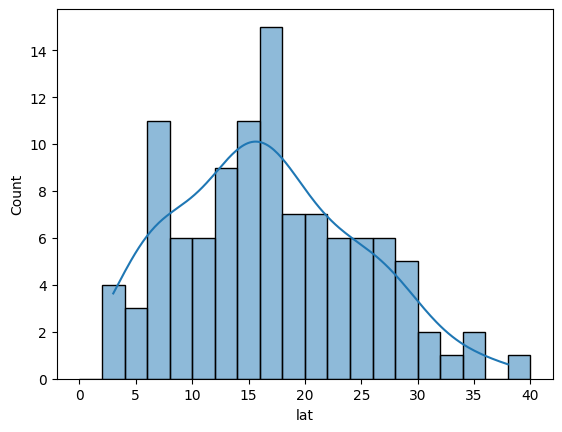

In [36]:
sns.histplot(np.abs(DFx.groupby('AR').mean().reset_index()),x='lat',binrange=(0,40),bins=20,kde=True)

15


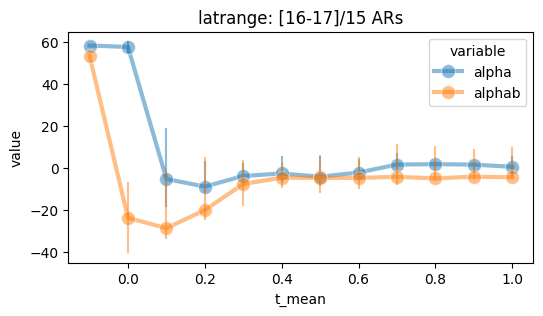

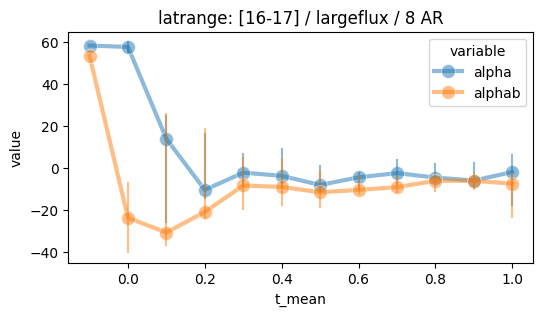

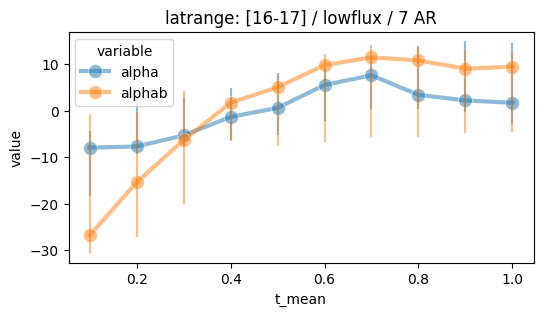

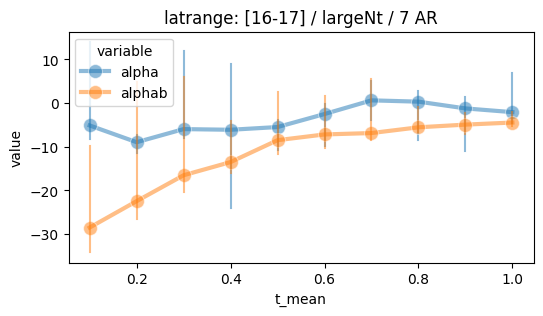

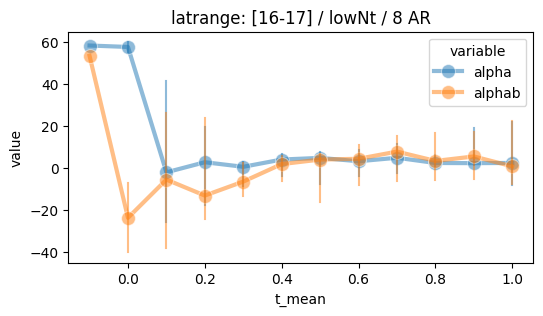

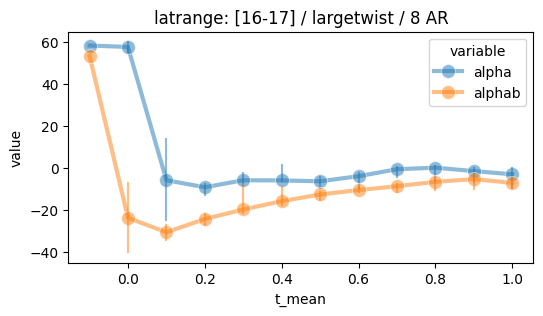

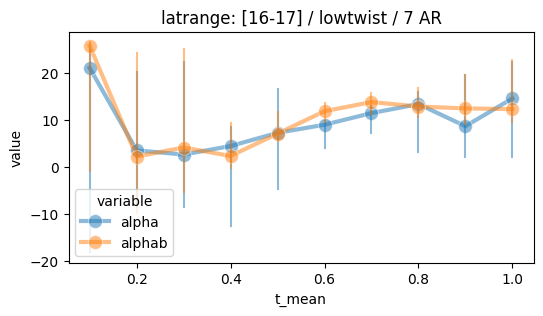

In [37]:
estim='median'


f=plt.figure(figsize=(6,3))

DFx2=DFx.assign(frac=lambda x: np.abs(x.alpha-x.alphab))
DFx2=DFx2.assign(t_mean=lambda x: round(10*x.t_norm)/10)
DFx2=DFx2[DFx2.t_mean <=1]


DFx2=DFx2[(np.abs(DFx2.lat) >= 16) & (np.abs(DFx2.lat) <= 17)]

arsinbin=DFx2.AR.unique()
print(len(arsinbin))
g=sns.lineplot(
data=pd.melt(DFx2,id_vars=['AR','t_mean'],value_vars=['alpha','alphab'],var_name='variable'),
x='t_mean',
y='value',
                hue='variable',
estimator=estim,
errorbar='ci',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
err_style='bars',   # o 'bars' para barras verticales
marker='o',          # opcional para marcar puntos medios
linewidth=3,markersize=10,alpha=0.5)

plt.title(f'latrange: [16-17]/{len(arsinbin):.0f} ARs')

plt.show()

f=plt.figure(figsize=(6,3))


f_tresh=np.median(DFx2[DFx2.t_mean == 1]['flux'])
DFmax=DFx2[DFx2.t_mean==1].groupby('AR').mean().reset_index()
ARup=DFmax[DFmax.flux > f_tresh].AR.unique()
ARlow=DFmax[DFmax.flux <= f_tresh].AR.unique()


g=sns.lineplot(
data=pd.melt(DFx2[DFx2.AR.isin(ARup)],id_vars=['AR','t_mean'],value_vars=['alpha','alphab'],var_name='variable'),
x='t_mean',
y='value',
                hue='variable',
estimator=estim,
errorbar='ci',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
err_style='bars',   # o 'bars' para barras verticales
marker='o',          # opcional para marcar puntos medios
linewidth=3,markersize=10,alpha=0.5)

plt.title(f'latrange: [16-17] / largeflux / {len(ARup)} AR')

plt.show()

f=plt.figure(figsize=(6,3))

g=sns.lineplot(
data=pd.melt(DFx2[DFx2.AR.isin(ARlow)],id_vars=['AR','t_mean'],value_vars=['alpha','alphab'],var_name='variable'),
x='t_mean',
y='value',
                hue='variable',
estimator=estim,
errorbar='ci',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
err_style='bars',   # o 'bars' para barras verticales
marker='o',          # opcional para marcar puntos medios
linewidth=3,markersize=10,alpha=0.5)

plt.title(f'latrange: [16-17] / lowflux / {len(ARlow)} AR')

plt.show()

f=plt.figure(figsize=(6,3))

g=sns.lineplot(
data=pd.melt(DFx2[np.abs(DFx2.Nt) > np.median(np.abs(DFx2.Nt))],id_vars=['AR','t_mean'],value_vars=['alpha','alphab'],var_name='variable'),
x='t_mean',
y='value',
                hue='variable',
estimator=estim,
errorbar='ci',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
err_style='bars',   # o 'bars' para barras verticales
marker='o',          # opcional para marcar puntos medios
linewidth=3,markersize=10,alpha=0.5)

plt.title(f'latrange: [16-17] / largeNt / {len(DFx2[np.abs(DFx2.Nt) > np.median(np.abs(DFx2.Nt))].AR.unique())} AR')


plt.show()

f=plt.figure(figsize=(6,3))

g=sns.lineplot(
data=pd.melt(DFx2[np.abs(DFx2.Nt) <= np.median(np.abs(DFx2.Nt))],id_vars=['AR','t_mean'],value_vars=['alpha','alphab'],var_name='variable'),
x='t_mean',
y='value',
                hue='variable',
estimator=estim,
errorbar='ci',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
err_style='bars',   # o 'bars' para barras verticales
marker='o',          # opcional para marcar puntos medios
linewidth=3,markersize=10,alpha=0.5)

plt.title(f'latrange: [16-17] / lowNt / {len(DFx2[np.abs(DFx2.Nt) <= np.median(np.abs(DFx2.Nt))].AR.unique())} AR')

plt.show()


DFx2=DFx2.assign(tw=lambda x: np.abs(x.Nt)*x.flux**2)
DFmax=DFx2[DFx2.t_mean==1].groupby('AR').mean().reset_index()
ARup=DFmax[DFmax.tw >= np.median(DFmax.tw)].AR.unique()
ARlow=DFmax[DFmax.tw < np.median(DFmax.tw)].AR.unique()

f=plt.figure(figsize=(6,3))

g=sns.lineplot(
data=pd.melt(DFx2[DFx2.AR.isin(ARup)],id_vars=['AR','t_mean'],value_vars=['alpha','alphab'],var_name='variable'),
x='t_mean',
y='value',
                hue='variable',
estimator=estim,
errorbar='ci',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
err_style='bars',   # o 'bars' para barras verticales
marker='o',          # opcional para marcar puntos medios
linewidth=3,markersize=10,alpha=0.5)

plt.title(f'latrange: [16-17] / largetwist / {len(ARup)} AR')

plt.show()

f=plt.figure(figsize=(6,3))

g=sns.lineplot(
data=pd.melt(DFx2[DFx2.AR.isin(ARlow)],id_vars=['AR','t_mean'],value_vars=['alpha','alphab'],var_name='variable'),
x='t_mean',
y='value',
                hue='variable',
estimator=estim,
errorbar='ci',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
err_style='bars',   # o 'bars' para barras verticales
marker='o',          # opcional para marcar puntos medios
linewidth=3,markersize=10,alpha=0.5)

plt.title(f'latrange: [16-17] / lowtwist / {len(ARlow)} AR')

plt.show()



In [98]:
estim='median'


f=plt.subplot(figsize=(6,9))

DFx2=DFx.assign(frac=lambda x: np.abs(x.alpha-x.alphab))
DFx2=DFx2.assign(t_mean=lambda x: round(10*x.t_norm)/10)
DFx2=DFx2[DFx2.t_mean <=1]

DFx2=DFx2.assign(tw=lambda x: np.abs(x.Nt)*x.flux**2)
DFmax=DFx2[DFx2.t_mean==1].groupby('AR').mean().reset_index()
ARup=DFmax[DFmax.tw >= np.median(DFmax.tw)].AR.unique()
ARlow=DFmax[DFmax.tw < np.median(DFmax.tw)].AR.unique()


DFx2=DFx2[(np.abs(DFx2.lat) >= 16) & (np.abs(DFx2.lat) <= 17)]

arsinbin=DFx2.AR.unique()
print(len(arsinbin))
g=sns.lineplot(
data=pd.melt(DFx2,id_vars=['AR','t_mean'],value_vars=['alpha','alphab'],var_name='variable'),
x='t_mean',
y='value',
                hue='variable',
estimator=estim,
errorbar='ci',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
err_style='bars',   # o 'bars' para barras verticales
marker='o',          # opcional para marcar puntos medios
linewidth=3,markersize=10,alpha=0.5)

plt.title(f'latrange: [16-17]/{len(arsinbin):.0f} ARs')

plt.show()


f=plt.figure(figsize=(6,3))

g=sns.lineplot(
data=pd.melt(DFx2[DFx2.AR.isin(ARup)],id_vars=['AR','t_mean'],value_vars=['alpha','alphab'],var_name='variable'),
x='t_mean',
y='value',
                hue='variable',
estimator=estim,
errorbar='ci',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
err_style='bars',   # o 'bars' para barras verticales
marker='o',          # opcional para marcar puntos medios
linewidth=3,markersize=10,alpha=0.5)

plt.title(f'latrange: [16-17] / largetwist / {len(DFx2[DFx2.AR.isin(ARup)].AR.unique())} AR')

plt.show()

f=plt.figure(figsize=(6,3))

g=sns.lineplot(
data=pd.melt(DFx2[DFx2.AR.isin(ARlow)],id_vars=['AR','t_mean'],value_vars=['alpha','alphab'],var_name='variable'),
x='t_mean',
y='value',
                hue='variable',
estimator=estim,
errorbar='ci',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
err_style='bars',   # o 'bars' para barras verticales
marker='o',          # opcional para marcar puntos medios
linewidth=3,markersize=10,alpha=0.5)

plt.title(f'latrange: [16-17] / lowtwist / {len(DFx2[DFx2.AR.isin(ARlow)].AR.unique())} AR')

plt.show()



AttributeError: Axes.set() got an unexpected keyword argument 'figsize'

<Figure size 640x480 with 0 Axes>

In [ ]:
DFx2=DFx.assign(frac=lambda x: np.abs(x.alpha-x.alphab))
DFx2=DFx2.assign(t_mean=lambda x: round(10*x.t_norm)/10)

len(DFx2.AR.unique())

108

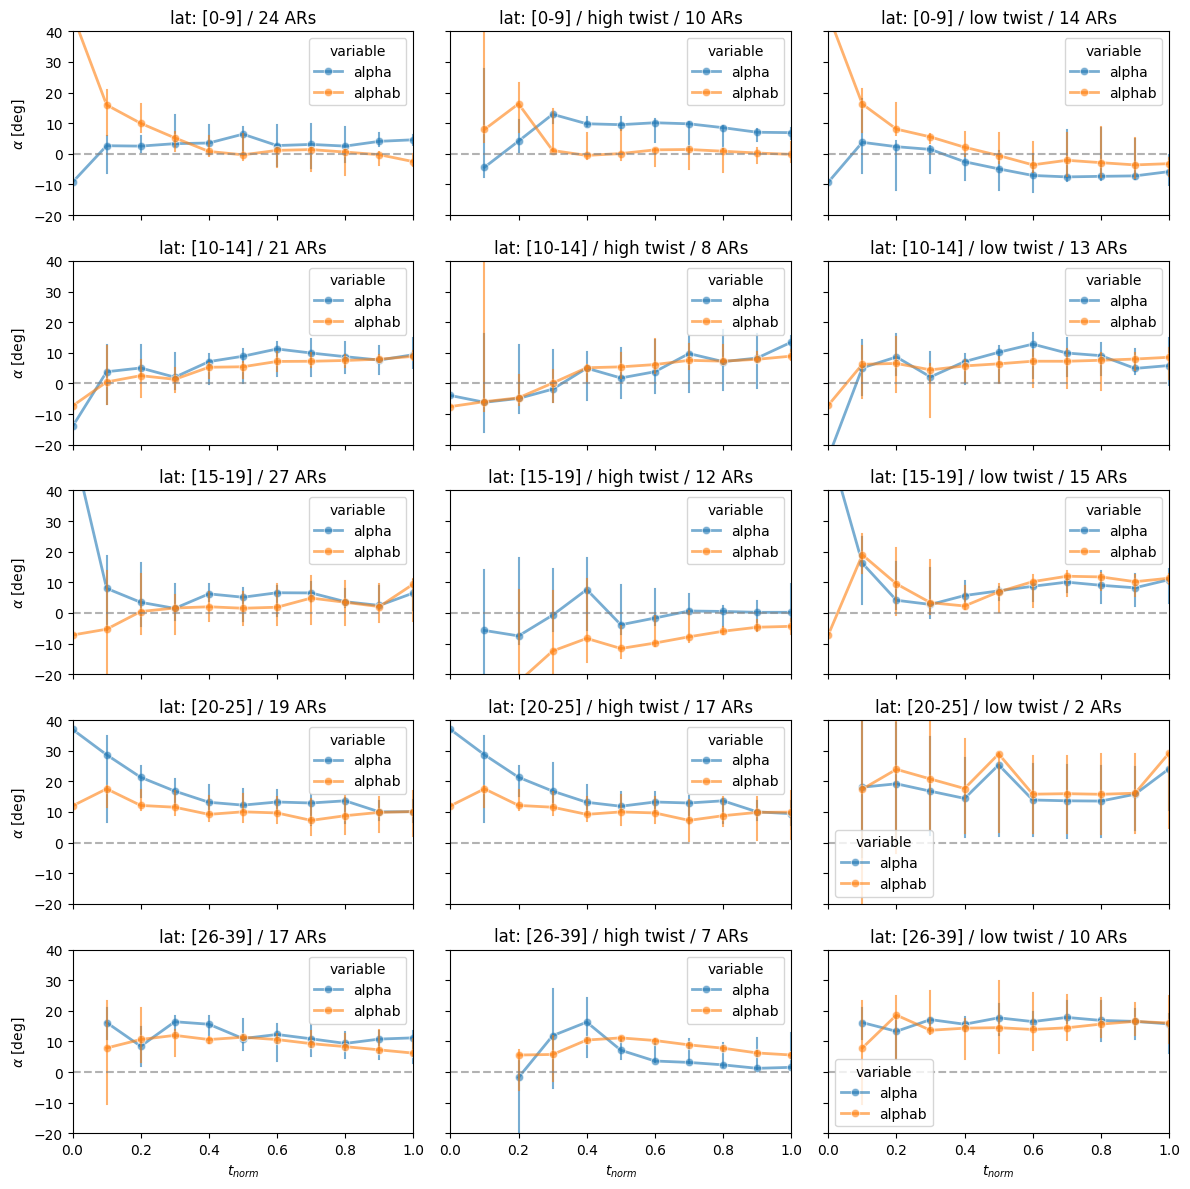

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

estim = 'median'

lat_ranges = [(0,9),(10, 14), (15, 19), (20, 25),(26,39)]   # 👈 tus tres rangos de latitud

fig, axes = plt.subplots(5, 3, figsize=(12, 12), sharex=True, sharey=True)

for i, (latmin, latmax) in enumerate(lat_ranges):

    # Filtrar rango de latitudes
    DFx2 = DFx.assign(frac=lambda x: np.abs(x.alpha - x.alphab))
    DFx2 = DFx2.assign(t_mean=lambda x: round(10 * x.t_norm) / 10)
    DFx2 = DFx2[DFx2.t_mean <= 1]
    DFx2 = DFx2.assign(tw=lambda x: np.abs(x.Nt) * x.flux**2)
        # ARs de alto y bajo twist
    DFmax = DFx2[DFx2.t_mean == 1].groupby('AR').mean().reset_index()
    ARup = DFmax[DFmax.tw >= np.median(DFmax.tw)].AR.unique()
    ARlow = DFmax[DFmax.tw < np.median(DFmax.tw)].AR.unique()


    DFx2 = DFx2[(np.abs(DFx2.lat) >= latmin) & (np.abs(DFx2.lat) <= latmax)]



    # Panel 1: todas las ARs
    g = sns.lineplot(
        data=pd.melt(DFx2, id_vars=['AR','t_mean'],
                     value_vars=['alpha','alphab'], var_name='variable'),
        x='t_mean', y='value', hue='variable',
        estimator=estim, errorbar='ci', err_style='bars',
        marker='o', linewidth=2, markersize=6, alpha=0.6,
        ax=axes[i,0]
    )
    axes[i,0].set_title(f'lat: [{latmin}-{latmax}] / {DFx2.AR.nunique()} ARs')

    # Panel 2: alto twist
    g = sns.lineplot(
        data=pd.melt(DFx2[DFx2.AR.isin(ARup)], id_vars=['AR','t_mean'],
                     value_vars=['alpha','alphab'], var_name='variable'),
        x='t_mean', y='value', hue='variable',
        estimator=estim, errorbar='ci', err_style='bars',
        marker='o', linewidth=2, markersize=6, alpha=0.6,
        ax=axes[i,1]
    )
    axes[i,1].set_title(f'lat: [{latmin}-{latmax}] / high twist / {len(DFx2[DFx2.AR.isin(ARup)].AR.unique())} ARs')

    # Panel 3: bajo twist
    g = sns.lineplot(
        data=pd.melt(DFx2[DFx2.AR.isin(ARlow)], id_vars=['AR','t_mean'],
                     value_vars=['alpha','alphab'], var_name='variable'),
        x='t_mean', y='value', hue='variable',
        estimator=estim, errorbar='ci', err_style='bars',
        marker='o', linewidth=2, markersize=6, alpha=0.6,
        ax=axes[i,2]
    )
    axes[i,2].set_title(f'lat: [{latmin}-{latmax}] / low twist / {len(DFx2[DFx2.AR.isin(ARlow)].AR.unique())} ARs')

# Etiquetas globales
for ax in axes.flat:
    ax.axhline(0, linestyle='--', color='gray', alpha=0.6)
    ax.set_xlim(0,1)
    ax.set_ylim(-20,40)
    ax.set_xlabel(r'$t_{norm}$')
    ax.set_ylabel(r'$\alpha$ [deg]')

plt.tight_layout()
plt.show()


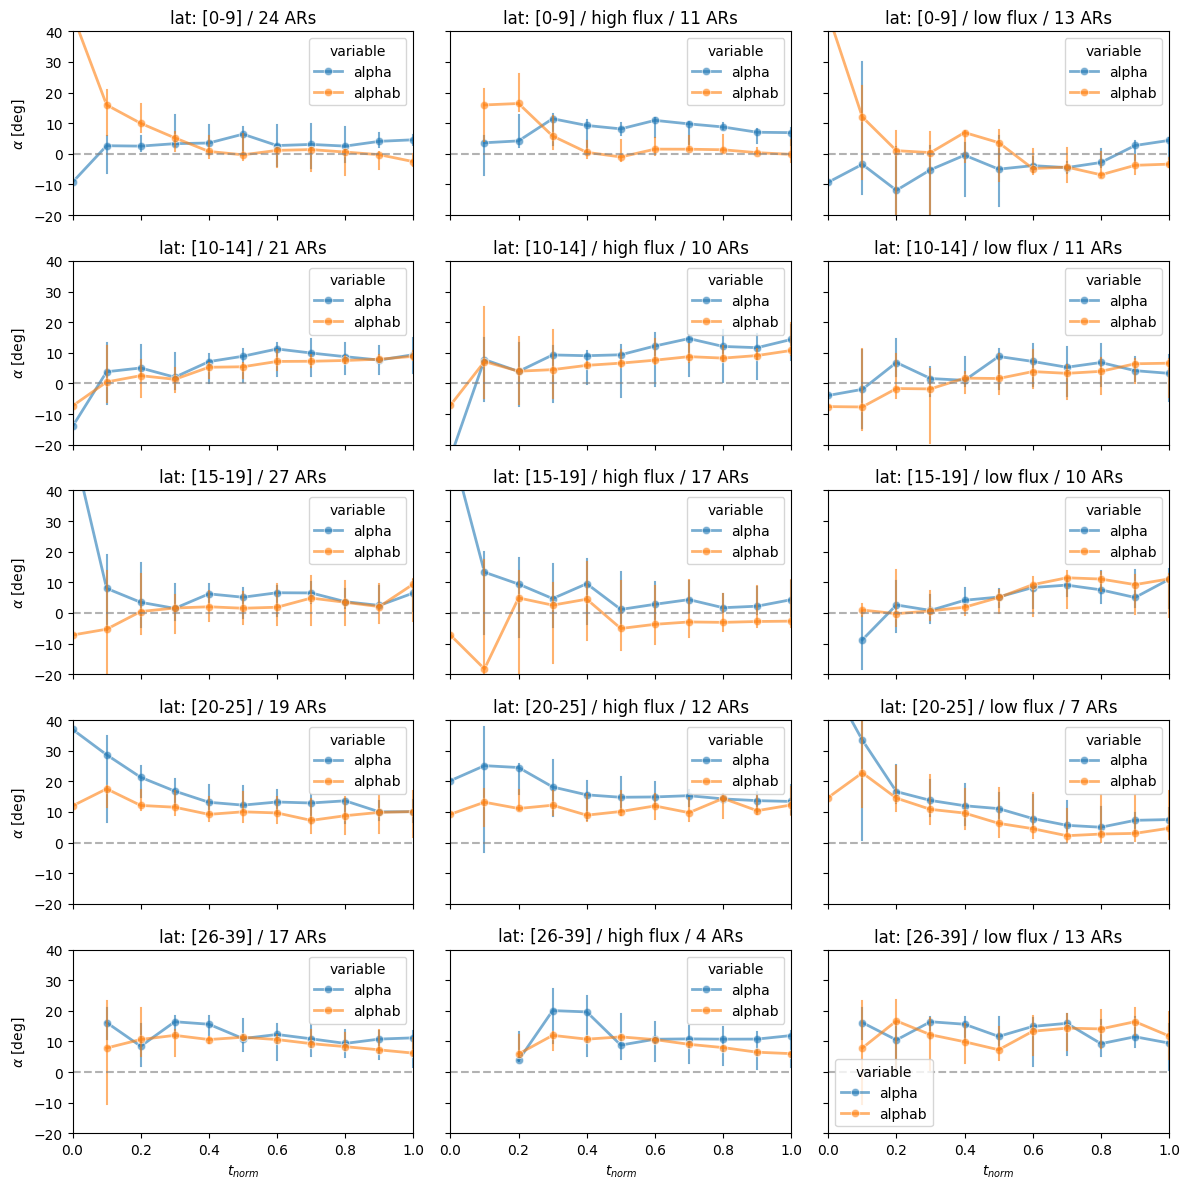

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

estim = 'median'

lat_ranges = [(0,9),(10, 14), (15, 19), (20, 25),(26,39)]   # 👈 tus tres rangos de latitud

fig, axes = plt.subplots(5, 3, figsize=(12, 12), sharex=True, sharey=True)

for i, (latmin, latmax) in enumerate(lat_ranges):

    # Filtrar rango de latitudes
    DFx2 = DFx.assign(frac=lambda x: np.abs(x.alpha - x.alphab))
    DFx2 = DFx2.assign(t_mean=lambda x: round(10 * x.t_norm) / 10)
    DFx2 = DFx2[DFx2.t_mean <= 1]
    DFx2 = DFx2.assign(tw=lambda x: np.abs(x.Nt) * x.flux**2)
        # ARs de alto y bajo twist
    DFmax = DFx2[DFx2.t_mean == 1].groupby('AR').mean().reset_index()
    ARup = DFmax[DFmax.flux >= np.median(DFmax.flux)].AR.unique()
    ARlow = DFmax[DFmax.flux < np.median(DFmax.flux)].AR.unique()


    DFx2 = DFx2[(np.abs(DFx2.lat) >= latmin) & (np.abs(DFx2.lat) <= latmax)]



    # Panel 1: todas las ARs
    g = sns.lineplot(
        data=pd.melt(DFx2, id_vars=['AR','t_mean'],
                     value_vars=['alpha','alphab'], var_name='variable'),
        x='t_mean', y='value', hue='variable',
        estimator=estim, errorbar='ci', err_style='bars',
        marker='o', linewidth=2, markersize=6, alpha=0.6,
        ax=axes[i,0]
    )
    axes[i,0].set_title(f'lat: [{latmin}-{latmax}] / {DFx2.AR.nunique()} ARs')

    # Panel 2: alto twist
    g = sns.lineplot(
        data=pd.melt(DFx2[DFx2.AR.isin(ARup)], id_vars=['AR','t_mean'],
                     value_vars=['alpha','alphab'], var_name='variable'),
        x='t_mean', y='value', hue='variable',
        estimator=estim, errorbar='ci', err_style='bars',
        marker='o', linewidth=2, markersize=6, alpha=0.6,
        ax=axes[i,1]
    )
    axes[i,1].set_title(f'lat: [{latmin}-{latmax}] / high flux / {len(DFx2[DFx2.AR.isin(ARup)].AR.unique())} ARs')

    # Panel 3: bajo twist
    g = sns.lineplot(
        data=pd.melt(DFx2[DFx2.AR.isin(ARlow)], id_vars=['AR','t_mean'],
                     value_vars=['alpha','alphab'], var_name='variable'),
        x='t_mean', y='value', hue='variable',
        estimator=estim, errorbar='ci', err_style='bars',
        marker='o', linewidth=2, markersize=6, alpha=0.6,
        ax=axes[i,2]
    )
    axes[i,2].set_title(f'lat: [{latmin}-{latmax}] / low flux / {len(DFx2[DFx2.AR.isin(ARlow)].AR.unique())} ARs')

# Etiquetas globales
for ax in axes.flat:
    ax.axhline(0, linestyle='--', color='gray', alpha=0.6)
    ax.set_xlim(0,1)
    ax.set_ylim(-20,40)
    ax.set_xlabel(r'$t_{norm}$')
    ax.set_ylabel(r'$\alpha$ [deg]')

plt.tight_layout()
plt.show()


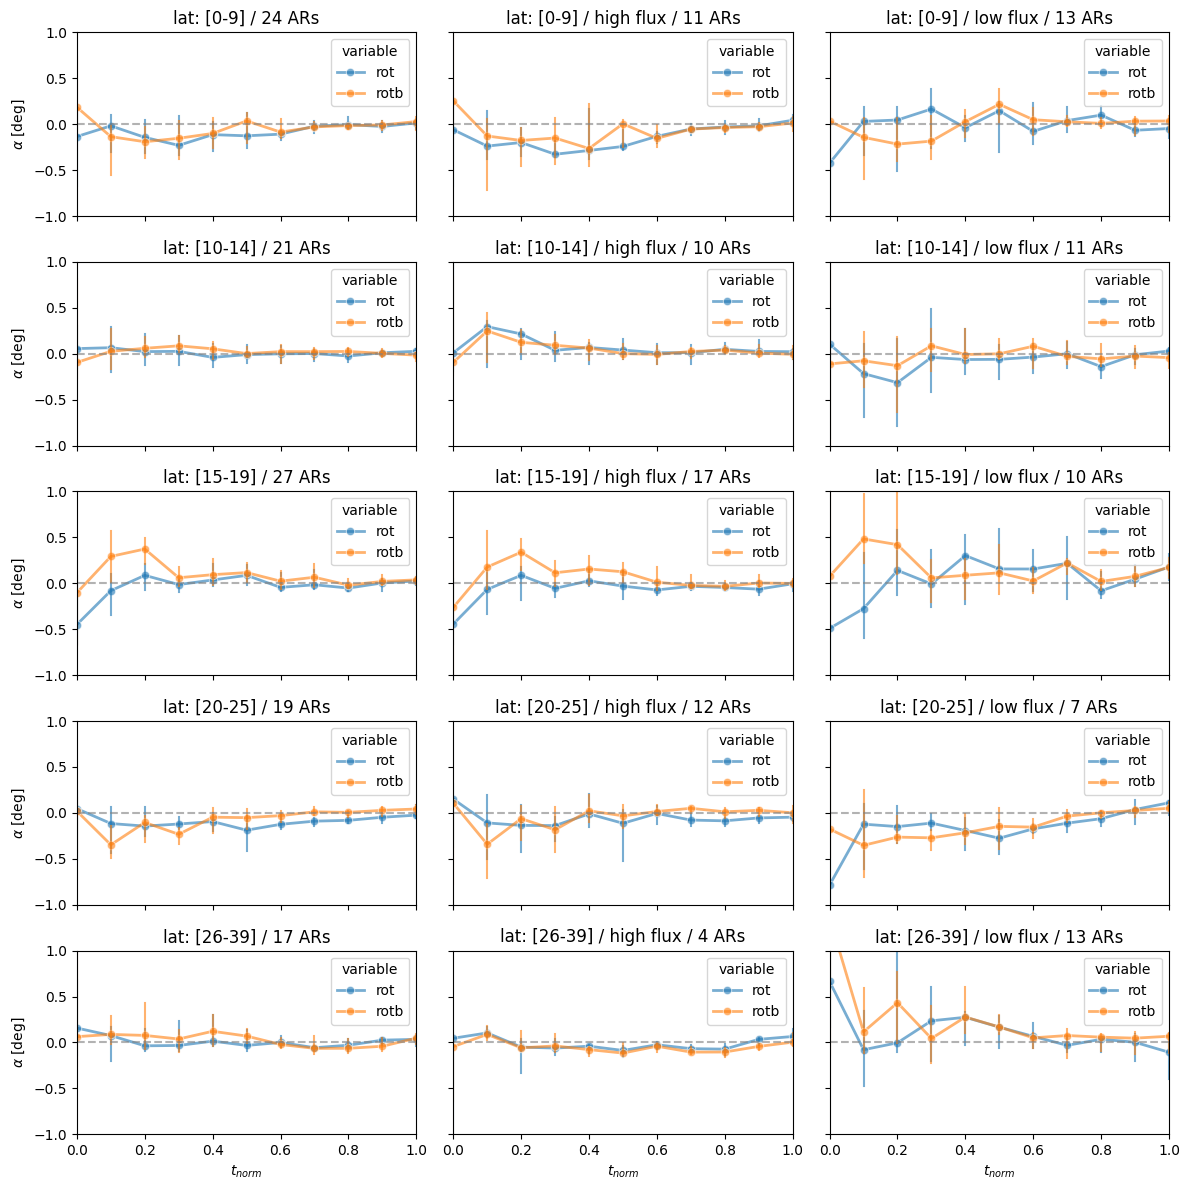

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

estim = 'median'

lat_ranges = [(0,9),(10, 14), (15, 19), (20, 25),(26,39)]   # 👈 tus tres rangos de latitud

fig, axes = plt.subplots(5, 3, figsize=(12, 12), sharex=True, sharey=True)

DFx=DFx.assign(rot= lambda x: np.gradient(x.alpha,x.mag)/1.5)
DFx=DFx.assign(rotb= lambda x: np.gradient(x.alphab,x.mag)/1.5)

for i, (latmin, latmax) in enumerate(lat_ranges):

    # Filtrar rango de latitudes
    DFx2 = DFx.assign(frac=lambda x: np.abs(x.alpha - x.alphab))
    DFx2 = DFx2.assign(t_mean=lambda x: round(10 * x.t_norm) / 10)
    DFx2 = DFx2[DFx2.t_mean <= 1]
    DFx2 = DFx2.assign(tw=lambda x: np.abs(x.Nt) * x.flux**2)
        # ARs de alto y bajo twist
    DFmax = DFx2[DFx2.t_mean == 1].groupby('AR').mean().reset_index()
    ARup = DFmax[DFmax.flux >= np.median(DFmax.flux)].AR.unique()
    ARlow = DFmax[DFmax.flux < np.median(DFmax.flux)].AR.unique()


    DFx2 = DFx2[(np.abs(DFx2.lat) >= latmin) & (np.abs(DFx2.lat) <= latmax)]



    # Panel 1: todas las ARs
    g = sns.lineplot(
        data=pd.melt(DFx2, id_vars=['AR','t_mean'],
                     value_vars=['rot','rotb'], var_name='variable'),
        x='t_mean', y='value', hue='variable',
        estimator=estim, errorbar='ci', err_style='bars',
        marker='o', linewidth=2, markersize=6, alpha=0.6,
        ax=axes[i,0]
    )
    axes[i,0].set_title(f'lat: [{latmin}-{latmax}] / {DFx2.AR.nunique()} ARs')

    # Panel 2: alto twist
    g = sns.lineplot(
        data=pd.melt(DFx2[DFx2.AR.isin(ARup)], id_vars=['AR','t_mean'],
                     value_vars=['rot','rotb'], var_name='variable'),
        x='t_mean', y='value', hue='variable',
        estimator=estim, errorbar='ci', err_style='bars',
        marker='o', linewidth=2, markersize=6, alpha=0.6,
        ax=axes[i,1]
    )
    axes[i,1].set_title(f'lat: [{latmin}-{latmax}] / high flux / {len(DFx2[DFx2.AR.isin(ARup)].AR.unique())} ARs')

    # Panel 3: bajo twist
    g = sns.lineplot(
        data=pd.melt(DFx2[DFx2.AR.isin(ARlow)], id_vars=['AR','t_mean'],
                     value_vars=['rot','rotb'], var_name='variable'),
        x='t_mean', y='value', hue='variable',
        estimator=estim, errorbar='ci', err_style='bars',
        marker='o', linewidth=2, markersize=6, alpha=0.6,
        ax=axes[i,2]
    )
    axes[i,2].set_title(f'lat: [{latmin}-{latmax}] / low flux / {len(DFx2[DFx2.AR.isin(ARlow)].AR.unique())} ARs')

# Etiquetas globales
for ax in axes.flat:
    ax.axhline(0, linestyle='--', color='gray', alpha=0.6)
    ax.set_xlim(0,1)
    ax.set_ylim(-1,1)
    ax.set_xlabel(r'$t_{norm}$')
    ax.set_ylabel(r'$\alpha$ [deg]')

plt.tight_layout()
plt.show()

In [ ]:
sns.histplot(DFx,)

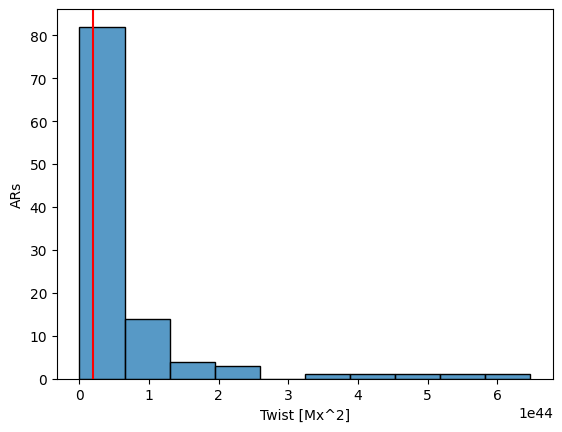

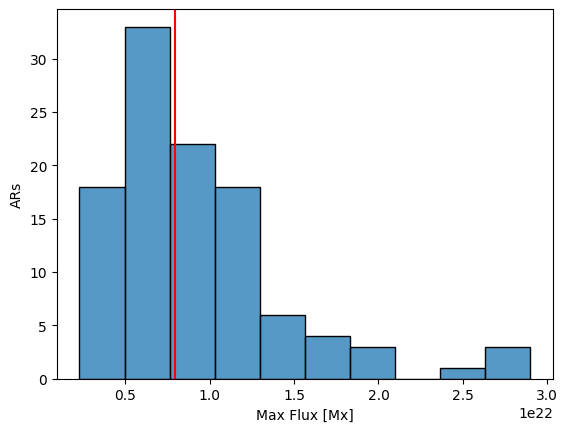

In [ ]:
DFx2 = DFx.assign(frac=lambda x: np.abs(x.alpha - x.alphab))
DFx2 = DFx2.assign(t_mean=lambda x: round(10 * x.t_norm) / 10)
DFx2 = DFx2[DFx2.t_mean <= 1]
DFx2 = DFx2.assign(tw=lambda x: np.abs(x.Nt) * x.flux**2)
    # ARs de alto y bajo twist

DFmax = DFx2[DFx2.t_mean == 1].groupby('AR').mean().reset_index()

sns.histplot(data=DFmax,x='tw',bins=10)
plt.axvline(np.median(DFmax.tw),color='red')

plt.xlabel('Twist [Mx^2]')
plt.ylabel('ARs')

plt.show()

sns.histplot(data=DFmax,x='flux',bins=10)
plt.axvline(np.median(DFmax.flux),color='red')

plt.xlabel('Max Flux [Mx]')
plt.ylabel('ARs')

plt.show()

In [ ]:
DFmax

AR      alpha     alphab    t_norm   lat        fn        Nt   mag  \
14   8226 -11.436389  -8.773405  1.000000  17.0  0.988341 -0.394448  32.0   
21  10311   2.934293   9.394457  0.967828 -16.0  0.983685 -0.067981  60.0   
22  10311   3.800644  10.476424  1.000000 -16.0  1.000000 -0.067981  62.0   
18  10344   0.916826   0.893429  1.000000  16.0  0.991808 -0.173154  72.0   
19   9845  24.916173  23.221515  1.000000  17.0  0.997219 -0.028168  76.0   
31  10879  21.550616  22.703604  0.968960  16.0  0.956189 -0.048968  31.0   
32  10879  21.962025  22.813224  1.000000  16.0  1.000000 -0.048968  32.0   
33  10879  22.551504  24.114117  1.031040  16.0  0.985633 -0.048968  33.0   
21   9873 -23.609515 -37.093299  0.955477 -17.0  0.994727  0.209277  42.0   
22   9873 -23.851487 -37.414552  1.000000 -17.0  1.000000  0.209277  44.0   
23   9873 -23.598231 -37.086640  1.044523 -17.0  0.996209  0.209277  46.0   
21   9906   6.158363  -9.330785  0.954576 -16.0  0.989843  1.767874  84.0   
22   9906   6.888530  -8.067212  1.000000 -16.0  1.000000  1.767874  88.0   
23   9906   8.055126  -6.930945  1.045424 -16.0  0.968605  1.767874  92.0   
16   8407   0.445200   9.508806  1.000000 -17.0  0.987741 -0.896918  32.0   
20   9987  -7.662130  -6.966293  0.952667 -16.0  0.949020  0.371392  60.0   
21   9987  -7.757542  -7.621635  1.000000 -16.0  1.000000  0.371392  63.0   
19   9035  14.548179  12.582124  0.950371 -17.0  0.956237  0.703271  38.0   
20   9035  14.213570  11.770534  1.000000 -17.0  0.996248  0.703271  40.0   
21   9035  14.447877  11.867096  1.049629 -17.0  0.996040  0.703271  42.0   
30   9070   2.513792  -3.278844  0.967772  17.0  0.981329 -0.390526  60.0   
31   9070   2.517083  -3.381802  1.000000  17.0  1.000000 -0.390526  62.0   
23   8052 -15.970298  -5.312357  0.972973  17.0  0.985129  0.808271  72.0   
24   8052 -13.787619  -4.526491  1.000000  17.0  0.994068  0.808271  74.0   
25   8052 -12.651672  -4.254914  1.027027  17.0  0.991229  0.808271  76.0   
13   8056  22.314337  18.474504  1.000000  17.0  1.000000 -0.392526  30.0   
14  10137  -4.542145  -2.105627  1.000000 -16.0  0.989326 -1.397064  76.0   
45   8164  -1.557663  -4.666559  0.957524  17.0  0.984464 -0.918238  45.0   
46   8164  -2.059678  -4.412718  0.978762  17.0  0.980142 -0.918238  46.0   
47   8164  -2.388344  -4.475053  1.000000  17.0  1.000000 -0.918238  47.0   
48   8164  -2.816860  -4.440824  1.021238  17.0  0.993478 -0.918238  48.0   
49   8164  -2.949632  -4.369177  1.042476  17.0  0.996737 -0.918238  49.0   

            flux       frac  t_mean            tw  
14  1.032190e+22   2.662984     1.0  4.202518e+43  
21  5.464637e+21   6.460164     1.0  2.030057e+42  
22  5.555269e+21   6.675780     1.0  2.097953e+42  
18  9.911021e+21   0.023397     1.0  1.700862e+43  
19  1.185914e+22   1.694657     1.0  3.961555e+42  
31  2.936807e+21   1.152987     1.0  4.223400e+41  
32  3.071366e+21   0.851199     1.0  4.619283e+41  
33  3.027240e+21   1.562613     1.0  4.487508e+41  
21  1.011649e+22  13.483784     1.0  2.141813e+43  
22  1.017011e+22  13.563065     1.0  2.164580e+43  
23  1.013155e+22  13.488409     1.0  2.148199e+43  
21  1.778736e+22  15.489148     1.0  5.593382e+44  
22  1.796988e+22  14.955742     1.0  5.708759e+44  
23  1.740572e+22  14.986071     1.0  5.355933e+44  
16  3.001278e+21   9.063606     1.0  8.079145e+42  
20  1.461422e+22   0.695837     1.0  7.932026e+43  
21  1.539928e+22   0.135907     1.0  8.807118e+43  
19  2.788795e+21   1.966056     1.0  5.469606e+42  
20  2.905486e+21   2.443037     1.0  5.936908e+42  
21  2.904877e+21   2.580781     1.0  5.934423e+42  
30  1.473643e+22   5.792636     1.0  8.480758e+43  
31  1.501681e+22   5.898885     1.0  8.806546e+43  
23  3.772725e+21  10.657941     1.0  1.150449e+43  
24  3.806958e+21   9.261128     1.0  1.171422e+43  
25  3.796086e+21   8.396758     1.0  1.164741e+43  
13  4.331845e+21   3.839834     1.0  7.365705e+42  
14  9.044381e+21   2.436518     1.0  1.142810e+44  
45  8.047

In [ ]:
DFx2

AR      alpha     alphab    t_norm   lat        fn        Nt   mag  \
0   8226 -12.746114 -26.241634  0.126056  17.0  0.121904 -0.394448   4.0   
1   8226 -10.049765 -19.865835  0.188481  17.0  0.150999 -0.394448   6.0   
2   8226  -9.080977 -16.823921  0.250905  17.0  0.184284 -0.394448   8.0   
3   8226  -7.951173 -16.205419  0.313330  17.0  0.248075 -0.394448  10.0   
4   8226  -6.231256 -13.499218  0.375754  17.0  0.329174 -0.394448  12.0   
..   ...        ...        ...       ...   ...       ...       ...   ...   
45  8164  -1.557663  -4.666559  0.957524  17.0  0.984464 -0.918238  45.0   
46  8164  -2.059678  -4.412718  0.978762  17.0  0.980142 -0.918238  46.0   
47  8164  -2.388344  -4.475053  1.000000  17.0  1.000000 -0.918238  47.0   
48  8164  -2.816860  -4.440824  1.021238  17.0  0.993478 -0.918238  48.0   
49  8164  -2.949632  -4.369177  1.042476  17.0  0.996737 -0.918238  49.0   

            flux       frac  t_mean  
0   1.273129e+21  13.495520     0.1  
1   1.576989e+21   9.816070     0.2  
2   1.924602e+21   7.742944     0.3  
3   2.590809e+21   8.254246     0.3  
4   3.437790e+21   7.267961     0.4  
..           ...        ...     ...  
45  8.047307e+21   3.108895     1.0  
46  8.011979e+21   2.353040     1.0  
47  8.174306e+21   2.086710     1.0  
48  8.120997e+21   1.623963     1.0  
49  8.147637e+21   1.419545     1.0  

[357 rows x 11 columns]

In [39]:
DFx['stp'] = DFx.groupby('AR')['mag'].transform(lambda x: np.gradient(x))

DFx=DFx.assign(rot= lambda x: np.gradient(x.alpha,1.5*x.mag))
DFx=DFx.assign(rotb= lambda x: np.gradient(x.alphab,1.5*x.mag))


DFx["rot_cum"]  = DFx.groupby("AR")["rot"].cumsum()
DFx["rotb_cum"] = DFx.groupby("AR")["rotb"].cumsum()

DFrot=DFx.groupby('AR').apply(lambda x: x.nlargest(1, 'fn')).reset_index(drop=True)
DFrot=DFrot.assign(rot_cum=lambda x: x.rot_cum*1.5*x.stp)
DFrot=DFrot.assign(rotb_cum=lambda x: x.rotb_cum*1.5*x.stp)


/tmp/ipython-input-1384494599.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  DFrot=DFx.groupby('AR').apply(lambda x: x.nlargest(1, 'fn')).reset_index(drop=True)


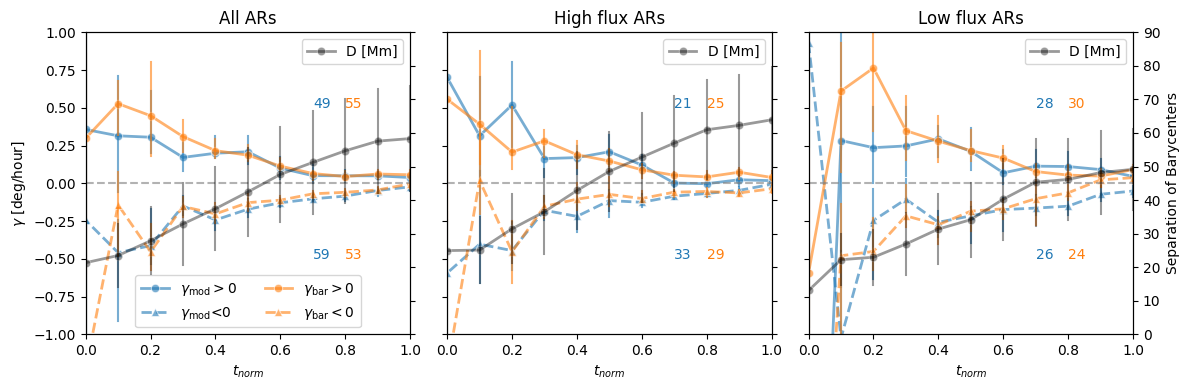

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

estim = 'median'

lat_ranges = [(0,39)]   # 👈 tus tres rangos de latitud

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)

DFx=DFx.assign(rot= lambda x: np.gradient(x.alpha,x.mag)/1.5)
DFx=DFx.assign(rotb= lambda x: np.gradient(x.alphab,x.mag)/1.5)


# Filtrar rango de latitudes
DFx2 = DFx.assign(frac=lambda x: np.abs(x.alpha - x.alphab))
DFx2 = DFx2.assign(t_mean=lambda x: round(10 * x.t_norm) / 10)
DFx2 = DFx2[DFx2.t_mean <= 1]
DFx2 = DFx2.assign(tw=lambda x: np.abs(x.Nt) * x.flux**2)
    # ARs de alto y bajo twist
DFmax = DFx2[DFx2.t_mean == 1].groupby('AR').mean().reset_index()
ARup = DFmax[DFmax.flux >= np.median(DFmax.flux)].AR.unique()
ARlow = DFmax[DFmax.flux < np.median(DFmax.flux)].AR.unique()

ARpos1=DFmax[DFmax.rot_cum >0].AR.unique()
ARneg1=DFmax[DFmax.rot_cum <0].AR.unique()

ARpos2=DFmax[DFmax.rotb_cum >0].AR.unique()
ARneg2=DFmax[DFmax.rotb_cum <0].AR.unique()


for i, ars in enumerate([DFx.AR.unique(),ARup,ARlow]):



  df1=DFx2[DFx2.AR.isin(ars)]

  g = sns.lineplot(
    data=df1[df1.AR.isin(ARpos1)],
    x='t_mean', y='rot',color='tab:blue',
    estimator=estim, errorbar='ci', err_style='bars',
    marker='o', linewidth=2, markersize=6, alpha=0.6,
    ax=axes[i],label=r'$\gamma_\mathrm{mod}>0$'
)
  g = sns.lineplot(
  data=df1[df1.AR.isin(ARneg1)],
  x='t_mean', y='rot',color='tab:blue',
  estimator=estim, errorbar='ci', err_style='bars',
  marker='^', linewidth=2,linestyle='dashed', markersize=6, alpha=0.6,
  ax=axes[i],label=r'$\gamma_\mathrm{mod}$<0'
)

  g = sns.lineplot(
    data=df1[df1.AR.isin(ARpos2)],
    x='t_mean', y='rotb',color='tab:orange',
    estimator=estim, errorbar='ci', err_style='bars',
    marker='o', linewidth=2, markersize=6, alpha=0.6,
    ax=axes[i],label=r'$\gamma_\mathrm{bar}>0$'
)
  g = sns.lineplot(
  data=df1[df1.AR.isin(ARneg2)],
  x='t_mean', y='rotb',color='tab:orange',
  estimator=estim, errorbar='ci', err_style='bars',
  marker='^', linewidth=2,linestyle='dashed', markersize=6, alpha=0.6,
  ax=axes[i],label=r'$\gamma_\mathrm{bar}<0$'
)


  axes[i].set_title(f"{['All','High flux','Low flux'][i]} ARs")

  axes[i].text(0.7,0.5,f'{len(df1[df1.AR.isin(ARpos1)].AR.unique())}',color='tab:blue')
  axes[i].text(0.8,0.5,f'{len(df1[df1.AR.isin(ARpos2)].AR.unique())}',color='tab:orange')

  axes[i].text(0.7,-0.5,f'{len(df1[df1.AR.isin(ARneg1)].AR.unique())}',color='tab:blue')
  axes[i].text(0.8,-0.5,f'{len(df1[df1.AR.isin(ARneg2)].AR.unique())}',color='tab:orange')

  ax2=axes[i].twinx()
  ax2.set_ylim(0,90)
  ax2.set_ylabel('Separation of Barycenters')

  g = sns.lineplot(
    data=df1,
    x='t_mean', y='sar',color='black',
    estimator=estim, errorbar='sd', err_style='bars',
    marker='o', linewidth=2, markersize=6, alpha=0.4,
    ax=ax2,label=r'D [Mm]'
    )
  if i<2:
    ax2.set_ylabel('')
    ax2.set_yticklabels('')



# Etiquetas globales
for ax in axes.flat:
    ax.legend().remove()
    ax.axhline(0, linestyle='--', color='gray', alpha=0.6)
    ax.set_xlim(0,1)
    ax.set_ylim(-1,1)
    ax.set_xlabel(r'$t_{norm}$')
    ax.set_ylabel(r'$\gamma$ [deg/hour]')
axes[0].legend(loc='lower center',ncol=2)

plt.tight_layout()
plt.show()

In [44]:
DFx2.groupby(['AR','t_mean']).mean().reset_index()

AR  t_mean      alpha     alphab    t_norm   lat        fn        Nt  \
0      7982     0.4  51.580268  15.135641  0.438236  11.0  0.277268 -0.441226   
1      7982     0.5  43.089016  15.013527  0.500654  11.0  0.305983 -0.441226   
2      7982     0.6  35.547156  15.609271  0.594282  11.0  0.348179 -0.441226   
3      7982     0.7  29.794009  17.689825  0.687909  11.0  0.480223 -0.441226   
4      7982     0.8  25.301007  17.112408  0.781536  11.0  0.554954 -0.441226   
...     ...     ...        ...        ...       ...   ...       ...       ...   
1106  11024     0.6  20.827315  28.099592  0.598497 -25.0  0.821287 -0.760674   
1107  11024     0.7  19.109853  25.695267  0.695831 -25.0  0.889473 -0.760674   
1108  11024     0.8  17.929008  24.420622  0.793165 -25.0  0.962731 -0.760674   
1109  11024     0.9  17.805477  24.013231  0.890499 -25.0  0.981139 -0.760674   
1110  11024     1.0  18.602116  24.059044  1.000000 -25.0  0.997494 -0.760674   

            sar      sepax  ...          flux  stp       rot      rotb  \
0     23.476059   0.000000  ...  1.893479e+21  3.0 -1.957772 -0.024500   
1     26.079520   0.000000  ...  2.089573e+21  3.0 -1.571791 -0.016184   
2     30.515496   0.000000  ...  2.377737e+21  3.0 -0.948277  0.217493   
3     34.186643   0.000000  ...  3.279471e+21  3.0 -0.778862  0.163172   
4     40.312130   0.000000  ...  3.789813e+21  3.0 -0.475418 -0.217739   
...         ...        ...  ...           ...  ...       ...       ...   
1106  59.380630  74.543313  ...  6.073839e+21  1.0 -0.269827 -0.390000   
1107  62.495133  78.520394  ...  6.578112e+21  1.0 -0.306488 -0.345624   
1108  62.898151  82.347447  ...  7.119886e+21  1.0 -0.076740 -0.110455   
1109  64.598489  85.406349  ...  7.256022e+21  1.0  0.060444 -0.045359   
1110  65.994730  86.249408  ...  7.376978e+21  1.0  0.129863  0.073048   

        rot_cum   rotb_cum       frac    sar_max  sepax_max  sarn  
0     -1.957772  -0.024500  36.444627  39.165484  16.190722  0.60  
1     -3.529563  -0.040684  28.075489  39.165484  16.190722  0.70  
2     -5.001665   0.244310  19.937885  39.165484  16.190722  0.75  
3     -6.204980   0.557473  12.104183  39.165484  16.190722  0.90  
4     -7.004975   0.275173   8.188599  39.165484  16.190722  1.00  
...         ...        ...        ...        ...        ...   ...  
1106 -10.688973 -14.061834   7.272277  65.994730  86.249408  0.90  
1107 -11.863217 -15.612151   6.585415  65.994730  86.249408  0.95  
1108 -12.531022 -16.347643   6.491614  65.994730  86.249408  0.95  
1109 -12.535020 -16.596889   6.207754  65.994730  86.249408  1.00  
1110 -11.986808 -16.508741   5.456927  65.994730  86.249408  1.00  

[1111 rows x 21 columns]

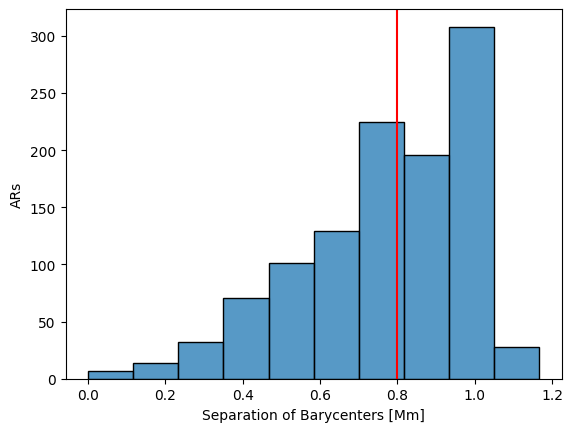

In [43]:
sns.histplot(data=DFx2.groupby(['AR','t_mean']).mean().reset_index(),x='sarn',bins=10)
plt.axvline(np.median(DFx2.sarn),color='red')

plt.xlabel('Separation of Barycenters [Mm]')
plt.ylabel('ARs')

plt.show()

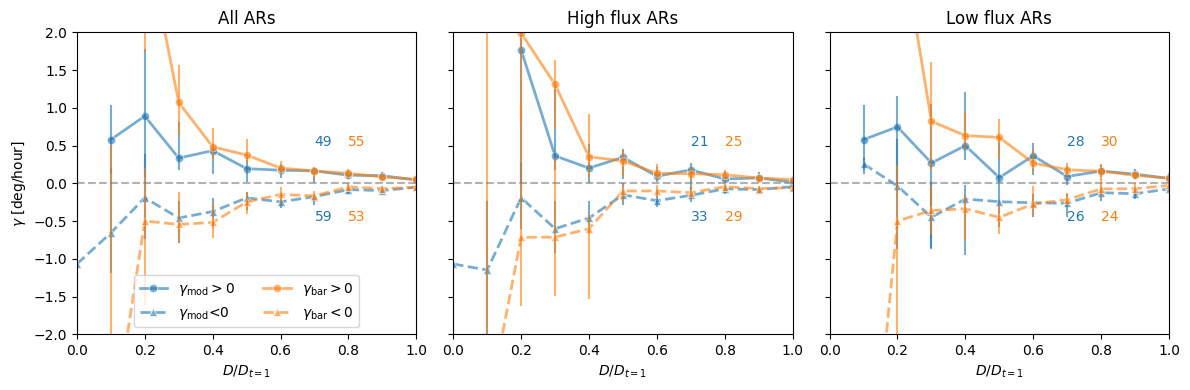

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

estim = 'median'

lat_ranges = [(0,39)]   # 👈 tus tres rangos de latitud

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)



DFx=DFx.assign(rot= lambda x: np.gradient(x.alpha,x.mag)/1.5)
DFx=DFx.assign(rotb= lambda x: np.gradient(x.alphab,x.mag)/1.5)
DFx2 = DFx.assign(frac=lambda x: np.abs(x.alpha - x.alphab))
DFx2 = DFx2.assign(t_mean=lambda x: round(10 * x.t_norm) / 10)

DFmax_alpha = (
    DFx2[DFx2.t_mean == 1]
    .groupby("AR")[["sar", "sepax"]]
    .mean()
    .reset_index()
    .rename(columns={"sar": "sar_max", "sepax": "sepax_max"})
)
DFx2 = DFx2.merge(DFmax_alpha, on="AR", how="left")

# Filtrar rango de latitudes

DFx2 = DFx2[DFx2.t_mean <= 1]
DFx2 = DFx2.assign(sarn=lambda x: x.sar /x.sar_max)
DFx2 = DFx2.assign(sarn=lambda x: round(10 * x.sarn) / 10)



    # ARs de alto y bajo twist
DFmax = DFx2[DFx2.t_mean == 1].groupby('AR').mean().reset_index()
ARup = DFmax[DFmax.flux >= np.median(DFmax.flux)].AR.unique()
ARlow = DFmax[DFmax.flux < np.median(DFmax.flux)].AR.unique()

ARpos1=DFmax[DFmax.rot_cum >0].AR.unique()
ARneg1=DFmax[DFmax.rot_cum <0].AR.unique()

ARpos2=DFmax[DFmax.rotb_cum >0].AR.unique()
ARneg2=DFmax[DFmax.rotb_cum <0].AR.unique()


for i, ars in enumerate([DFx.AR.unique(),ARup,ARlow]):



  df1=DFx2[DFx2.AR.isin(ars)]

  g = sns.lineplot(
    data=df1[df1.AR.isin(ARpos1)],
    x='sarn', y='rot',color='tab:blue',
    estimator=estim, errorbar='ci', err_style='bars',
    marker='o', linewidth=2, markersize=6, alpha=0.6,
    ax=axes[i],label=r'$\gamma_\mathrm{mod}>0$'
)
  g = sns.lineplot(
  data=df1[df1.AR.isin(ARneg1)],
  x='sarn', y='rot',color='tab:blue',
  estimator=estim, errorbar='ci', err_style='bars',
  marker='^', linewidth=2,linestyle='dashed', markersize=6, alpha=0.6,
  ax=axes[i],label=r'$\gamma_\mathrm{mod}$<0'
)

  g = sns.lineplot(
    data=df1[df1.AR.isin(ARpos2)],
    x='sarn', y='rotb',color='tab:orange',
    estimator=estim, errorbar='ci', err_style='bars',
    marker='o', linewidth=2, markersize=6, alpha=0.6,
    ax=axes[i],label=r'$\gamma_\mathrm{bar}>0$'
)
  g = sns.lineplot(
  data=df1[df1.AR.isin(ARneg2)],
  x='sarn', y='rotb',color='tab:orange',
  estimator=estim, errorbar='ci', err_style='bars',
  marker='^', linewidth=2,linestyle='dashed', markersize=6, alpha=0.6,
  ax=axes[i],label=r'$\gamma_\mathrm{bar}<0$'
)


  axes[i].set_title(f"{['All','High flux','Low flux'][i]} ARs")

  axes[i].text(0.7,0.5,f'{len(df1[df1.AR.isin(ARpos1)].AR.unique())}',color='tab:blue')
  axes[i].text(0.8,0.5,f'{len(df1[df1.AR.isin(ARpos2)].AR.unique())}',color='tab:orange')

  axes[i].text(0.7,-0.5,f'{len(df1[df1.AR.isin(ARneg1)].AR.unique())}',color='tab:blue')
  axes[i].text(0.8,-0.5,f'{len(df1[df1.AR.isin(ARneg2)].AR.unique())}',color='tab:orange')




# Etiquetas globales
for ax in axes.flat:
    ax.legend().remove()
    ax.axhline(0, linestyle='--', color='gray', alpha=0.6)
    ax.set_xlim(0,1)
    ax.set_ylim(-2,2)
    ax.set_xlabel(r'$D/D_{t=1}$')
    ax.set_ylabel(r'$\gamma$ [deg/hour]')
axes[0].legend(loc='lower center',ncol=2)

plt.tight_layout()
plt.show()

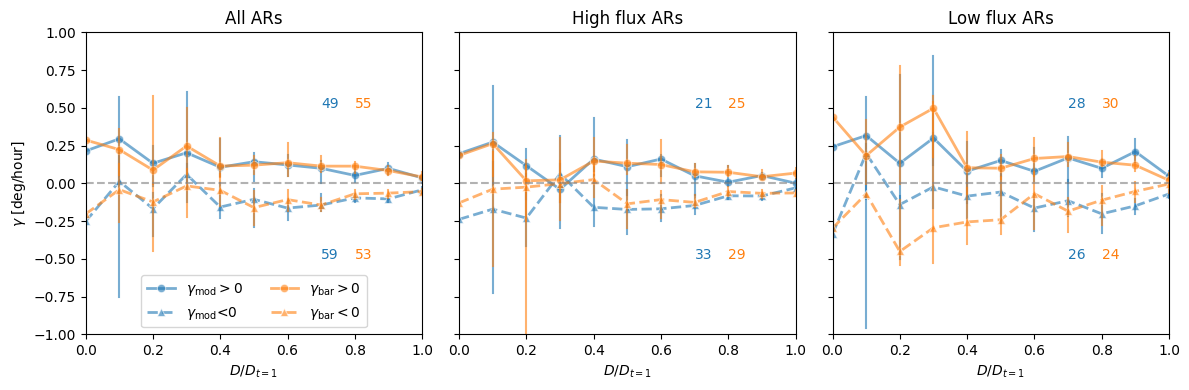

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

estim = 'median'

lat_ranges = [(0,39)]   # 👈 tus tres rangos de latitud

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)



DFx=DFx.assign(rot= lambda x: np.gradient(x.alpha,x.mag)/1.5)
DFx=DFx.assign(rotb= lambda x: np.gradient(x.alphab,x.mag)/1.5)
DFx2 = DFx.assign(frac=lambda x: np.abs(x.alpha - x.alphab))
DFx2 = DFx2.assign(t_mean=lambda x: round(10 * x.t_norm) / 10)

DFmax_alpha = (
    DFx2[DFx2.t_mean == 1]
    .groupby("AR")[["sar", "sepax"]]
    .mean()
    .reset_index()
    .rename(columns={"sar": "sar_max", "sepax": "sepax_max"})
)
DFx2 = DFx2.merge(DFmax_alpha, on="AR", how="left")

# Filtrar rango de latitudes

DFx2 = DFx2[DFx2.t_mean <= 1]
DFx2 = DFx2.assign(sarn=lambda x: x.sepax /x.sepax_max)
DFx2 = DFx2.assign(sarn=lambda x: round(10 * x.sarn) / 10)



    # ARs de alto y bajo twist
DFmax = DFx2[DFx2.t_mean == 1].groupby('AR').mean().reset_index()
ARup = DFmax[DFmax.flux >= np.median(DFmax.flux)].AR.unique()
ARlow = DFmax[DFmax.flux < np.median(DFmax.flux)].AR.unique()

ARpos1=DFmax[DFmax.rot_cum >0].AR.unique()
ARneg1=DFmax[DFmax.rot_cum <0].AR.unique()

ARpos2=DFmax[DFmax.rotb_cum >0].AR.unique()
ARneg2=DFmax[DFmax.rotb_cum <0].AR.unique()


for i, ars in enumerate([DFx.AR.unique(),ARup,ARlow]):



  df1=DFx2[DFx2.AR.isin(ars)]

  g = sns.lineplot(
    data=df1[df1.AR.isin(ARpos1)],
    x='sarn', y='rot',color='tab:blue',
    estimator=estim, errorbar='ci', err_style='bars',
    marker='o', linewidth=2, markersize=6, alpha=0.6,
    ax=axes[i],label=r'$\gamma_\mathrm{mod}>0$'
)
  g = sns.lineplot(
  data=df1[df1.AR.isin(ARneg1)],
  x='sarn', y='rot',color='tab:blue',
  estimator=estim, errorbar='ci', err_style='bars',
  marker='^', linewidth=2,linestyle='dashed', markersize=6, alpha=0.6,
  ax=axes[i],label=r'$\gamma_\mathrm{mod}$<0'
)

  g = sns.lineplot(
    data=df1[df1.AR.isin(ARpos2)],
    x='sarn', y='rotb',color='tab:orange',
    estimator=estim, errorbar='ci', err_style='bars',
    marker='o', linewidth=2, markersize=6, alpha=0.6,
    ax=axes[i],label=r'$\gamma_\mathrm{bar}>0$'
)
  g = sns.lineplot(
  data=df1[df1.AR.isin(ARneg2)],
  x='sarn', y='rotb',color='tab:orange',
  estimator=estim, errorbar='ci', err_style='bars',
  marker='^', linewidth=2,linestyle='dashed', markersize=6, alpha=0.6,
  ax=axes[i],label=r'$\gamma_\mathrm{bar}<0$'
)


  axes[i].set_title(f"{['All','High flux','Low flux'][i]} ARs")

  axes[i].text(0.7,0.5,f'{len(df1[df1.AR.isin(ARpos1)].AR.unique())}',color='tab:blue')
  axes[i].text(0.8,0.5,f'{len(df1[df1.AR.isin(ARpos2)].AR.unique())}',color='tab:orange')

  axes[i].text(0.7,-0.5,f'{len(df1[df1.AR.isin(ARneg1)].AR.unique())}',color='tab:blue')
  axes[i].text(0.8,-0.5,f'{len(df1[df1.AR.isin(ARneg2)].AR.unique())}',color='tab:orange')




# Etiquetas globales
for ax in axes.flat:
    ax.legend().remove()
    ax.axhline(0, linestyle='--', color='gray', alpha=0.6)
    ax.set_xlim(0,1)
    ax.set_ylim(-1,1)
    ax.set_xlabel(r'$D/D_{t=1}$')
    ax.set_ylabel(r'$\gamma$ [deg/hour]')
axes[0].legend(loc='lower center',ncol=2)

plt.tight_layout()
plt.show()

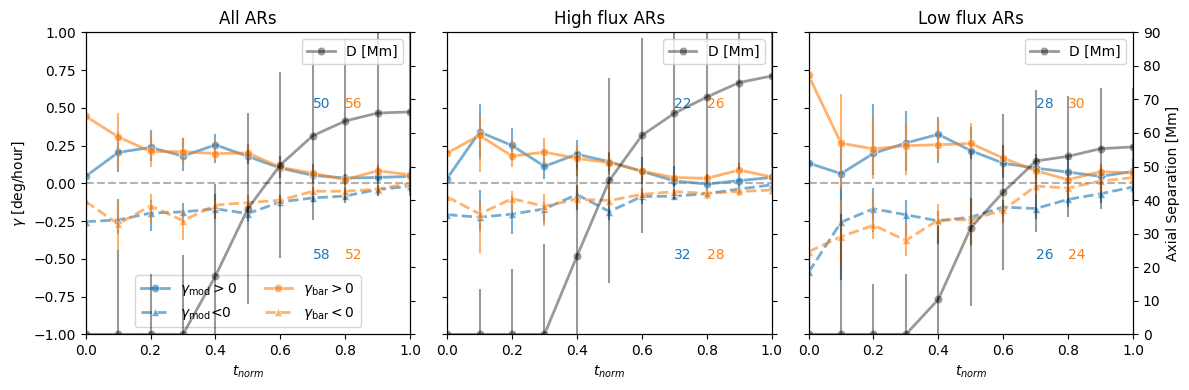

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

estim = 'median'

lat_ranges = [(0,39)]   # 👈 tus tres rangos de latitud

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)

DFx=DFx.assign(rot= lambda x: np.gradient(x.alpha,x.mag)/1.5)
DFx=DFx.assign(rotb= lambda x: np.gradient(x.alphab,x.mag)/1.5)


# Filtrar rango de latitudes
DFx2 = DFx.assign(frac=lambda x: np.abs(x.alpha - x.alphab))
DFx2 = DFx2.assign(t_mean=lambda x: round(10 * x.t_norm) / 10)
DFx2 = DFx2[DFx2.t_mean <= 1]
DFx2 = DFx2.assign(tw=lambda x: np.abs(x.Nt) * x.flux**2)
    # ARs de alto y bajo twist
DFmax = DFx2[DFx2.t_mean == 1].groupby('AR').mean().reset_index()
ARup = DFmax[DFmax.flux >= np.median(DFmax.flux)].AR.unique()
ARlow = DFmax[DFmax.flux < np.median(DFmax.flux)].AR.unique()

ARpos1=DFmax[DFmax.rot_cum >0].AR.unique()
ARneg1=DFmax[DFmax.rot_cum <0].AR.unique()

ARpos2=DFmax[DFmax.rotb_cum >0].AR.unique()
ARneg2=DFmax[DFmax.rotb_cum <0].AR.unique()


for i, ars in enumerate([DFx.AR.unique(),ARup,ARlow]):



  df1=DFx2[DFx2.AR.isin(ars)]

  g = sns.lineplot(
    data=df1[df1.AR.isin(ARpos1)],
    x='t_mean', y='rot',color='tab:blue',
    estimator=estim, errorbar='ci', err_style='bars',
    marker='o', linewidth=2, markersize=6, alpha=0.6,
    ax=axes[i],label=r'$\gamma_\mathrm{mod}>0$'
)
  g = sns.lineplot(
  data=df1[df1.AR.isin(ARneg1)],
  x='t_mean', y='rot',color='tab:blue',
  estimator=estim, errorbar='ci', err_style='bars',
  marker='^', linewidth=2,linestyle='dashed', markersize=6, alpha=0.6,
  ax=axes[i],label=r'$\gamma_\mathrm{mod}$<0'
)

  g = sns.lineplot(
    data=df1[df1.AR.isin(ARpos2)],
    x='t_mean', y='rotb',color='tab:orange',
    estimator=estim, errorbar='ci', err_style='bars',
    marker='o', linewidth=2, markersize=6, alpha=0.6,
    ax=axes[i],label=r'$\gamma_\mathrm{bar}>0$'
)
  g = sns.lineplot(
  data=df1[df1.AR.isin(ARneg2)],
  x='t_mean', y='rotb',color='tab:orange',
  estimator=estim, errorbar='ci', err_style='bars',
  marker='^', linewidth=2,linestyle='dashed', markersize=6, alpha=0.6,
  ax=axes[i],label=r'$\gamma_\mathrm{bar}<0$'
)


  axes[i].set_title(f"{['All','High flux','Low flux'][i]} ARs")

  axes[i].text(0.7,0.5,f'{len(df1[df1.AR.isin(ARpos1)].AR.unique())}',color='tab:blue')
  axes[i].text(0.8,0.5,f'{len(df1[df1.AR.isin(ARpos2)].AR.unique())}',color='tab:orange')

  axes[i].text(0.7,-0.5,f'{len(df1[df1.AR.isin(ARneg1)].AR.unique())}',color='tab:blue')
  axes[i].text(0.8,-0.5,f'{len(df1[df1.AR.isin(ARneg2)].AR.unique())}',color='tab:orange')

  ax2=axes[i].twinx()
  ax2.set_ylim(0,90)
  ax2.set_ylabel('Axial Separation [Mm]')

  g = sns.lineplot(
    data=df1,
    x='t_mean', y='sepax',color='black',
    estimator=estim, errorbar='sd', err_style='bars',
    marker='o', linewidth=2, markersize=6, alpha=0.4,
    ax=ax2,label=r'D [Mm]'
    )
  if i<2:
    ax2.set_ylabel('')
    ax2.set_yticklabels('')


# Etiquetas globales
for ax in axes.flat:
    ax.legend().remove()
    ax.axhline(0, linestyle='--', color='gray', alpha=0.6)
    ax.set_xlim(0,1)
    ax.set_ylim(-1,1)
    ax.set_xlabel(r'$t_{norm}$')
    ax.set_ylabel(r'$\gamma$ [deg/hour]')
axes[0].legend(loc='lower center',ncol=2)

plt.tight_layout()
plt.show()

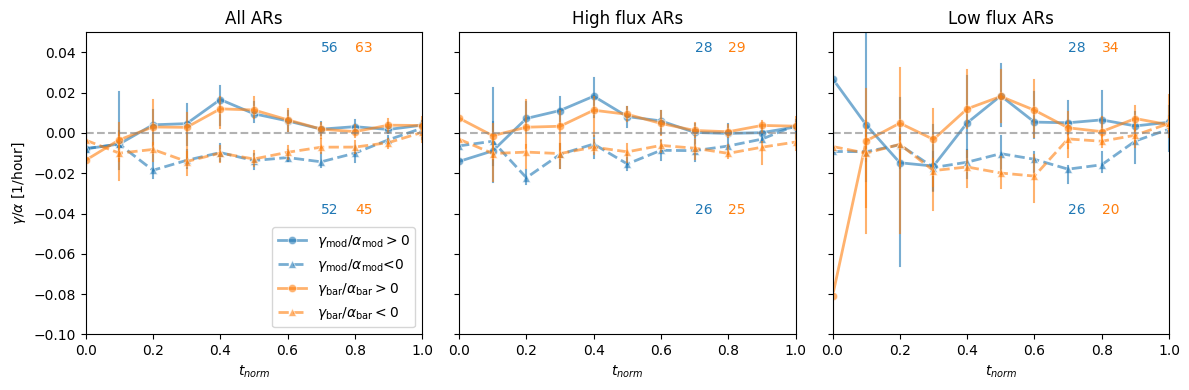

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

estim = 'median'

lat_ranges = [(0,39)]   # 👈 tus tres rangos de latitud

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)

DFx=DFx.assign(rot= lambda x: np.gradient(x.alpha,x.mag)/1.5)
DFx=DFx.assign(rotb= lambda x: np.gradient(x.alphab,x.mag)/1.5)




# Filtrar rango de latitudes
DFx2 = DFx.assign(frac=lambda x: np.abs(x.alpha - x.alphab))
DFx2 = DFx2.assign(t_mean=lambda x: round(10 * x.t_norm) / 10)
DFx2 = DFx2[DFx2.t_mean <= 1]
DFx2 = DFx2.assign(tw=lambda x: np.abs(x.Nt) * x.flux**2)
    # ARs de alto y bajo twist
# --- tomar alpha y alphab al máximo (t_mean=1) ---
DFmax_alpha = (
    DFx2[DFx2.t_mean == 1]
    .groupby("AR")[["alpha", "alphab"]]
    .mean()
    .reset_index()
    .rename(columns={"alpha": "alpha_max", "alphab": "alphab_max"})
)

DFx2 = DFx2.merge(DFmax_alpha, on="AR", how="left")
DFmax = DFx2[DFx2.t_mean == 1].groupby('AR').mean().reset_index()
DFx2=DFx2.assign(fraca=lambda x: x.rot/x.alpha)
DFx2=DFx2.assign(fracb=lambda x: x.rotb/x.alphab)
ARup = DFmax[DFmax.flux >= np.median(DFmax.flux)].AR.unique()
ARlow = DFmax[DFmax.flux < np.median(DFmax.flux)].AR.unique()

ARpos1=DFmax[DFmax.rot_cum/DFmax.alpha >0].AR.unique()
ARneg1=DFmax[DFmax.rot_cum/DFmax.alpha <0].AR.unique()

ARpos2=DFmax[DFmax.rotb_cum/DFmax.alphab >0].AR.unique()
ARneg2=DFmax[DFmax.rotb_cum/DFmax.alphab <0].AR.unique()


for i, ars in enumerate([DFx.AR.unique(),ARup,ARlow]):



  df1=DFx2[DFx2.AR.isin(ars)]

  g = sns.lineplot(
    data=df1[df1.AR.isin(ARpos1)],
    x='t_mean', y='fraca',color='tab:blue',
    estimator=estim, errorbar='ci', err_style='bars',
    marker='o', linewidth=2, markersize=6, alpha=0.6,
    ax=axes[i],label=r'$\gamma_\mathrm{mod}/\alpha_\mathrm{mod}>0$'
)
  g = sns.lineplot(
  data=df1[df1.AR.isin(ARneg1)],
  x='t_mean', y='fraca',color='tab:blue',
  estimator=estim, errorbar='ci', err_style='bars',
  marker='^', linewidth=2,linestyle='dashed', markersize=6, alpha=0.6,
  ax=axes[i],label=r'$\gamma_\mathrm{mod}/\alpha_\mathrm{mod}$<0'
)

  g = sns.lineplot(
    data=df1[df1.AR.isin(ARpos2)],
    x='t_mean', y='fracb',color='tab:orange',
    estimator=estim, errorbar='ci', err_style='bars',
    marker='o', linewidth=2, markersize=6, alpha=0.6,
    ax=axes[i],label=r'$\gamma_\mathrm{bar}/\alpha_\mathrm{bar}>0$'
)
  g = sns.lineplot(
  data=df1[df1.AR.isin(ARneg2)],
  x='t_mean', y='fracb',color='tab:orange',
  estimator=estim, errorbar='ci', err_style='bars',
  marker='^', linewidth=2,linestyle='dashed', markersize=6, alpha=0.6,
  ax=axes[i],label=r'$\gamma_\mathrm{bar}/\alpha_\mathrm{bar}<0$'
)


  axes[i].set_title(f"{['All','High flux','Low flux'][i]} ARs")

  axes[i].text(0.7,0.04,f'{len(df1[df1.AR.isin(ARpos1)].AR.unique())}',color='tab:blue')
  axes[i].text(0.8,0.04,f'{len(df1[df1.AR.isin(ARpos2)].AR.unique())}',color='tab:orange')

  axes[i].text(0.7,-0.04,f'{len(df1[df1.AR.isin(ARneg1)].AR.unique())}',color='tab:blue')
  axes[i].text(0.8,-0.04,f'{len(df1[df1.AR.isin(ARneg2)].AR.unique())}',color='tab:orange')


# Etiquetas globales
for ax in axes.flat:
    ax.legend().remove()
    ax.axhline(0, linestyle='--', color='gray', alpha=0.6)
    ax.set_xlim(0,1)
    ax.set_ylim(-0.1,0.05)
    ax.set_xlabel(r'$t_{norm}$')
    ax.set_ylabel(r'$\gamma/\alpha$ [1/hour]')
axes[0].legend(loc='lower right')

plt.tight_layout()
plt.show()

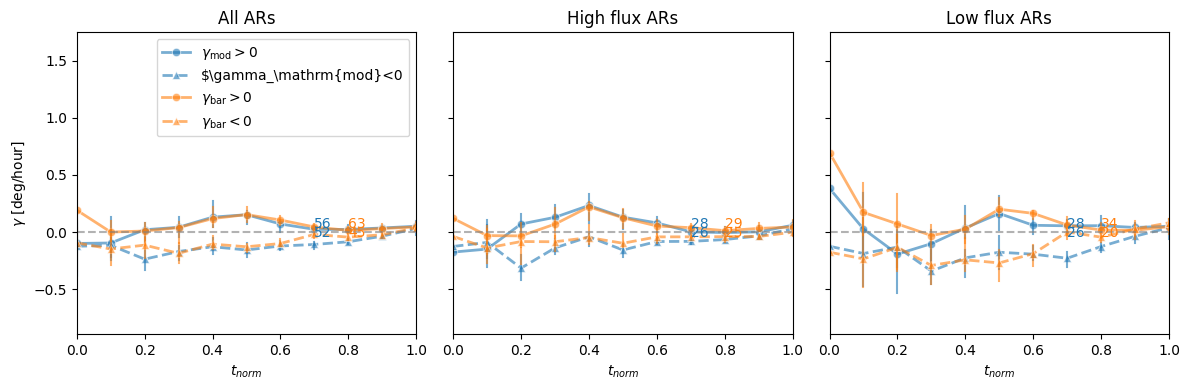

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

estim = 'median'

lat_ranges = [(0,39)]   # 👈 tus tres rangos de latitud

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)

DFx=DFx.assign(rot= lambda x: np.gradient(x.alpha,x.mag)/1.5)
DFx=DFx.assign(rotb= lambda x: np.gradient(x.alphab,x.mag)/1.5)




# Filtrar rango de latitudes
DFx2 = DFx.assign(frac=lambda x: np.abs(x.alpha - x.alphab))
DFx2 = DFx2.assign(t_mean=lambda x: round(10 * x.t_norm) / 10)
DFx2 = DFx2[DFx2.t_mean <= 1]
DFx2 = DFx2.assign(tw=lambda x: np.abs(x.Nt) * x.flux**2)
    # ARs de alto y bajo twist
# --- tomar alpha y alphab al máximo (t_mean=1) ---
DFmax_alpha = (
    DFx2[DFx2.t_mean == 1]
    .groupby("AR")[["alpha", "alphab"]]
    .mean()
    .reset_index()
    .rename(columns={"alpha": "alpha_max", "alphab": "alphab_max"})
)

DFx2 = DFx2.merge(DFmax_alpha, on="AR", how="left")
DFmax = DFx2[DFx2.t_mean == 1].groupby('AR').mean().reset_index()
DFx2=DFx2.assign(fraca=lambda x: np.sign(x.alpha)*x.rot)
DFx2=DFx2.assign(fracb=lambda x: np.sign(x.alpha)*x.rotb)
ARup = DFmax[DFmax.flux >= np.median(DFmax.flux)].AR.unique()
ARlow = DFmax[DFmax.flux < np.median(DFmax.flux)].AR.unique()

ARpos1=DFmax[DFmax.rot_cum/DFmax.alpha >0].AR.unique()
ARneg1=DFmax[DFmax.rot_cum/DFmax.alpha <0].AR.unique()

ARpos2=DFmax[DFmax.rotb_cum/DFmax.alphab >0].AR.unique()
ARneg2=DFmax[DFmax.rotb_cum/DFmax.alphab <0].AR.unique()


for i, ars in enumerate([DFx.AR.unique(),ARup,ARlow]):



  df1=DFx2[DFx2.AR.isin(ars)]

  g = sns.lineplot(
    data=df1[df1.AR.isin(ARpos1)],
    x='t_mean', y='fraca',color='tab:blue',
    estimator=estim, errorbar='ci', err_style='bars',
    marker='o', linewidth=2, markersize=6, alpha=0.6,
    ax=axes[i],label=r'$\gamma_\mathrm{mod}>0$'
)
  g = sns.lineplot(
  data=df1[df1.AR.isin(ARneg1)],
  x='t_mean', y='fraca',color='tab:blue',
  estimator=estim, errorbar='ci', err_style='bars',
  marker='^', linewidth=2,linestyle='dashed', markersize=6, alpha=0.6,
  ax=axes[i],label=r'$\gamma_\mathrm{mod}<0'
)

  g = sns.lineplot(
    data=df1[df1.AR.isin(ARpos2)],
    x='t_mean', y='fracb',color='tab:orange',
    estimator=estim, errorbar='ci', err_style='bars',
    marker='o', linewidth=2, markersize=6, alpha=0.6,
    ax=axes[i],label=r'$\gamma_\mathrm{bar}>0$'
)
  g = sns.lineplot(
  data=df1[df1.AR.isin(ARneg2)],
  x='t_mean', y='fracb',color='tab:orange',
  estimator=estim, errorbar='ci', err_style='bars',
  marker='^', linewidth=2,linestyle='dashed', markersize=6, alpha=0.6,
  ax=axes[i],label=r'$\gamma_\mathrm{bar}<0$'
)


  axes[i].set_title(f"{['All','High flux','Low flux'][i]} ARs")

  axes[i].text(0.7,0.04,f'{len(df1[df1.AR.isin(ARpos1)].AR.unique())}',color='tab:blue')
  axes[i].text(0.8,0.04,f'{len(df1[df1.AR.isin(ARpos2)].AR.unique())}',color='tab:orange')

  axes[i].text(0.7,-0.04,f'{len(df1[df1.AR.isin(ARneg1)].AR.unique())}',color='tab:blue')
  axes[i].text(0.8,-0.04,f'{len(df1[df1.AR.isin(ARneg2)].AR.unique())}',color='tab:orange')


# Etiquetas globales
for ax in axes.flat:
    ax.legend().remove()
    ax.axhline(0, linestyle='--', color='gray', alpha=0.6)
    ax.set_xlim(0,1)
   # ax.set_ylim(-0.1,0.05)
    ax.set_xlabel(r'$t_{norm}$')
    ax.set_ylabel(r'$\gamma$ [deg/hour]')
axes[0].legend()

plt.tight_layout()
plt.show()

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1140053348.py:6: SyntaxWarning: invalid escape sequence '\m'
  plt.text(-48,25,f'$\mu$={DFrot.rot_cum.mean():.2f}\n$\sigma$={DFrot.rot_cum.std():.2f}\nskew ={DFrot.rot_cum.s

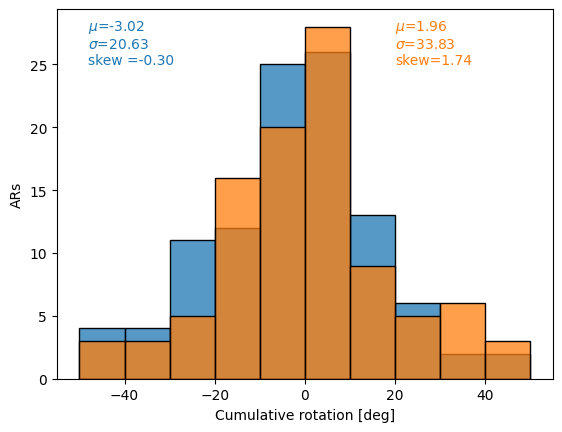

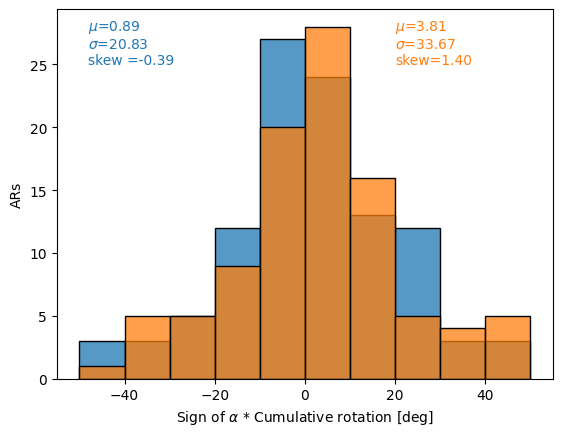

In [43]:
sns.histplot(data=DFrot,x='rot_cum', binrange=(-50,50),bins=10)
sns.histplot(data=DFrot,x='rotb_cum', binrange=(-50,50),bins=10)

plt.xlabel('Cumulative rotation [deg]')
plt.ylabel('ARs')
plt.text(-48,25,f'$\mu$={DFrot.rot_cum.mean():.2f}\n$\sigma$={DFrot.rot_cum.std():.2f}\nskew ={DFrot.rot_cum.skew():.2f}',color='tab:blue')
plt.text(20,25,f'$\mu$={DFrot.rotb_cum.mean():.2f}\n$\sigma$={DFrot.rotb_cum.std():.2f}\nskew={DFrot.rotb_cum.skew():.2f}',color='tab:orange')

plt.show()

sns.histplot(data=DFrot.apply(lambda x: np.sign(DFrot.alpha)*x),x='rot_cum', binrange=(-50,50),bins=10)
sns.histplot(data=DFrot.apply(lambda x: np.sign(DFrot.alphab)*x),x='rotb_cum', binrange=(-50,50),bins=10)

a=DFrot.apply(lambda x: np.sign(DFrot.alpha)*x)['rot_cum']
b=DFrot.apply(lambda x: np.sign(DFrot.alphab)*x)['rotb_cum']

plt.text(-48,25,f'$\mu$={a.mean():.2f}\n$\sigma$={a.std():.2f}\nskew ={a.skew():.2f}',color='tab:blue')
plt.text(20,25,f'$\mu$={b.mean():.2f}\n$\sigma$={b.std():.2f}\nskew={b.skew():.2f}',color='tab:orange')

plt.xlabel(r'Sign of $\alpha$ * Cumulative rotation [deg]')
plt.ylabel('ARs')


plt.show()


In [ ]:

DFrot.apply(lambda x: np.sign(DFrot.alpha)*x)

AR      alpha     alphab  t_norm   lat        fn        Nt   mag  \
0     7982.0  26.607273  14.630356     1.0  11.0  0.969364 -0.441226  48.0   
1    -8040.0   2.335395   3.991676    -1.0  -3.0 -1.000000  0.507740 -72.0   
2    -8052.0  13.787619   4.526491    -1.0 -17.0 -0.994068 -0.808271 -74.0   
3     8056.0  22.314337  18.474504     1.0  17.0  1.000000 -0.392526  30.0   
4    -8060.0  12.416311   3.208002    -1.0  -5.0 -1.000000 -0.642047 -32.0   
..       ...        ...        ...     ...   ...       ...       ...   ...   
103  10900.0   4.681209  -4.318218     1.0  -5.0  1.000000  0.943600  55.0   
104 -10971.0  35.882473   3.361120    -1.0  -3.0 -0.984859 -0.744438 -54.0   
105  10987.0   6.797107   7.990922     1.0  -8.0  0.994811  0.199923  58.0   
106  11007.0   6.362738   5.057673     1.0  35.0  0.998987 -1.109657  51.0   
107  11024.0  18.642100  24.045886     1.0 -25.0  1.000000 -0.760674  41.0   

             flux  stp       rot      rotb    rot_cum   rotb_cum  
0    6.619844e+21  3.0  0.063576 -0.124805 -29.416721  -0.854748  
1   -6.681582e+21 -4.0 -0.141860  0.035578  21.245292  14.517620  
2   -3.806958e+21 -2.0 -0.553104 -0.176240 -44.117004   2.245027  
3    4.331845e+21  2.0 -0.002030  0.171053  33.725300  40.014642  
4   -2.499514e+21 -2.0  0.388424  0.286993  -5.912497  43.743888  
..            ...  ...       ...       ...        ...        ...  
103  5.556008e+21  1.0  0.166737  0.091102   5.179466   1.775460  
104 -2.325964e+21 -2.0  0.101110 -0.025533  24.086336  61.791632  
105  6.568726e+21  2.0 -0.089193  0.037741 -30.288921 -14.524419  
106  3.461158e+21  3.0 -0.396221 -0.257110  -7.161650  10.440545  
107  7.395512e+21  1.0  0.111966  0.035180 -17.991059 -24.846143  

[108 rows x 14 columns]

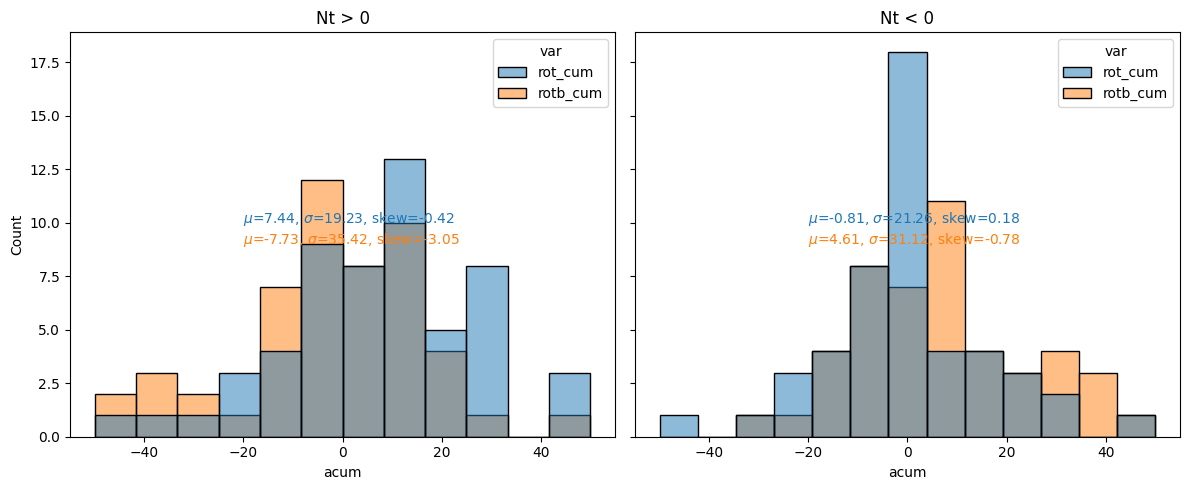

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharex=True, sharey=True)


DFrot=DFrot.assign(rot_cum=lambda x: np.sign(x.lat)*x.rot_cum)
DFrot=DFrot.assign(rotb_cum=lambda x: np.sign(x.lat)*x.rotb_cum)
# --- Case Nt > 0 ---
sns.histplot(
    data=pd.melt(DFrot[DFrot.Nt > 0], value_vars=['rot_cum','rotb_cum'],
                 value_name='acum', var_name='var'),
    x='acum', hue='var', binrange=(-50,50), ax=axes[0]
)

axes[0].set_title("Nt > 0")
axes[0].text(-20, 10,
             fr'$\mu$={DFrot[DFrot.Nt > 0].rot_cum.mean():.2f}, '
             fr'$\sigma$={DFrot[DFrot.Nt > 0].rot_cum.std():.2f}, '
             fr'skew={DFrot[DFrot.Nt > 0].rot_cum.skew():.2f}',
             color='tab:blue')
axes[0].text(-20, 9,
             fr'$\mu$={DFrot[DFrot.Nt > 0].rotb_cum.mean():.2f}, '
             fr'$\sigma$={DFrot[DFrot.Nt > 0].rotb_cum.std():.2f}, '
             fr'skew={DFrot[DFrot.Nt > 0].rotb_cum.skew():.2f}',
             color='tab:orange')

# --- Case Nt < 0 ---
sns.histplot(
    data=pd.melt(DFrot[DFrot.Nt < 0], value_vars=['rot_cum','rotb_cum'],
                 value_name='acum', var_name='var'),
    x='acum', hue='var', binrange=(-50,50), ax=axes[1]
)

axes[1].set_title("Nt < 0")
axes[1].text(-20, 10,
             fr'$\mu$={DFrot[DFrot.Nt < 0].rot_cum.mean():.2f}, '
             fr'$\sigma$={DFrot[DFrot.Nt < 0].rot_cum.std():.2f}, '
             fr'skew={DFrot[DFrot.Nt < 0].rot_cum.skew():.2f}',
             color='tab:blue')
axes[1].text(-20, 9,
             fr'$\mu$={DFrot[DFrot.Nt < 0].rotb_cum.mean():.2f}, '
             fr'$\sigma$={DFrot[DFrot.Nt < 0].rotb_cum.std():.2f}, '
             fr'skew={DFrot[DFrot.Nt < 0].rotb_cum.skew():.2f}',
             color='tab:orange')

plt.tight_layout()
plt.show()

r = 0.2279887877926146
r = -0.20774164273755785


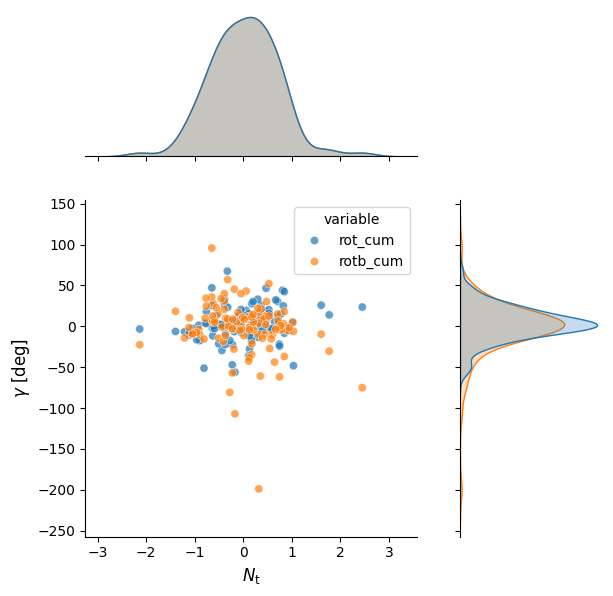

In [ ]:
#  Jointplot de seaborn con histograma extendido en marg_y
g = sns.jointplot(
    data=pd.melt(DFrot,id_vars=['t_norm','lat','AR','fn','mag','flux','Nt'],value_vars=['rot_cum','rotb_cum']),
    x='Nt',
    y='value',
    hue='variable',
    kind='scatter',
    alpha=0.7,
 #   marginal_kws={'bins': 30,'binrange':(-80,80), 'fill': True},
    ratio=2,height=6,space=0.3
)

g.set_axis_labels(r'$N_\mathrm{t}$',r'$\gamma$ [deg]', fontsize=12)

# Linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(DFrot['Nt'], DFrot['rot_cum'])

print(f'r = {r_value}')

slope, intercept, r_value, p_value, std_err = stats.linregress(DFrot['Nt'], DFrot['rotb_cum'])

print(f'r = {r_value}')


r = 0.11741041783764292
r = -0.16385732882428214


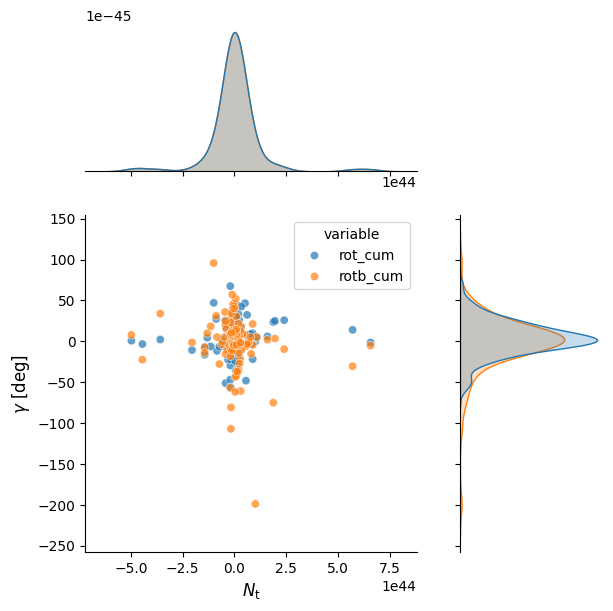

In [ ]:
DFrot=DFrot.assign(tw=lambda x: x.Nt*x.flux**2)

#  Jointplot de seaborn con histograma extendido en marg_y
g = sns.jointplot(
    data=pd.melt(DFrot,id_vars=['t_norm','lat','AR','fn','mag','flux','Nt','tw'],value_vars=['rot_cum','rotb_cum']),
    x='tw',
    y='value',
    hue='variable',
    kind='scatter',
    alpha=0.7,
 #   marginal_kws={'bins': 30,'binrange':(-80,80), 'fill': True},
    ratio=2,height=6,space=0.3
)

g.set_axis_labels(r'$N_\mathrm{t}$',r'$\gamma$ [deg]', fontsize=12)

# Linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(DFrot['tw'], DFrot['rot_cum'])

print(f'r = {r_value}')

slope, intercept, r_value, p_value, std_err = stats.linregress(DFrot['tw'], DFrot['rotb_cum'])

print(f'r = {r_value}')


<>:71: SyntaxWarning: invalid escape sequence '\s'
<>:71: SyntaxWarning: invalid escape sequence '\s'
<>:71: SyntaxWarning: invalid escape sequence '\s'
<>:71: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1497640103.py:71: SyntaxWarning: invalid escape sequence '\s'
  f'$\sigma_\mathrm{{mod}}$ = {DFrot.rot_cum.std():.0f}\n$\sigma_\mathrm{{bar}}$ = {DFrot.rotb_cum.std():.0f}',
/tmp/ipython-input-1497640103.py:71: SyntaxWarning: invalid escape sequence '\s'
  f'$\sigma_\mathrm{{mod}}$ = {DFrot.rot_cum.std():.0f}\n$\sigma_\mathrm{{bar}}$ = {DFrot.rotb_cum.std():.0f}',


43
33
14
9


Text(0.15, 0.2, '~33%')

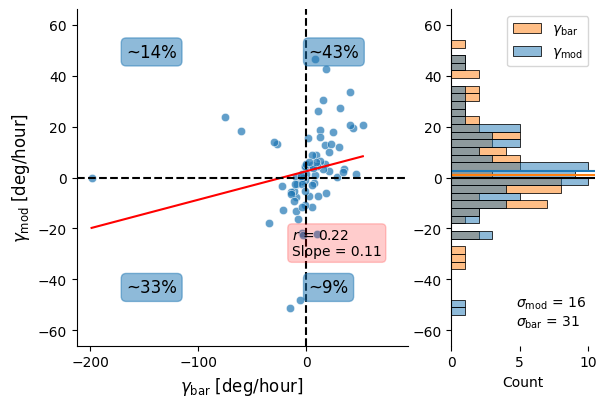

In [ ]:
#  Jointplot de seaborn con histograma extendido en marg_y

DFrot = DFrot[~DFrot['AR'].isin(ARout)].copy()

g = sns.jointplot(
    data=DFrot,
    x='rotb_cum',
    y='rot_cum',
    kind='scatter',
    alpha=0.7,
    marginal_kws={'bins': 30,'binrange':(-80,80), 'fill': True},
    ratio=2,height=6,space=0.3
)

g.set_axis_labels(r'$\gamma_\mathrm{bar}$ [deg/hour]',r'$\gamma_\mathrm{mod}$ [deg/hour]', fontsize=12)

g.ax_marg_x.set_visible(False)
#g.ax_marg_y.set_visible(False)
g.ax_marg_x.clear()
g.ax_marg_y.clear()
g.ax_marg_x.set_xlabel('X axis label')
g.ax_marg_y.set_ylabel('Y axis label')
g.ax_marg_x.tick_params(axis='x', labelsize=12)
g.ax_marg_y.tick_params(axis='y', labelsize=12)

hist=sns.histplot(data=pd.melt(DFrot,id_vars=['t_norm','lat','AR','fn','mag','flux'],value_vars=['rot_cum','rotb_cum']),y='value',
                  hue='variable',
             palette=['tab:blue','tab:orange'],
             alpha=0.5,ax=g.ax_marg_y,binrange=(-60,60),bins=40)

# Linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(DFrot['rotb_cum'], DFrot['rot_cum'])

# Add linear fit line
x_fit = np.linspace(DFrot['rotb_cum'].min(), DFrot['rotb_cum'].max(), 100)
y_fit = slope * x_fit + intercept
g.ax_joint.plot(x_fit, y_fit, color='red', label=f'Fit: y={slope:.2f}x+{intercept:.2f}')

# Annotate with correlation coefficient and slope
g.ax_joint.text(
    0.65, 0.35,
    f'$r$ = {r_value:.2f}\nSlope = {slope:.2f}',
    transform=g.ax_joint.transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle="round", alpha=0.2, color='red')
)

#g.ax_marg_y.legend()
g.ax_marg_y.legend(title='',labels=[r'$\gamma_\mathrm{bar}$',r'$\gamma_\mathrm{mod}$'],loc='upper right')
handles,labels=hist.get_legend_handles_labels()
#hist.legend(handles=handles,labels=labels,title=r'$t_{norm}$')
handles,labels=hist.get_legend_handles_labels()
g.ax_marg_y.set_ylabel('')
#
g.ax_marg_y.tick_params(axis='y', labelsize=10)  # Set y-ticklabel fontsize
g.ax_marg_y.tick_params(axis='x', labelsize=10)  # Set x-ticklabel fontsize (if needed)

g.ax_marg_y.axhline(0,color='black')

g.ax_marg_y.axhline(DFrot.rot_cum.mean(),color='tab:blue')
g.ax_marg_y.axhline(DFrot.rotb_cum.mean(),color='tab:orange')

g.ax_joint.axvline(0,color='black',linestyle='dashed')
g.ax_joint.axhline(0,color='black',linestyle='dashed')
#g.ax_joint.set_ylim(-20, 20)
#g.ax_joint.set_xlim(-20, 20)

g.ax_marg_y.text(
    0.45, 0.15,
    f'$\sigma_\mathrm{{mod}}$ = {DFrot.rot_cum.std():.0f}\n$\sigma_\mathrm{{bar}}$ = {DFrot.rotb_cum.std():.0f}',
    transform=g.ax_marg_y.transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle="round", alpha=0.0, color='red')
)

#g.ax_marg_y.set_xlim(0,20)
'''
g.ax_joint.plot([-20,20],[20,20],color='black')
g.ax_joint.plot([20,20],[-20,20],color='black')
g.ax_marg_y.plot([0,20],[-20,-20],color='black')
g.ax_marg_y.plot([0,20],[20,20],color='black')
g.ax_marg_y.plot([20,20],[-20,20],color='black')
'''

aa=DFrot.rot_cum.values
ab=DFrot.rotb_cum.values



print(round(100*sum((aa>0)*(ab>0))/len(aa)))
print(round(100*sum((aa<0)*(ab<0))/len(aa)))
print(round(100*sum((aa>0)*(ab<0))/len(aa)))
print(round(100*sum((aa<0)*(ab>0))/len(aa)))

g.ax_joint.text(0.7,0.9,f'~{round(100*sum((aa>0)*(ab>0))/len(aa))}%',transform=g.ax_joint.transAxes,
                fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", alpha=0.5, color='tab:blue'))
g.ax_joint.text(0.15,0.9,f'~{round(100*sum((aa>0)*(ab<0))/len(aa))}%',transform=g.ax_joint.transAxes,
                fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", alpha=0.5, color='tab:blue'))
g.ax_joint.text(0.7,0.2,f'~{round(100*sum((aa<0)*(ab>0))/len(aa))}%',transform=g.ax_joint.transAxes,
                fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", alpha=0.5, color='tab:blue'))
g.ax_joint.text(0.15,0.2,f'~{round(100*sum((aa<0)*(ab<0))/len(aa))}%',transform=g.ax_joint.transAxes,
                fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", alpha=0.5, color='tab:blue'))
#plt.savefig('./plots/alpha-alpha.pdf',dpi=300)

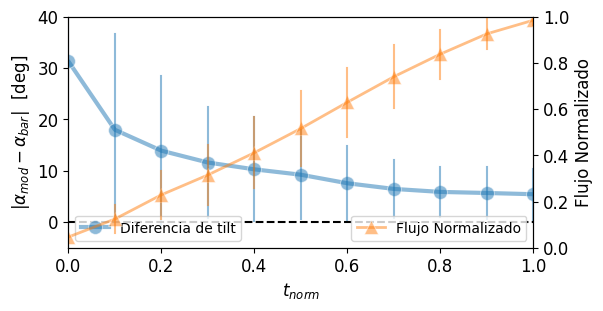

In [45]:
f=plt.figure(figsize=(6,3))

DFx2=DFx.assign(frac=lambda x: np.abs(x.alpha-x.alphab))
DFx2=DFx2.assign(t_mean=lambda x: round(10*x.t_norm)/10)

g=sns.lineplot(
data=DFx2,
x='t_mean',
y='frac',
estimator='mean',
errorbar='sd',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
err_style='bars',   # o 'bars' para barras verticales
marker='o',          # opcional para marcar puntos medios
linewidth=3,markersize=10,alpha=0.5, label='Diferencia de tilt'

                )
#g=sns.scatterplot(data=DFx2,x='t_mean',y='frac',alpha=0.2)
#   sns.lineplot(data=DFx2.groupby(['t_norm','variable']).median().reset_index(),x='t_norm',y='value',hue='variable')
plt.xlim(0,1)
plt.ylim(-5,40)
plt.axhline(0,color='black',linestyle='dashed')

plt.ylabel(r'$|\alpha_{mod}-\alpha_{bar}|$  [deg]',fontsize=12)
plt.xlabel(r'$t_{norm}$',fontsize=12)
#plt.set_ticklabel(size=12)
plt.tick_params(axis='both', labelsize=12)
plt.legend(loc='lower left')

ax2=plt.twinx()
g=sns.lineplot(
data=DFx2,
x='t_mean',
y='fn',
color='tab:orange',
estimator='mean',
errorbar='sd',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
err_style='bars',   # o 'bars' para barras verticales
marker='^',          # opcional para marcar puntos medios
linewidth=2,markersize=10,ax=ax2,alpha=0.5,label='Flujo Normalizado')
ax2.set_ylabel('Flujo Normalizado',fontsize=12)
ax2.tick_params(axis='y', labelsize=12)

ax2.set_ylim(0,1)
plt.legend(loc='lower right')

plt.show()




# Rotation

In [ ]:
DFx=DFx.assign(rot= lambda x: np.gradient(x.alpha,x.mag)/1.5)
DFx=DFx.assign(rotb= lambda x: np.gradient(x.alphab,x.mag)/1.5)
DFx["rot_cum"]  = DFx.groupby("AR")["rot"].cumsum()
DFx["rotb_cum"] = DFx.groupby("AR")["rotb"].cumsum()


DFx2=DFx.assign(frac=lambda x: np.abs(x.alpha-x.alphab))
DFx2=DFx2.assign(t_mean=lambda x: round(10*x.t_norm)/10)


#DFx2=DFx2.groupby(['AR','t_mean']).max().reset_index()

In [ ]:
DFx2=DFx.assign(frac=lambda x: np.abs(x.alpha-x.alphab))
DFx2=DFx2.assign(t_mean=lambda x: round(10*x.t_norm)/10)

In [ ]:
pd.melt(DFx2,id_vars=['AR','t_mean'],value_vars=['rot','rotb'],var_name='variable')

AR  t_mean variable     value
0      8193     0.0      rot -0.459189
1      8193     0.1      rot -2.379739
2      8193     0.1      rot -2.700517
3      8193     0.2      rot -0.653158
4      8193     0.3      rot -0.149742
...     ...     ...      ...       ...
5685  10747     0.8     rotb -0.014032
5686  10747     0.8     rotb -0.065235
5687  10747     0.9     rotb  0.025737
5688  10747     0.9     rotb  0.218069
5689  10747     1.0     rotb  0.268693

[5690 rows x 4 columns]

In [ ]:
DFx2=DFx.assign(fraca=lambda x: np.abs(x.alpha-x.alphab))

DFx2=DFx2.assign(t_mean=lambda x: round(10*x.t_norm)/10)

DFx2=DFx2.assign(rot_cum=lambda x: x.rot_cum*1.5*x.stp)
DFx2=DFx2.assign(rotb_cum=lambda x: x.rotb_cum*1.5*x.stp)

f=plt.figure(figsize=(6,3))


g=sns.lineplot(
data=pd.melt(np.abs(DFx2),id_vars=['AR','t_mean'],value_vars=['rot','rotb'],var_name='variable'),
x='t_mean',
y='value',
estimator='median',
                hue='variable',
errorbar='sd',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
err_style='bars',   # o 'bars' para barras verticales
marker='o',          # opcional para marcar puntos medios
#color='tab:blue',
linewidth=3,markersize=10,alpha=0.5

                )




#g=sns.scatterplot(data=DFx2,x='t_mean',y='frac',alpha=0.2)
#   sns.lineplot(data=DFx2.groupby(['t_norm','variable']).median().reset_index(),x='t_norm',y='value',hue='variable')
plt.xlim(0,1)
plt.ylim(0,2)
plt.axhline(0,color='black',linestyle='dashed')

plt.ylabel(r'$|\Delta \alpha|$  [deg/hour]',fontsize=12)
plt.xlabel(r'$t_{norm}$',fontsize=12)
#plt.set_ticklabel(size=12)
plt.tick_params(axis='both', labelsize=12)
plt.legend(loc='upper right',fontsize=12)


ax2=plt.twinx()




g=sns.lineplot(
data=pd.melt(np.abs(DFx2),id_vars=['AR','t_mean'],value_vars=['rot_cum','rotb_cum'],var_name='variable'),
x='t_mean',
y='value',
                hue='variable',
estimator='median',
errorbar='sd',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
err_style='band',   # o 'bars' para barras verticales
marker='^',          # opcional para marcar puntos medios
#color='tab:blue',
                ax=ax2,
linewidth=2,linestyle='dashed',markersize=10,alpha=0.5#, label=r'$\Delta \alpha_\mathrm{mod}$'

                )


ax2.set_ylim(-10,20)

ax2.tick_params(axis='both', labelsize=12)
ax2.set_ylabel(r'$\Delta\alpha$ Acumulado [deg/hour]',fontsize=12)
#plt.legend(loc='lower right')
ax2.legend().remove()

plt.show()




AttributeError: 'DataFrame' object has no attribute 'stp'

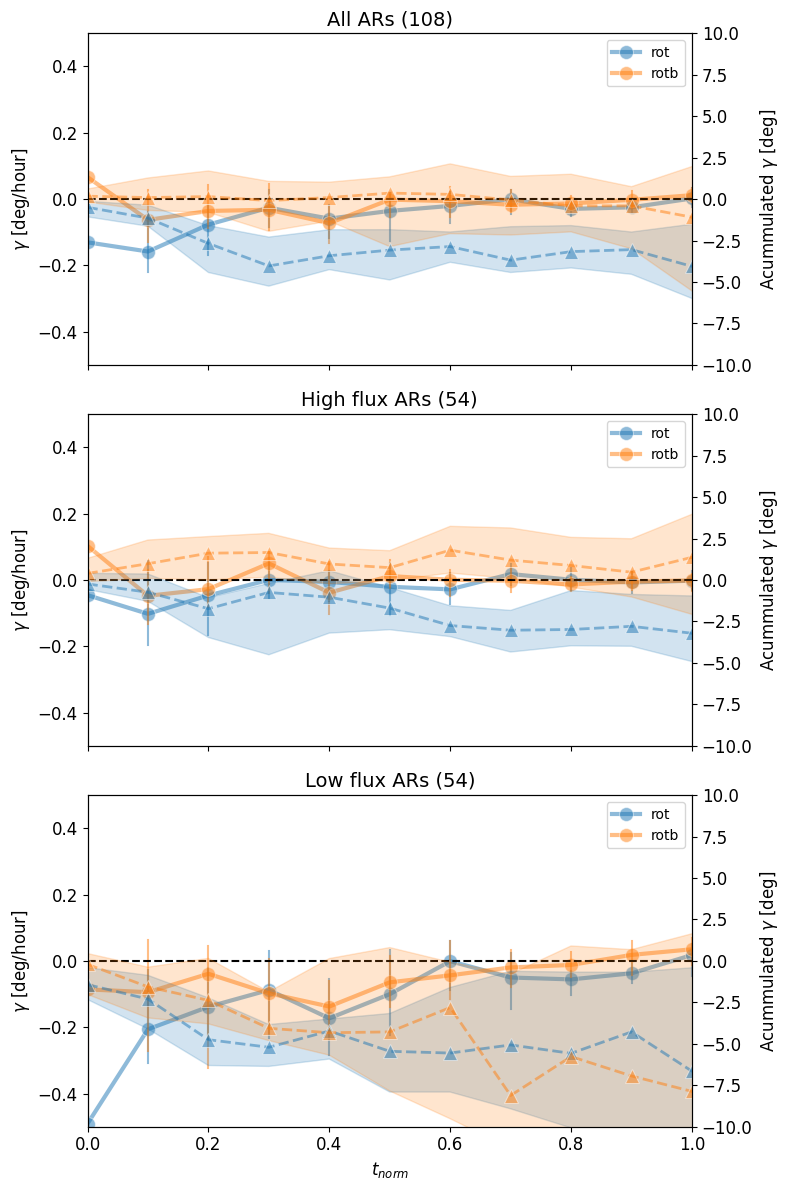

In [ ]:
DFx2 = DFx.assign(fraca=lambda x: np.abs(x.alpha - x.alphab))
DFx2 = DFx2.assign(t_mean=lambda x: round(10 * x.t_norm) / 10)
DFx2 = DFx2.assign(rot_cum=lambda x: x.rot_cum * 1.5 * x.stp)
DFx2 = DFx2.assign(rotb_cum=lambda x: x.rotb_cum * 1.5 * x.stp)

DFmax = DFx2[DFx2.t_mean == 1].groupby('AR').mean().reset_index()
ARup = DFmax[DFmax.flux >= np.median(DFmax.flux)].AR.unique()
ARlow = DFmax[DFmax.flux < np.median(DFmax.flux)].AR.unique()

# --- 3 filas, 1 columna ---
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True, sharey=True)

for i, ARs in enumerate([DFmax.AR.unique(), ARup, ARlow]):
    ax1 = axes[i]

    # --- rot y rotb ---
    df1 = pd.melt(
        DFx2,
        id_vars=['AR', 't_mean'],
        value_vars=['rot', 'rotb'],
        var_name='variable',
        value_name='value'
    )

    sns.lineplot(
        data=df1[df1.AR.isin(ARs)].assign(value=lambda d: d.value),
        x='t_mean',
        y='value',
        estimator='median',
        hue='variable',
        errorbar='ci',
        err_style='bars',
        marker='o',
        linewidth=3,
        markersize=10,
        alpha=0.5,
        ax=ax1
    )

    ax1.set_xlim(0, 1)
    ax1.set_ylim(-0.5, 0.5)
    ax1.axhline(0, color='black', linestyle='dashed')
    ax1.set_ylabel(r'$\gamma $ [deg/hour]', fontsize=12)
    ax1.tick_params(axis='both', labelsize=12)
    ax1.legend(loc='upper right', fontsize=10)

    # --- Segundo eje: rot_cum y rotb_cum ---
    ax2 = ax1.twinx()

    df2 = pd.melt(
        DFx2,
        id_vars=['AR', 't_mean'],
        value_vars=['rot_cum', 'rotb_cum'],
        var_name='variable',
        value_name='value'
    )

    sns.lineplot(
        data=df2[df2.AR.isin(ARs)].assign(value=lambda d: d.value),
        x='t_mean',
        y='value',
        hue='variable',
        estimator='median',
        errorbar='ci',
        err_style='band',
        marker='^',
        linewidth=2,
        linestyle='dashed',
        markersize=10,
        alpha=0.5,
        ax=ax2
    )

    ax2.set_ylim(-10, 10)
    ax2.tick_params(axis='both', labelsize=12)
    ax2.set_ylabel(r'Acummulated $\gamma$ [deg]', fontsize=12)
    ax2.legend().remove()

    # --- Títulos específicos ---
    if i == 0:
        ax1.set_title(f"All ARs ({len(ARs)})", fontsize=14)
    elif i == 1:
        ax1.set_title(f"High flux ARs ({len(ARs)})", fontsize=14)
    else:
        ax1.set_title(f"Low flux ARs ({len(ARs)})", fontsize=14)

# Etiqueta común para el eje x
axes[-1].set_xlabel(r'$t_{norm}$', fontsize=12)

plt.tight_layout()
plt.show()



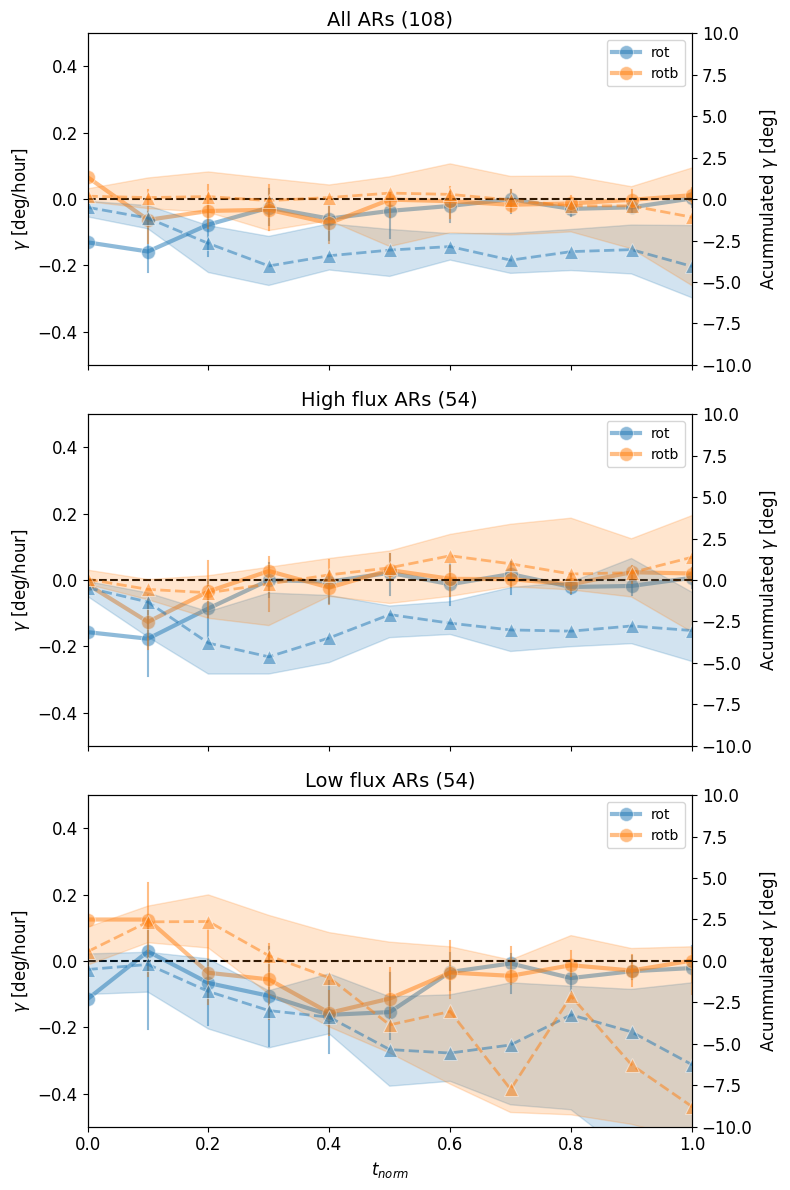

In [ ]:
DFx2 = DFx.assign(fraca=lambda x: np.abs(x.alpha - x.alphab))
DFx2 = DFx2.assign(t_mean=lambda x: round(10 * x.t_norm) / 10)
DFx2 = DFx2.assign(rot_cum=lambda x: x.rot_cum * 1.5 * x.stp)
DFx2 = DFx2.assign(rotb_cum=lambda x: x.rotb_cum * 1.5 * x.stp)

DFmax = DFx2[DFx2.t_mean == 1].groupby('AR').mean().reset_index()
DFmax  =  DFmax.assign(tw= lambda x: np.abs(x.Nt)*x.flux**2)
ARup = DFmax[DFmax.tw >= np.median(DFmax.tw)].AR.unique()
ARlow = DFmax[DFmax.tw < np.median(DFmax.tw)].AR.unique()

# --- 3 filas, 1 columna ---
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True, sharey=True)

for i, ARs in enumerate([DFmax.AR.unique(), ARup, ARlow]):
    ax1 = axes[i]

    # --- rot y rotb ---
    df1 = pd.melt(
        DFx2,
        id_vars=['AR', 't_mean'],
        value_vars=['rot', 'rotb'],
        var_name='variable',
        value_name='value'
    )

    sns.lineplot(
        data=df1[df1.AR.isin(ARs)].assign(value=lambda d: d.value),
        x='t_mean',
        y='value',
        estimator='median',
        hue='variable',
        errorbar='ci',
        err_style='bars',
        marker='o',
        linewidth=3,
        markersize=10,
        alpha=0.5,
        ax=ax1
    )

    ax1.set_xlim(0, 1)
    ax1.set_ylim(-0.5, 0.5)
    ax1.axhline(0, color='black', linestyle='dashed')
    ax1.set_ylabel(r'$\gamma $ [deg/hour]', fontsize=12)
    ax1.tick_params(axis='both', labelsize=12)
    ax1.legend(loc='upper right', fontsize=10)

    # --- Segundo eje: rot_cum y rotb_cum ---
    ax2 = ax1.twinx()

    df2 = pd.melt(
        DFx2,
        id_vars=['AR', 't_mean'],
        value_vars=['rot_cum', 'rotb_cum'],
        var_name='variable',
        value_name='value'
    )

    sns.lineplot(
        data=df2[df2.AR.isin(ARs)].assign(value=lambda d: d.value),
        x='t_mean',
        y='value',
        hue='variable',
        estimator='median',
        errorbar='ci',
        err_style='band',
        marker='^',
        linewidth=2,
        linestyle='dashed',
        markersize=10,
        alpha=0.5,
        ax=ax2
    )

    ax2.set_ylim(-10, 10)
    ax2.tick_params(axis='both', labelsize=12)
    ax2.set_ylabel(r'Acummulated $\gamma$ [deg]', fontsize=12)
    ax2.legend().remove()

    # --- Títulos específicos ---
    if i == 0:
        ax1.set_title(f"All ARs ({len(ARs)})", fontsize=14)
    elif i == 1:
        ax1.set_title(f"High flux ARs ({len(ARs)})", fontsize=14)
    else:
        ax1.set_title(f"Low flux ARs ({len(ARs)})", fontsize=14)

# Etiqueta común para el eje x
axes[-1].set_xlabel(r'$t_{norm}$', fontsize=12)

plt.tight_layout()
plt.show()

AR      alpha     alphab    t_norm   lat        fn        Nt   mag  \
0      8193  55.413941  17.580973  0.001103 -22.0  0.050234  0.468819   0.0   
1      8193  52.658806  17.694912  0.067696 -22.0  0.066990  0.468819   4.0   
2      8193  26.857078  15.790828  0.134289 -22.0  0.107903  0.468819   8.0   
3      8193  20.252607   9.252872  0.200882 -22.0  0.143195  0.468819  12.0   
4      8193  19.019187   9.131157  0.267475 -22.0  0.195707  0.468819  16.0   
...     ...        ...        ...       ...   ...       ...       ...   ...   
2840  10747  -2.532979  -2.883163  0.790109  -7.0  0.609831 -0.279194  45.0   
2841  10747  -3.766676  -2.948410  0.842582  -7.0  0.715223 -0.279194  48.0   
2842  10747  -8.162120  -3.470280  0.895055  -7.0  0.802347 -0.279194  51.0   
2843  10747  -8.328748  -2.716777  0.947527  -7.0  0.911246 -0.279194  54.0   
2844  10747  -3.312615  -1.507657  1.000000  -7.0  0.981142 -0.279194  57.0   

              flux  stp       rot      rotb    rot_cum   rotb_cum     fraca  \
0     5.281523e+20  4.0 -0.459189  0.018990  -2.755135   0.113938 -0.008287   
1     7.043322e+20  4.0 -2.379739 -0.149179 -17.033567  -0.781134 -0.045192   
2     1.134488e+21  4.0 -2.700517 -0.703503 -33.236666  -5.002154 -0.100551   
3     1.505539e+21  4.0 -0.653158 -0.554973 -37.155612  -8.331989 -0.032251   
4     2.057652e+21  4.0 -0.149742  0.101909 -38.054061  -7.720534 -0.007873   
...            ...  ...       ...       ...        ...        ...       ...   
2840  4.781975e+21  3.0 -0.007561 -0.014032  14.807162  78.769730  0.002985   
2841  5.608403e+21  3.0 -0.625460 -0.065235  11.992591  78.476171  0.166051   
2842  6.291583e+21  3.0 -0.506897  0.025737   9.711555  78.591988  0.062104   
2843  7.145513e+21  3.0  0.538834  0.218069  12.136308  79.573299 -0.064696   
2844  7.693606e+21  3.0  1.114696  0.268693  17.152440  80.782419 -0.336500   

         fracb  t_mean  alpha_max  alphab_max  
0     0.001080     0.0   9.778265    8.908899  
1    -0.008431     0.1   9.778265    8.908899  
2    -0.044551     0.1   9.778265    8.908899  
3    -0.059978     0.2   9.778265    8.908899  
4     0.011161     0.3   9.778265    8.908899  
...        ...     ...        ...         ...  
2840  0.004867     0.8  -3.312615   -1.507657  
2841  0.022126     0.8  -3.312615   -1.507657  
2842 -0.007416     0.9  -3.312615   -1.507657  
2843 -0.080268     0.9  -3.312615   -1.507657  
2844 -0.178219     1.0  -3.312615   -1.507657  

[2845 rows x 19 columns]

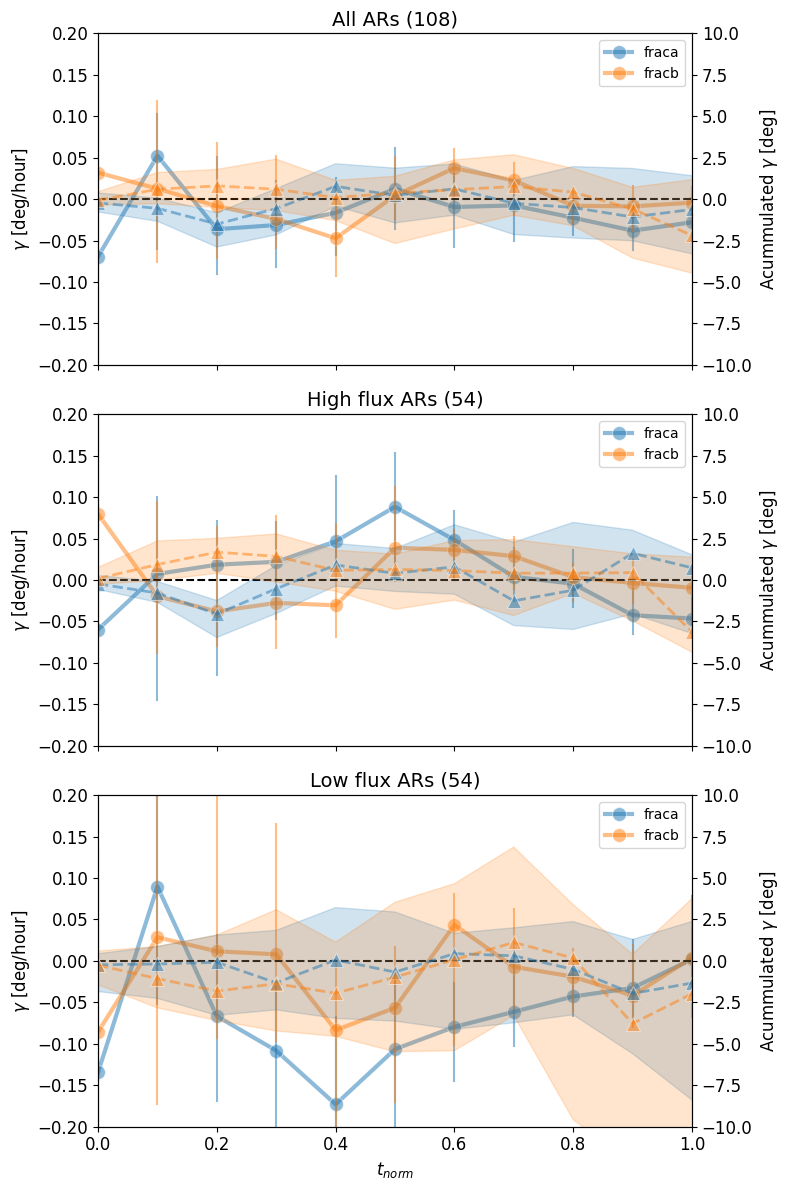

In [ ]:
DFx2 = DFx.assign(t_mean=lambda x: round(10 * x.t_norm) / 10)

# --- tomar alpha y alphab al máximo (t_mean=1) ---
DFmax_alpha = (
    DFx2[DFx2.t_mean == 1]
    .groupby("AR")[["alpha", "alphab"]]
    .mean()
    .reset_index()
    .rename(columns={"alpha": "alpha_max", "alphab": "alphab_max"})
)

DFx2 = DFx2.merge(DFmax_alpha, on="AR", how="left")


DFx2 = DFx2.assign(fraca=lambda x: np.sign(x.alpha)*x.rot)
DFx2 = DFx2.assign(fracb=lambda x: np.sign(x.alphab)*x.rotb)

# --- merge con DFx2 ---
DFx2 = DFx2.assign(rot_cum=lambda x: np.sign(x.alpha)*x.rot_cum * 1.5 * x.stp)
DFx2 = DFx2.assign(rotb_cum=lambda x: np.sign(x.alphab)*x.rotb_cum * 1.5 * x.stp)

DFmax = DFx2[DFx2.t_mean == 1].groupby('AR').mean().reset_index()
ARup = DFmax[DFmax.flux >= np.median(DFmax.flux)].AR.unique()
ARlow = DFmax[DFmax.flux < np.median(DFmax.flux)].AR.unique()

# --- 3 filas, 1 columna ---
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True, sharey=True)

for i, ARs in enumerate([DFmax.AR.unique(), ARup, ARlow]):
    ax1 = axes[i]

    # --- rot y rotb ---
    df1 = pd.melt(
        DFx2,
        id_vars=['AR', 't_mean'],
        value_vars=['fraca', 'fracb'],
        var_name='variable',
        value_name='value'
    )

    sns.lineplot(
        data=df1[df1.AR.isin(ARs)].assign(value=lambda d: d.value),
        x='t_mean',
        y='value',
        estimator='median',
        hue='variable',
        errorbar='ci',
        err_style='bars',
        marker='o',
        linewidth=3,
        markersize=10,
        alpha=0.5,
        ax=ax1
    )

    ax1.set_xlim(0, 1)
    ax1.set_ylim(-0.2, 0.2)
    ax1.axhline(0, color='black', linestyle='dashed')
    ax1.set_ylabel(r'$\gamma $ [deg/hour]', fontsize=12)
    ax1.tick_params(axis='both', labelsize=12)
    ax1.legend(loc='upper right', fontsize=10)

    # --- Segundo eje: rot_cum y rotb_cum ---
    ax2 = ax1.twinx()

    df2 = pd.melt(
        DFx2,
        id_vars=['AR', 't_mean'],
        value_vars=['rot_cum', 'rotb_cum'],
        var_name='variable',
        value_name='value'
    )

    sns.lineplot(
        data=df2[df2.AR.isin(ARs)].assign(value=lambda d: d.value),
        x='t_mean',
        y='value',
        hue='variable',
        estimator='median',
        errorbar='ci',
        err_style='band',
        marker='^',
        linewidth=2,
        linestyle='dashed',
        markersize=10,
        alpha=0.5,
        ax=ax2
    )

    ax2.set_ylim(-10, 10)
    ax2.tick_params(axis='both', labelsize=12)
    ax2.set_ylabel(r'Acummulated $\gamma$ [deg]', fontsize=12)
    ax2.legend().remove()

    # --- Títulos específicos ---
    if i == 0:
        ax1.set_title(f"All ARs ({len(ARs)})", fontsize=14)
    elif i == 1:
        ax1.set_title(f"High flux ARs ({len(ARs)})", fontsize=14)
    else:
        ax1.set_title(f"Low flux ARs ({len(ARs)})", fontsize=14)

# Etiqueta común para el eje x
axes[-1].set_xlabel(r'$t_{norm}$', fontsize=12)

plt.tight_layout()
plt.show()


<Axes: xlabel='frac', ylabel='Nt'>

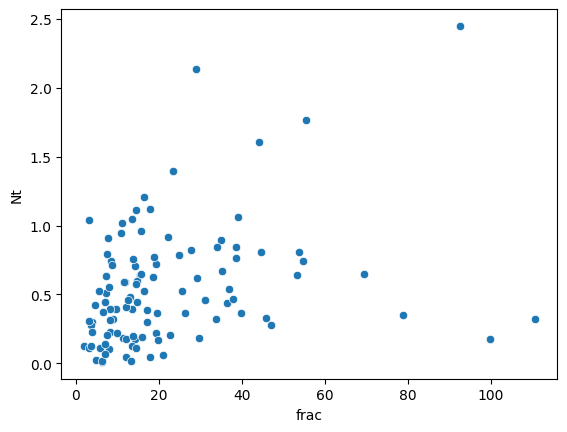

In [ ]:
sns.scatterplot(data=np.abs(DFx2).groupby('AR').max(),x='frac',y='Nt')
#sns.scatterplot(data=DFx2.groupby('AR').mean(),x='rotb',y='Nt')

#plt.xlim(-1,1)
#plt.ylim(-1,1)

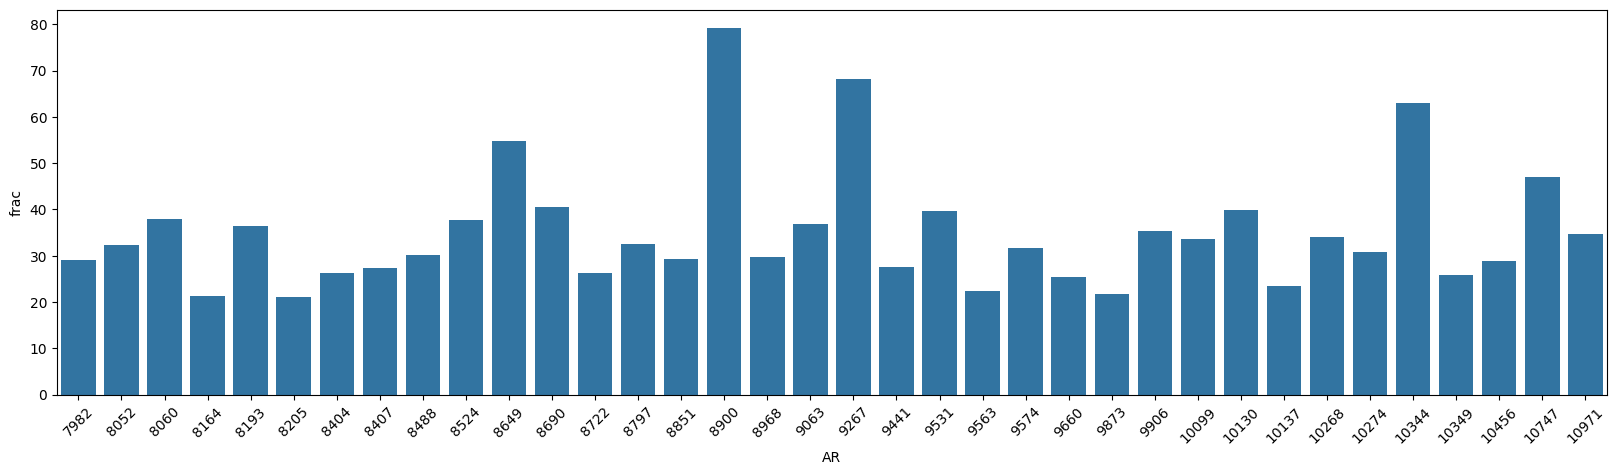

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(data=DFx2[DFx2.frac > 20].groupby(['AR']).mean().reset_index(),x='AR',y='frac')

plt.xticks(rotation=45)
plt.show()


In [ ]:
DFx2=DFx.assign(frac=lambda x: np.abs(x.alpha-x.alphab))
DFx2=DFx2.assign(t_mean=lambda x: round(10*x.t_norm)/10)
#

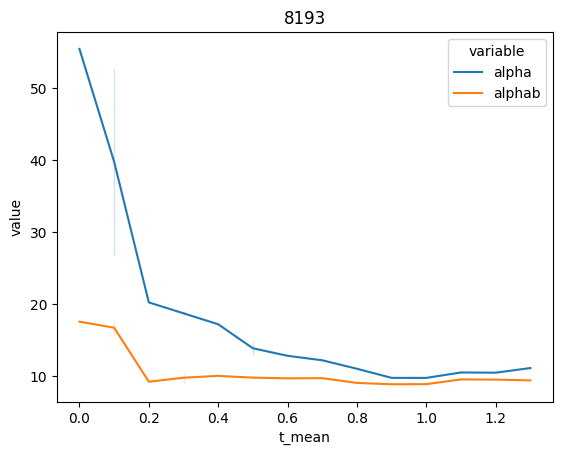

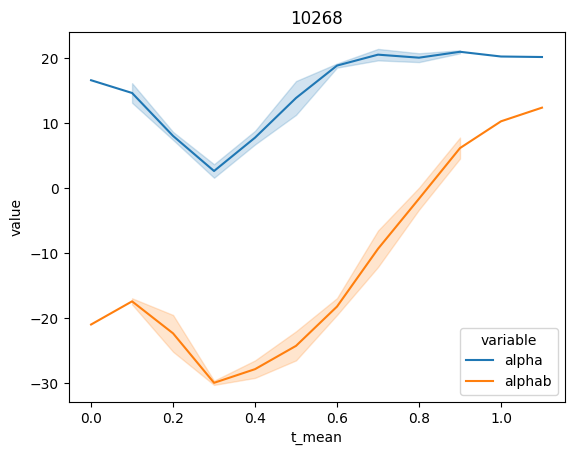

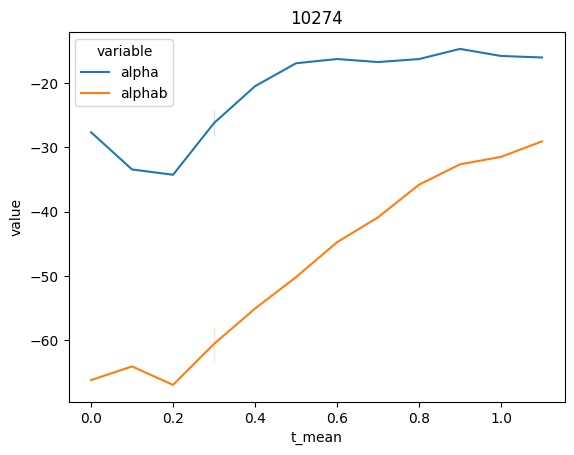

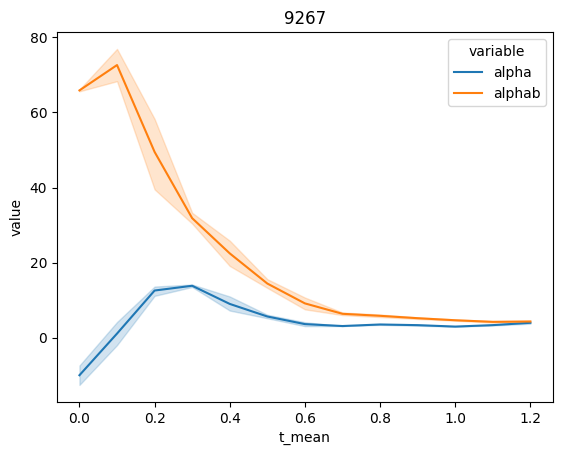

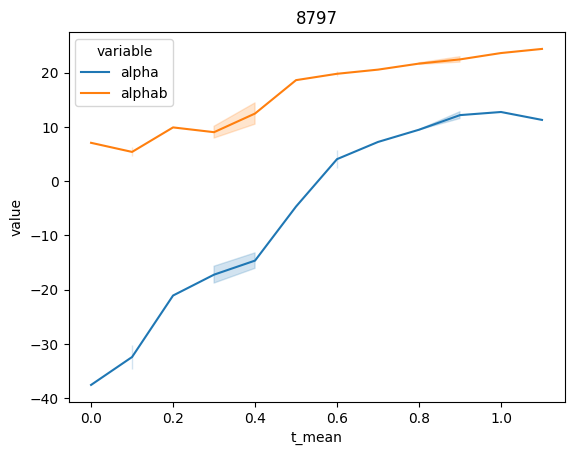

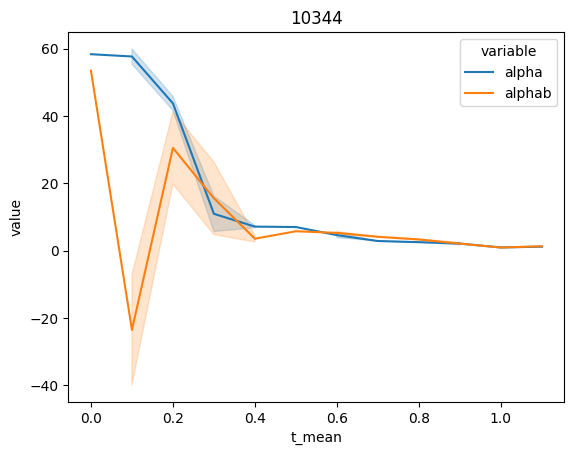

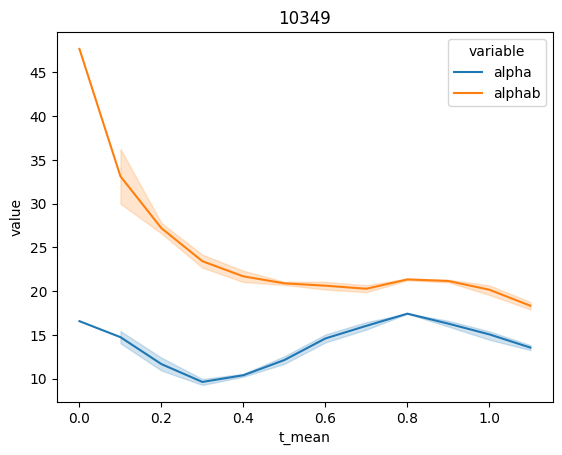

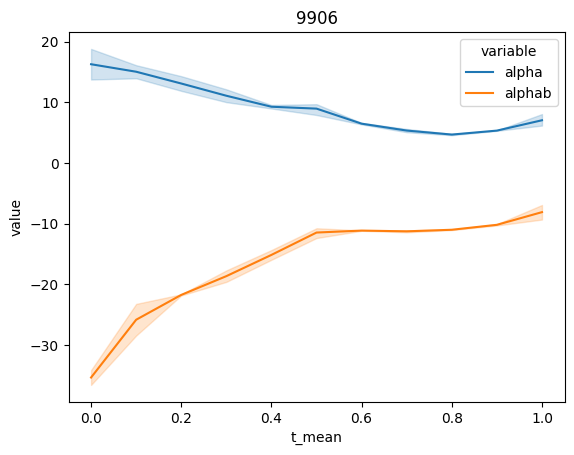

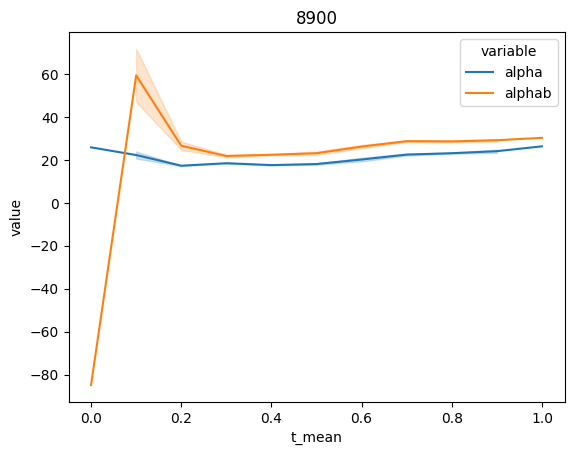

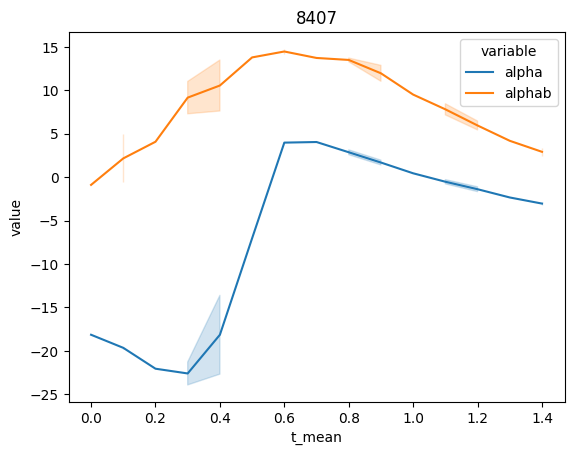

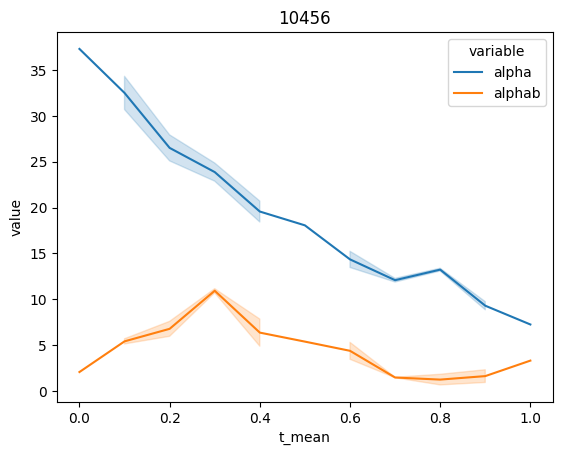

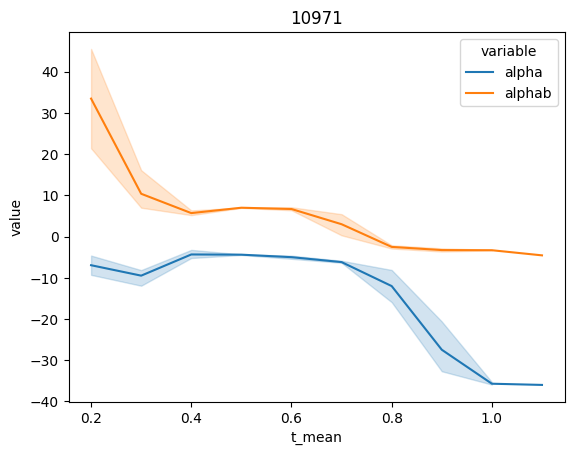

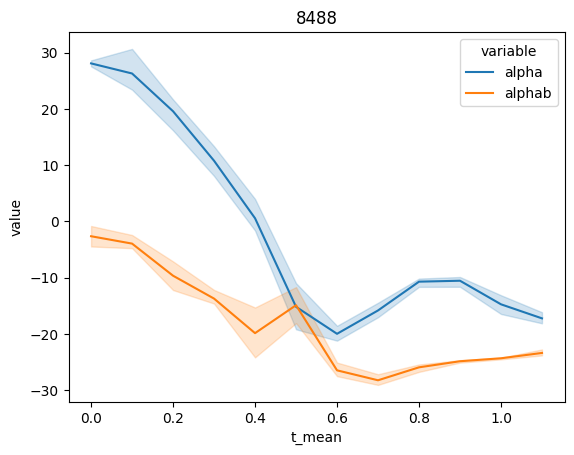

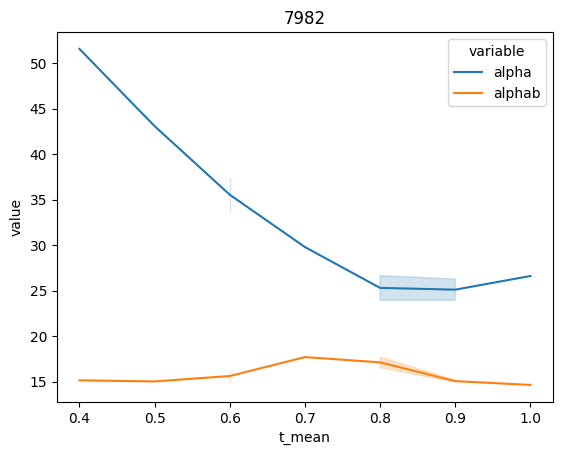

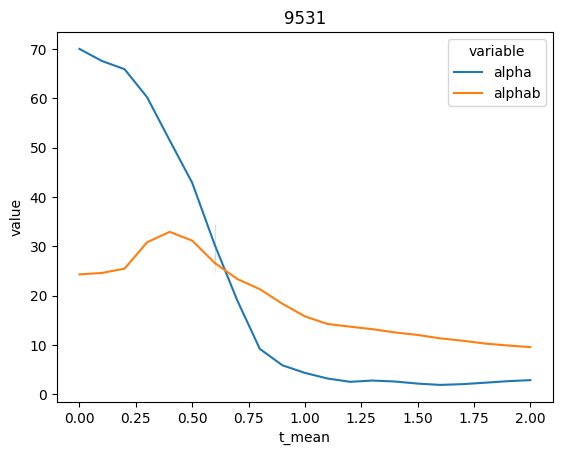

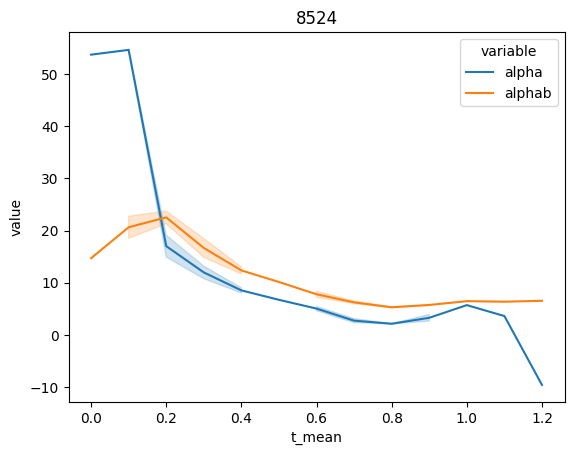

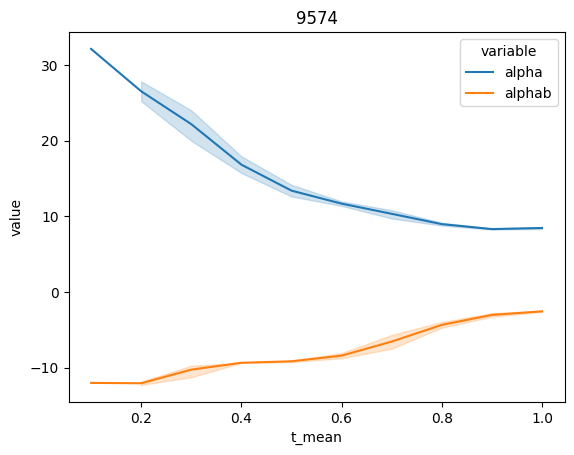

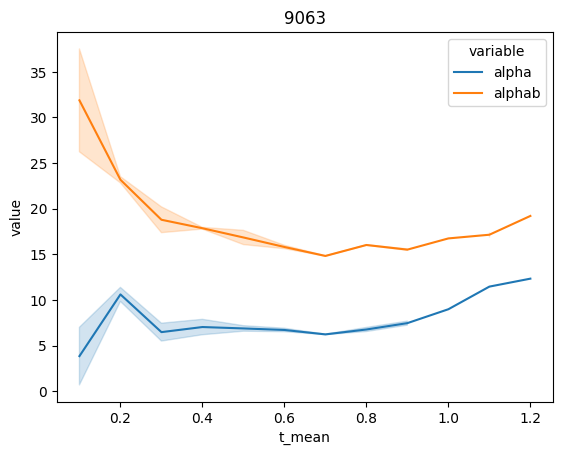

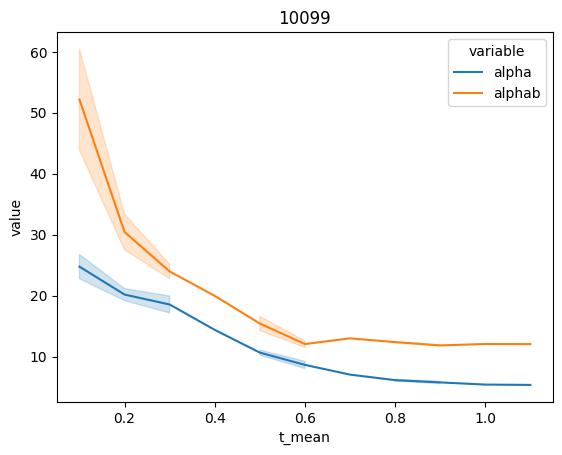

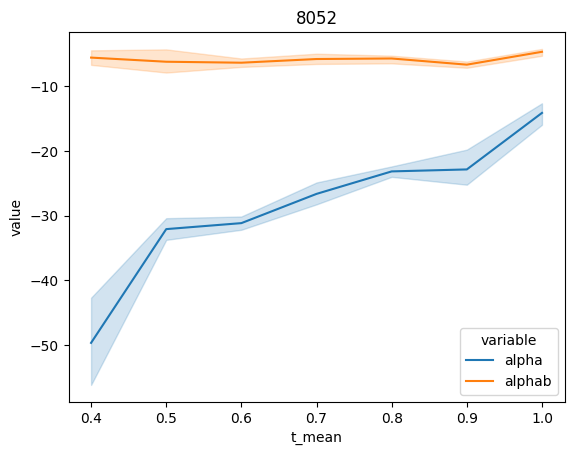

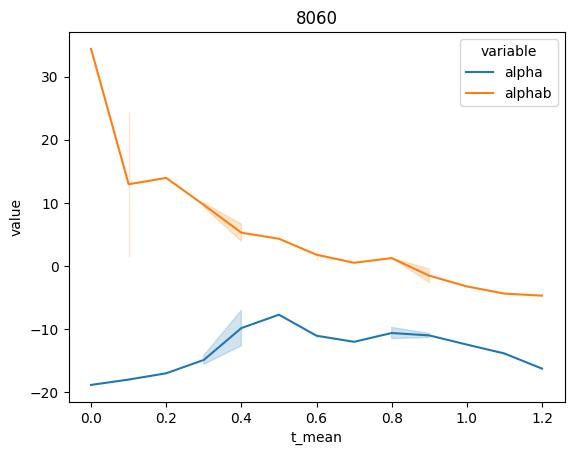

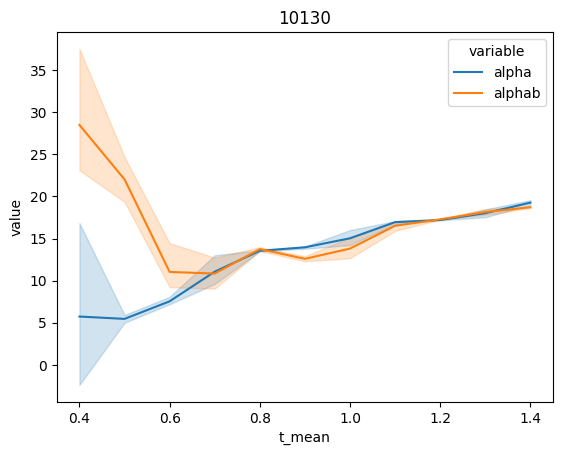

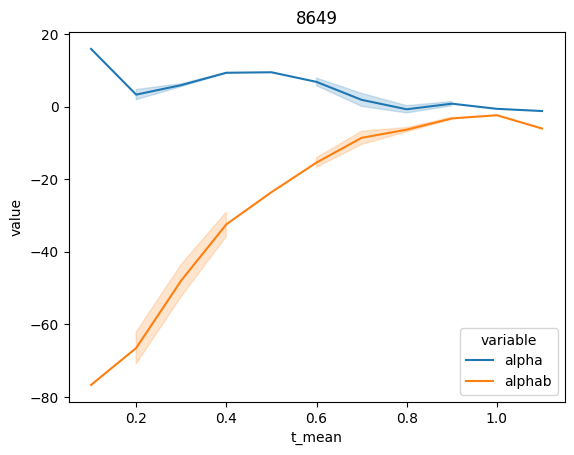

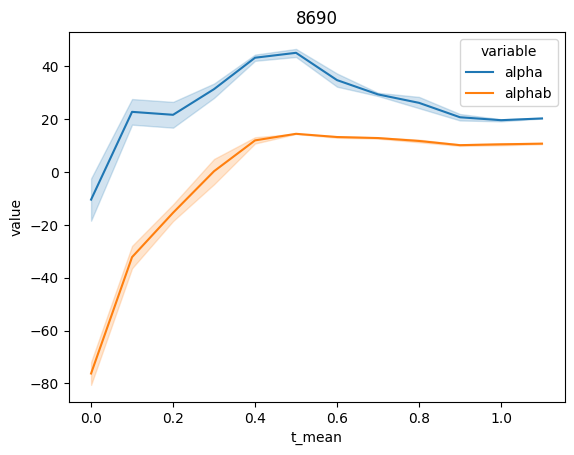

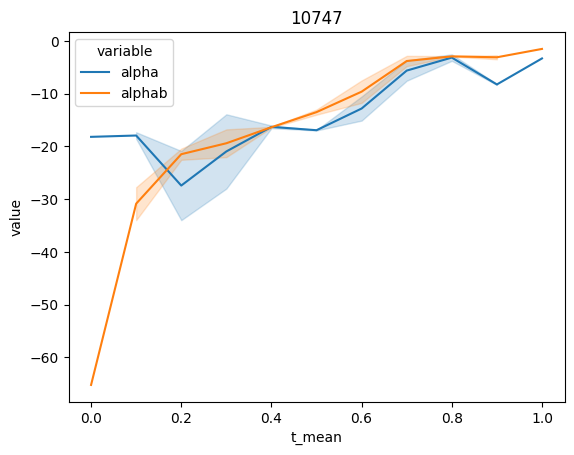

In [ ]:
for name in DFx2[DFx2.frac > 30].AR.unique():

  sns.lineplot(data=pd.melt(DFx2[DFx2.AR==name],id_vars=['t_mean','AR'],value_vars=['alpha','alphab'],var_name='variable'),
             x='t_mean',y='value',hue='variable')
  plt.title(name)
  plt.show()

(0.0, 5.0)

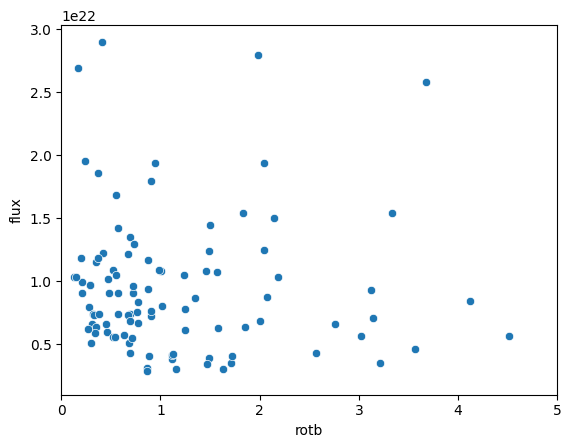

In [ ]:
sns.scatterplot(data=np.abs(DFx2).groupby('AR').max(),x='rotb',y='flux')
#sns.scatterplot(data=DFx2.groupby('AR').mean(),x='rotb',y='Nt')

plt.xlim(0,5)
#plt.ylim(-1,1)

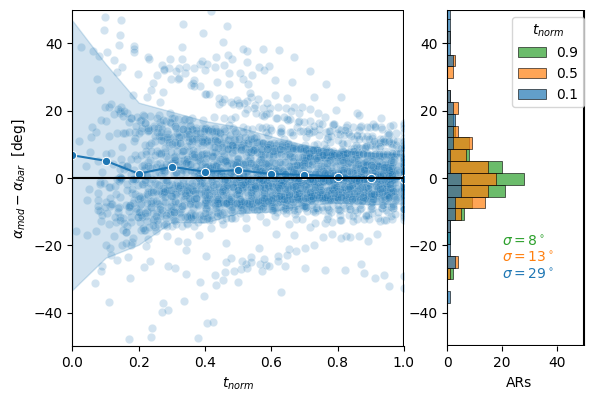

In [46]:
DFx2=DFx.assign(frac=lambda x: x.alpha-x.alphab)
DFx2=DFx2.assign(t_mean=lambda x: round(10*x.t_norm)/10)
#
#
#  Jointplot de seaborn con histograma extendido en marg_y
g = sns.jointplot(
    data=DFx2,
    x='t_norm',
    y='frac',
    kind='scatter',
    alpha=0.2,
    marginal_kws={'bins': 30, 'fill': True},ratio=2,height=6,space=0.3
)

DFx2=DFx2.groupby(['AR','t_mean']).mean().reset_index()
sns.lineplot(
data=DFx2,
x='t_mean',
y='frac',
ax=g.ax_joint,
estimator='mean',
errorbar='sd',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
err_style='band',   # o 'bars' para barras verticales
marker='o'          # opcional para marcar puntos medios
)

g.ax_marg_x.set_visible(False)
g.ax_marg_y.clear()
hist=sns.histplot(DFx2[DFx2['t_mean'].isin([0.1,0.5,0.9])],y='frac',
             hue='t_mean',palette=['tab:blue','tab:orange','tab:green'],
             alpha=0.7,ax=g.ax_marg_y)

#g.ax_marg_y.legend()
g.ax_marg_y.legend(title=r'$t_{norm}$',labels=['0.9','0.5','0.1'],loc='upper right')
handles,labels=hist.get_legend_handles_labels()
#hist.legend(handles=handles,labels=labels,title=r'$t_{norm}$')
handles,labels=hist.get_legend_handles_labels()
g.ax_marg_y.set_ylabel('')
g.ax_marg_y.set_xlabel('ARs')
g.ax_joint.plot([0,1],[50,50],color='black')
g.ax_joint.plot([1,1],[-50,50],color='black')
g.ax_marg_y.plot([0,50],[-50,-50],color='black')
g.ax_marg_y.plot([0,50],[50,50],color='black')
g.ax_marg_y.plot([50,50],[-50,50],color='black')


#g.ax_marg_y.legend(handles,['0.1','0.5','0.9'],title=r'$t_{norm}$')
g.ax_marg_y.set_ylim(-50, 50)
g.ax_joint.set_xlim(0, 1)
g.ax_joint.set_ylim(-50, 50)

stds=DFx2[DFx2['t_mean'].isin([0.1,0.5,0.9])].groupby('t_mean').std()['frac'].values

g.ax_marg_y.text(20,-30,rf'$\sigma=${stds[0]:.0f}$^\circ$',color='tab:blue')
g.ax_marg_y.text(20,-25,rf'$\sigma=${stds[1]:.0f}$^\circ$',color='tab:orange')
g.ax_marg_y.text(20,-20,rf'$\sigma=${stds[2]:.0f}$^\circ$',color='tab:green')

g.ax_joint.axhline(0,color='black')
g.set_axis_labels(r'$t_{norm}$', r'$\alpha_{mod}-\alpha_{bar}$  [deg]')

#plt.savefig('./plots/errorhist.pdf',dpi=300)


In [ ]:
set(DFx2.t_mean.values)

{np.float64(0.0),
 np.float64(0.1),
 np.float64(0.2),
 np.float64(0.3),
 np.float64(0.4),
 np.float64(0.5),
 np.float64(0.6),
 np.float64(0.7),
 np.float64(0.8),
 np.float64(0.9),
 np.float64(1.0),
 np.float64(1.1),
 np.float64(1.2),
 np.float64(1.3),
 np.float64(1.4),
 np.float64(1.5),
 np.float64(1.6),
 np.float64(1.7),
 np.float64(1.8),
 np.float64(1.9),
 np.float64(2.0)}

<>:74: SyntaxWarning: invalid escape sequence '\s'
<>:74: SyntaxWarning: invalid escape sequence '\s'
<>:74: SyntaxWarning: invalid escape sequence '\s'
<>:74: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3669069832.py:74: SyntaxWarning: invalid escape sequence '\s'
  f'$\sigma_\mathrm{{mod}}$ = {DFx2.alpha.std():.0f}\n$\sigma_\mathrm{{bar}}$ = {DFx2.alphab.std():.0f}',
/tmp/ipython-input-3669069832.py:74: SyntaxWarning: invalid escape sequence '\s'
  f'$\sigma_\mathrm{{mod}}$ = {DFx2.alpha.std():.0f}\n$\sigma_\mathrm{{bar}}$ = {DFx2.alphab.std():.0f}',


63
22
10
6


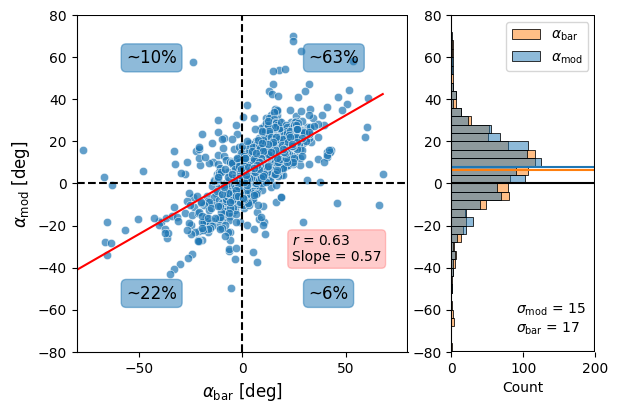

In [47]:
DFx2=DFx.assign(frac=lambda x: x.alpha-x.alphab)
DFx2=DFx2.assign(t_mean=lambda x: round(10*x.t_norm)/10)
DFx2=DFx2.groupby(['AR','t_mean']).mean().reset_index()
DFx2=DFx2[DFx2.t_mean<=1]
#
#
#  Jointplot de seaborn con histograma extendido en marg_y
g = sns.jointplot(
    data=DFx2,
    x='alphab',
    y='alpha',
    kind='scatter',
    alpha=0.7,
    marginal_kws={'bins': 30,'binrange':(-80,80), 'fill': True},
    ratio=2,height=6,space=0.3
)

g.set_axis_labels(r'$\alpha_\mathrm{bar}$ [deg]',r'$\alpha_\mathrm{mod}$ [deg]', fontsize=12)

g.ax_marg_x.set_visible(False)
#g.ax_marg_y.set_visible(False)
g.ax_marg_x.clear()
g.ax_marg_y.clear()
g.ax_marg_x.set_xlabel('X axis label')
g.ax_marg_y.set_ylabel('Y axis label')
g.ax_marg_x.tick_params(axis='x', labelsize=12)
g.ax_marg_y.tick_params(axis='y', labelsize=12)

hist=sns.histplot(data=pd.melt(DFx2,id_vars=['t_norm','lat','AR','fn','mag','flux'],value_vars=['alpha','alphab']),y='value',
                  hue='variable',
             palette=['tab:blue','tab:orange'],
             alpha=0.5,ax=g.ax_marg_y,binrange=(-80,80),bins=40)

# Linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(DFx2['alphab'], DFx2['alpha'])

# Add linear fit line
x_fit = np.linspace(DFx2['alphab'].min(), DFx2['alphab'].max(), 100)
y_fit = slope * x_fit + intercept
g.ax_joint.plot(x_fit, y_fit, color='red', label=f'Fit: y={slope:.2f}x+{intercept:.2f}')

# Annotate with correlation coefficient and slope
g.ax_joint.text(
    0.65, 0.35,
    f'$r$ = {r_value:.2f}\nSlope = {slope:.2f}',
    transform=g.ax_joint.transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle="round", alpha=0.2, color='red')
)

#g.ax_marg_y.legend()
g.ax_marg_y.legend(title='',labels=[r'$\alpha_\mathrm{bar}$',r'$\alpha_\mathrm{mod}$'],loc='upper right')
handles,labels=hist.get_legend_handles_labels()
#hist.legend(handles=handles,labels=labels,title=r'$t_{norm}$')
handles,labels=hist.get_legend_handles_labels()
g.ax_marg_y.set_ylabel('')
#
g.ax_marg_y.tick_params(axis='y', labelsize=10)  # Set y-ticklabel fontsize
g.ax_marg_y.tick_params(axis='x', labelsize=10)  # Set x-ticklabel fontsize (if needed)

g.ax_marg_y.axhline(0,color='black')

g.ax_marg_y.axhline(DFx2.alpha.mean(),color='tab:blue')
g.ax_marg_y.axhline(DFx2.alphab.mean(),color='tab:orange')

g.ax_joint.axvline(0,color='black',linestyle='dashed')
g.ax_joint.axhline(0,color='black',linestyle='dashed')
g.ax_joint.set_ylim(-80, 80)
g.ax_joint.set_xlim(-80, 80)

g.ax_marg_y.text(
    0.45, 0.15,
    f'$\sigma_\mathrm{{mod}}$ = {DFx2.alpha.std():.0f}\n$\sigma_\mathrm{{bar}}$ = {DFx2.alphab.std():.0f}',
    transform=g.ax_marg_y.transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle="round", alpha=0.0, color='red')
)

g.ax_marg_y.set_xlim(0,200)

g.ax_joint.plot([-80,80],[80,80],color='black')
g.ax_joint.plot([80,80],[-80,80],color='black')
g.ax_marg_y.plot([0,200],[-80,-80],color='black')
g.ax_marg_y.plot([0,200],[80,80],color='black')
g.ax_marg_y.plot([200,200],[-80,80],color='black')


aa=DFx2.alpha.values
ab=DFx2.alphab.values



print(round(100*sum((aa>0)*(ab>0))/len(aa)))
print(round(100*sum((aa<0)*(ab<0))/len(aa)))
print(round(100*sum((aa>0)*(ab<0))/len(aa)))
print(round(100*sum((aa<0)*(ab>0))/len(aa)))

g.ax_joint.text(0.7,0.9,f'~{round(100*sum((aa>0)*(ab>0))/len(aa))}%',transform=g.ax_joint.transAxes,
                fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", alpha=0.5, color='tab:blue'))
g.ax_joint.text(0.15,0.9,f'~{round(100*sum((aa>0)*(ab<0))/len(aa))}%',transform=g.ax_joint.transAxes,
                fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", alpha=0.5, color='tab:blue'))
g.ax_joint.text(0.7,0.2,f'~{round(100*sum((aa<0)*(ab>0))/len(aa))}%',transform=g.ax_joint.transAxes,
                fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", alpha=0.5, color='tab:blue'))
g.ax_joint.text(0.15,0.2,f'~{round(100*sum((aa<0)*(ab<0))/len(aa))}%',transform=g.ax_joint.transAxes,
                fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", alpha=0.5, color='tab:blue'))
plt.savefig('./plots/alpha-alpha.pdf',dpi=300)


In [ ]:
aa=DFx2.alpha.values
ab=DFx2.alphab.values



print(round(100*sum((aa>0)*(ab>0))/len(aa)))
print(round(100*sum((aa<0)*(ab<0))/len(aa)))
print(round(100*sum((aa>0)*(ab<0))/len(aa)))
print(round(100*sum((aa<0)*(ab>0))/len(aa)))



print(len(aa))


63
22
10
5
1111


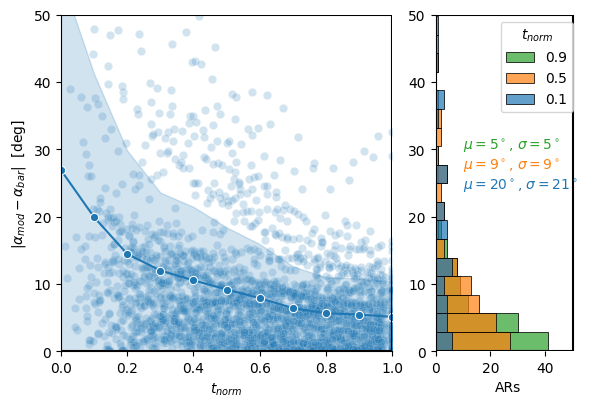

In [48]:
DFx2=DFx.assign(frac=lambda x: np.abs(x.alpha-x.alphab))
DFx2=DFx2.assign(t_mean=lambda x: round(10*x.t_norm)/10)
#
#
#  Jointplot de seaborn con histograma extendido en marg_y
g = sns.jointplot(
    data=DFx2,
    x='t_norm',
    y='frac',
    kind='scatter',
    alpha=0.2,
    marginal_kws={'bins': 30, 'fill': True},ratio=2,height=6,space=0.3
)

DFx2=DFx2.groupby(['AR','t_mean']).mean().reset_index()
sns.lineplot(
data=DFx2,
x='t_mean',
y='frac',
ax=g.ax_joint,
estimator='mean',
errorbar='sd',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
err_style='band',   # o 'bars' para barras verticales
marker='o'          # opcional para marcar puntos medios
)

g.ax_marg_x.set_visible(False)
g.ax_marg_y.clear()
hist=sns.histplot(DFx2[DFx2['t_mean'].isin([0.1,0.5,0.9])],y='frac',
             hue='t_mean',palette=['tab:blue','tab:orange','tab:green'],
             alpha=0.7,ax=g.ax_marg_y)

#g.ax_marg_y.legend()
g.ax_marg_y.legend(title=r'$t_{norm}$',labels=['0.9','0.5','0.1'],loc='upper right')
handles,labels=hist.get_legend_handles_labels()
#hist.legend(handles=handles,labels=labels,title=r'$t_{norm}$')
handles,labels=hist.get_legend_handles_labels()
g.ax_marg_y.set_ylabel('')
g.ax_marg_y.set_xlabel('ARs')
g.ax_joint.plot([0,1],[50,50],color='black')
g.ax_joint.plot([1,1],[0,50],color='black')
g.ax_marg_y.plot([0,50],[0,0],color='black')
g.ax_marg_y.plot([0,50],[50,50],color='black')
g.ax_marg_y.plot([50,50],[0,50],color='black')


#g.ax_marg_y.legend(handles,['0.1','0.5','0.9'],title=r'$t_{norm}$')
g.ax_marg_y.set_ylim(0, 50)
g.ax_joint.set_xlim(0, 1)
g.ax_joint.set_ylim(0, 50)

stds=DFx2[DFx2['t_mean'].isin([0.1,0.5,0.9])].groupby('t_mean').std()['frac'].values
means=DFx2[DFx2['t_mean'].isin([0.1,0.5,0.9])].groupby('t_mean').mean()['frac'].values


g.ax_marg_y.text(10,24,rf'$\mu=${means[0]:.0f}$^\circ$, $\sigma=${stds[0]:.0f}$^\circ$',color='tab:blue')
g.ax_marg_y.text(10,27,rf'$\mu=${means[1]:.0f}$^\circ$, $\sigma=${stds[1]:.0f}$^\circ$',color='tab:orange')
g.ax_marg_y.text(10,30,rf'$\mu=${means[2]:.0f}$^\circ$, $\sigma=${stds[2]:.0f}$^\circ$',color='tab:green')

g.ax_joint.axhline(0,color='black')
g.set_axis_labels(r'$t_{norm}$', r'|$\alpha_{mod}-\alpha_{bar}$|  [deg]')

plt.savefig('./plots/errorhistabs.pdf',dpi=300)


<Axes: xlabel='alphab', ylabel='alpha'>

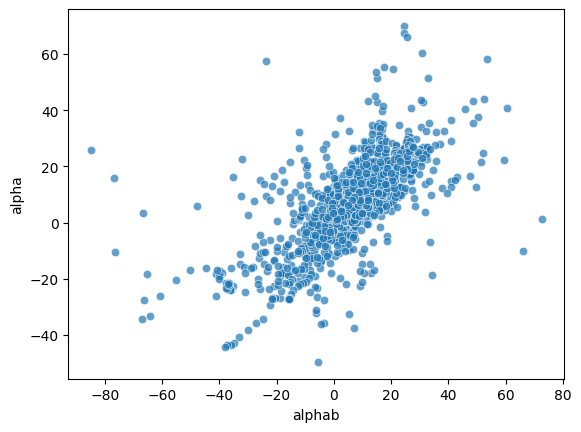

In [ ]:
sns.scatterplot(data=DFx2,x='alphab',y='alpha',alpha=0.7,color='tab:blue')

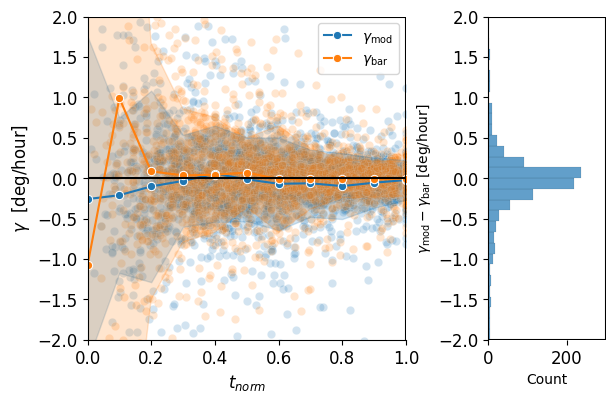

In [49]:
DFx=DFx.assign(rot= lambda x: np.gradient(x.alpha,x.mag)/1.5)
DFx=DFx.assign(rotb= lambda x: np.gradient(x.alphab,x.mag)/1.5)

DFx2=DFx.assign(frac=lambda x: x.rot-x.rotb)
DFx2=DFx2.assign(t_mean=lambda x: round(10*x.t_norm)/10)
#
#
#  Jointplot de seaborn con histograma extendido en marg_y
g = sns.jointplot(
    data=DFx2,
    x='t_norm',
    y='rot',
    kind='scatter',
    alpha=0.2,
    marginal_kws={'bins': 30, 'fill': True},ratio=2,height=6,space=0.7
)

sns.scatterplot(data=DFx2,x='t_norm',y='rotb',alpha=0.2,color='tab:orange')

DFx2=DFx2.groupby(['AR','t_mean']).mean().reset_index()
sns.lineplot(
data=DFx2,
x='t_mean',
y='rot',
ax=g.ax_joint,
estimator='mean',
errorbar='sd',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
err_style='band',   # o 'bars' para barras verticales
marker='o',          # opcional para marcar puntos medios
label=r'$\gamma_\mathrm{mod}$')
sns.lineplot(
data=DFx2,
x='t_mean',
y='rotb',
ax=g.ax_joint,
estimator='mean',
errorbar='sd',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
err_style='band',   # o 'bars' para barras verticales
marker='o',          # opcional para marcar puntos medios
label=r'$\gamma_\mathrm{bar}$'
)

g.ax_marg_x.set_visible(False)
g.ax_marg_y.clear()
'''
hist=sns.histplot(DFx2[DFx2['t_mean']<=0.5],y='rot',
             color='tab:blue',
             alpha=0.7,ax=g.ax_marg_y,bins=30,binrange=(-5,5))
hist=sns.histplot(DFx2[DFx2['t_mean']<=0.5],y='rotb',
             color='tab:orange',
             alpha=0.7,ax=g.ax_marg_y,bins=30,binrange=(-5,5))
'''


hist=sns.histplot(DFx2[DFx2['t_mean']<=1],y='frac',
             color='tab:blue',
             alpha=0.7,ax=g.ax_marg_y,bins=30,binrange=(-2,2))

#g.legend(title='',loc='upper right')
#g.ax_marg_y.legend()
#g.ax_marg_y.legend(title=r'$t_{norm}$',labels=['0.1','0.5','0.9'],loc='upper right')
handles,labels=hist.get_legend_handles_labels()
g.ax_marg_y.set_ylabel(r'$\gamma_\mathrm{mod}-\gamma_\mathrm{bar}$ [deg/hour]')
g.ax_marg_y.set_xlabel('Count')
g.ax_joint.plot([0,1],[2,2],color='black')
g.ax_joint.plot([1,1],[-2,2],color='black')
g.ax_marg_y.plot([0,300],[-2,-2],color='black')
g.ax_marg_y.plot([0,300],[2,2],color='black')
g.ax_marg_y.plot([300,300],[-2,2],color='black')


#g.ax_marg_y.legend(handles,['0.1','0.5','0.9'],title=r'$t_{norm}$')
g.ax_marg_y.set_ylim(-2, 2)
g.ax_marg_y.set_xlim(0, 300)
g.ax_joint.set_xlim(0, 1)
g.ax_joint.set_ylim(-2, 2)
g.ax_joint.tick_params(axis='both', labelsize=12)
g.ax_marg_y.tick_params(axis='both', labelsize=12)

stds=DFx2[DFx2['t_mean'].isin([0.1])].groupby('t_mean').std()[['rot','rotb']].values

#g.ax_marg_y.text(20,-2,rf'$\sigma=${stds[0][0]:.1f}$^\circ$',color='tab:blue')
#g.ax_marg_y.text(20,-2.5,rf'$\sigma=${stds[0][1]:.1f}$^\circ$',color='tab:orange')

#g.ax_marg_y.legend(handles=handles,title='$t_\mathrm{norm}$',loc='upper right')
g.ax_joint.axhline(0,color='black')
g.set_axis_labels(r'$t_{norm}$', r'$\gamma$  [deg/hour]',fontsize=12)

plt.savefig('./plots/rotations.pdf',dpi=300)


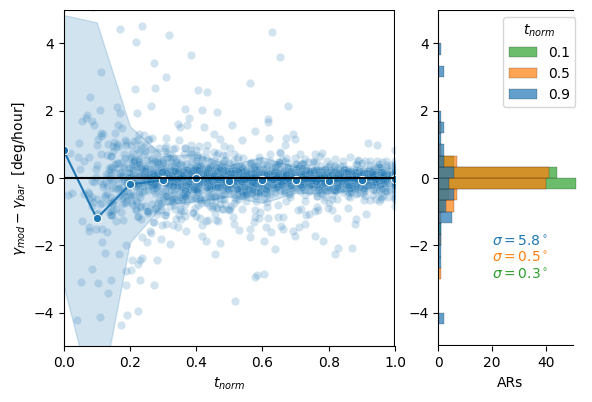

In [50]:
DFx=DFx.assign(rot= lambda x: np.gradient(x.alpha,x.mag)/1.5)
DFx=DFx.assign(rotb= lambda x: np.gradient(x.alphab,x.mag)/1.5)

DFx2=DFx.assign(frac=lambda x: x.rot-x.rotb)
DFx2=DFx2.assign(t_mean=lambda x: round(10*x.t_norm)/10)
#
#
#  Jointplot de seaborn con histograma extendido en marg_y
g = sns.jointplot(
    data=DFx2,
    x='t_norm',
    y='frac',
    kind='scatter',
    alpha=0.2,
    marginal_kws={'bins': 30, 'fill': True},ratio=2,height=6,space=0.3
)

DFx2=DFx2.groupby(['AR','t_mean']).mean().reset_index()
sns.lineplot(
data=DFx2,
x='t_mean',
y='frac',
ax=g.ax_joint,
estimator='mean',
errorbar='sd',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
err_style='band',   # o 'bars' para barras verticales
marker='o'          # opcional para marcar puntos medios
)

g.ax_marg_x.set_visible(False)
g.ax_marg_y.clear()
hist=sns.histplot(DFx2[DFx2['t_mean'].isin([0.1,0.5,0.9])],y='frac',
             hue='t_mean',palette=['tab:blue','tab:orange','tab:green'],
             alpha=0.7,ax=g.ax_marg_y,bins=30,binrange=(-5,5))

#g.ax_marg_y.legend()
g.ax_marg_y.legend(title=r'$t_{norm}$',labels=['0.1','0.5','0.9'],loc='upper right')
handles,labels=hist.get_legend_handles_labels()
g.ax_marg_y.set_ylabel('')
g.ax_marg_y.set_xlabel('ARs')
g.ax_joint.plot([0,1],[5,5],color='black')
g.ax_joint.plot([1,1],[-5,5],color='black')
g.ax_marg_y.plot([0,50],[-5,-5],color='black')
g.ax_marg_y.plot([0,50],[5,5],color='black')
#g.ax_marg_y.plot([50,50],[-5,5],color='black')


#g.ax_marg_y.legend(handles,['0.1','0.5','0.9'],title=r'$t_{norm}$')
g.ax_marg_y.set_ylim(-5, 5)
g.ax_joint.set_xlim(0, 1)
g.ax_joint.set_ylim(-5, 5)

stds=DFx2[DFx2['t_mean'].isin([0.1,0.5,0.9])].groupby('t_mean').std()['frac'].values

g.ax_marg_y.text(20,-2,rf'$\sigma=${stds[0]:.1f}$^\circ$',color='tab:blue')
g.ax_marg_y.text(20,-2.5,rf'$\sigma=${stds[1]:.1f}$^\circ$',color='tab:orange')
g.ax_marg_y.text(20,-3,rf'$\sigma=${stds[2]:.1f}$^\circ$',color='tab:green')

g.ax_joint.axhline(0,color='black')
g.set_axis_labels(r'$t_{norm}$', r'$\gamma_{mod} - \gamma_{bar}$  [deg/hour]')

plt.savefig('./plots/rotdif.pdf',dpi=300)


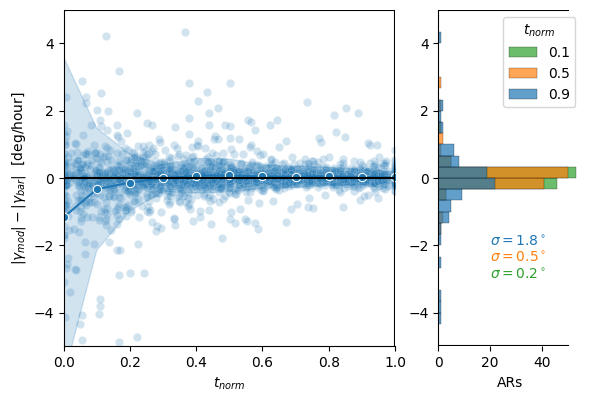

In [ ]:
DFx=DFx.assign(rot= lambda x: np.gradient(x.alpha,x.mag)/1.5)
DFx=DFx.assign(rotb= lambda x: np.gradient(x.alphab,x.mag)/1.5)

DFx2=DFx.assign(frac=lambda x: np.abs(x.rot)-np.abs(x.rotb))
DFx2=DFx2.assign(t_mean=lambda x: round(10*x.t_norm)/10)
#
#
#  Jointplot de seaborn con histograma extendido en marg_y
g = sns.jointplot(
    data=DFx2,
    x='t_norm',
    y='frac',
    kind='scatter',
    alpha=0.2,
    marginal_kws={'bins': 30, 'fill': True},ratio=2,height=6,space=0.3
)

DFx2=DFx2.groupby(['AR','t_mean']).mean().reset_index()
sns.lineplot(
data=DFx2,
x='t_mean',
y='frac',
ax=g.ax_joint,
estimator='mean',
errorbar='sd',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
err_style='band',   # o 'bars' para barras verticales
marker='o'          # opcional para marcar puntos medios
)

g.ax_marg_x.set_visible(False)
g.ax_marg_y.clear()
hist=sns.histplot(DFx2[DFx2['t_mean'].isin([0.1,0.5,0.9])],y='frac',
             hue='t_mean',palette=['tab:blue','tab:orange','tab:green'],
             alpha=0.7,ax=g.ax_marg_y,bins=30,binrange=(-5,5))

#g.ax_marg_y.legend()
g.ax_marg_y.legend(title=r'$t_{norm}$',labels=['0.1','0.5','0.9'],loc='upper right')
handles,labels=hist.get_legend_handles_labels()
g.ax_marg_y.set_ylabel('')
g.ax_marg_y.set_xlabel('ARs')
g.ax_joint.plot([0,1],[5,5],color='black')
g.ax_joint.plot([1,1],[-5,5],color='black')
g.ax_marg_y.plot([0,50],[-5,-5],color='black')
g.ax_marg_y.plot([0,50],[5,5],color='black')
#g.ax_marg_y.plot([50,50],[-5,5],color='black')


#g.ax_marg_y.legend(handles,['0.1','0.5','0.9'],title=r'$t_{norm}$')
g.ax_marg_y.set_ylim(-5, 5)
g.ax_joint.set_xlim(0, 1)
g.ax_joint.set_ylim(-5, 5)

stds=DFx2[DFx2['t_mean'].isin([0.1,0.5,0.9])].groupby('t_mean').std()['frac'].values

g.ax_marg_y.text(20,-2,rf'$\sigma=${stds[0]:.1f}$^\circ$',color='tab:blue')
g.ax_marg_y.text(20,-2.5,rf'$\sigma=${stds[1]:.1f}$^\circ$',color='tab:orange')
g.ax_marg_y.text(20,-3,rf'$\sigma=${stds[2]:.1f}$^\circ$',color='tab:green')

g.ax_joint.axhline(0,color='black')
g.set_axis_labels(r'$t_{norm}$', r'$|\gamma_{mod}| - |\gamma_{bar}|$  [deg/hour]')

plt.savefig('./plots/rotdifabs.pdf',dpi=300)


In [ ]:
stds[0][0]

IndexError: invalid index to scalar variable.

In [ ]:

DFx2=DFx.assign(frac=lambda x: 2*np.abs(x.alpha-x.alphab)/np.abs(x.alpha+x.alphab))
DFx2=DFx2.assign(t_mean=lambda x: round(10*x.t_norm)/10)


g=sns.scatterplot(data=DFx2,x='t_norm',y='frac',alpha=0.2)

DFx2=DFx2.groupby(['AR','t_mean']).mean().reset_index()
g=sns.lineplot(
data=DFx2,
x='t_mean',
y='frac',
estimator='mean',
errorbar='sd',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
err_style='band',   # o 'bars' para barras verticales
marker='o'          # opcional para marcar puntos medios
)
#   sns.lineplot(data=DFx2.groupby(['t_norm','variable']).median().reset_index(),x='t_norm',y='value',hue='variable')
plt.xlim(0,1)
plt.ylim(0,10)
'''
plt.xlim(0,1)
plt.ylim(-200,200)

plt.ylabel(r'$\alpha / \sin$(lat) [deg]')
plt.xlabel(r'$t_{norm}$')

plt.axhline(0,linestyle='dashed',color='gray')

plt.title(fr'Latitude range: {r[0]}$^\circ -$  {r[1]}$^\circ$')

handles, labels = g.get_legend_handles_labels()

#   plt.legend(title='',handles=handles,labels=labels[:2])

plt.legend(title='',handles=handles,labels=['Bayes','Barycenters'])
plt.show()

'''

# Define DFx1

In [51]:
DFx1=pd.melt(DFx,id_vars=['t_norm','lat','AR','fn','mag','flux','Nt'],value_vars=['alpha','alphab'])

In [ ]:
#DFx1=pd.concat([DFx1,DFx0b]).reset_index()

In [53]:
DFx1=DFx1.assign(t_mean=lambda x: round(10*x.t_norm)/10)

In [54]:
DFx1['sin_lat'] = np.sin(np.radians(np.abs(DFx1['lat'])))
DFx1['tilt_sinlat'] = DFx1['value'] / DFx1['sin_lat']

In [55]:
DFx1=DFx1.assign(tilt_norm=lambda x: x.value/np.sin(np.pi*np.abs(x.lat)/180))

In [56]:
DFx1 = DFx1[np.abs(DFx1['sin_lat']) > 0.05].copy()

In [57]:
DFx

AR      alpha     alphab    t_norm   lat        fn        Nt  \
0    8193  55.413941  17.580973  0.062133 -22.0  0.050234  0.468819   
1    8193  52.658806  17.694912  0.124657 -22.0  0.066990  0.468819   
2    8193  26.857078  15.790828  0.187182 -22.0  0.107903  0.468819   
3    8193  20.252607   9.252872  0.249706 -22.0  0.143195  0.468819   
4    8193  19.019187   9.131157  0.312231 -22.0  0.195707  0.468819   
..    ...        ...        ...       ...   ...       ...       ...   
15  10747  -2.532979  -2.883163  0.820466  -7.0  0.609831 -0.279194   
16  10747  -3.766676  -2.948410  0.865349  -7.0  0.715223 -0.279194   
17  10747  -8.162120  -3.470280  0.910233  -7.0  0.802347 -0.279194   
18  10747  -8.328748  -2.716777  0.955116  -7.0  0.911246 -0.279194   
19  10747  -3.312615  -1.507657  1.000000  -7.0  0.981142 -0.279194   

          sar      sepax   mag          flux      fint    d_norm  stp  \
0   27.404675   0.000000   0.0  5.281523e+20  0.050234  0.002347  4.0   
1   22.574678   0.000000   4.0  7.043322e+20  0.066990  0.052230  4.0   
2   24.657657   0.000000   8.0  1.134488e+21  0.107903  0.102112  4.0   
3   27.584949   0.000000  12.0  1.505539e+21  0.143195  0.151995  4.0   
4   30.701854   0.000000  16.0  2.057652e+21  0.195707  0.201877  4.0   
..        ...        ...   ...           ...       ...       ...  ...   
15  50.768554  63.871315  45.0  4.781975e+21  0.609831  0.789850  3.0   
16  50.178550  63.228762  48.0  5.608403e+21  0.715223  0.842388  3.0   
17  52.920804  60.286301  51.0  6.291583e+21  0.802347  0.894925  3.0   
18  55.223317  62.192506  54.0  7.145513e+21  0.911246  0.947463  3.0   
19  57.687773  64.157412  57.0  7.693606e+21  0.981142  1.000000  3.0   

      alphan   alphabn       rot      rotb   rot_cum   rotb_cum  
0   5.667052  1.973417 -0.459189  0.018990 -0.459189   0.018990  
1   5.385291  1.986206 -2.379739 -0.149179 -2.838928  -0.130189  
2   2.746610  1.772478 -2.700517 -0.703503 -5.539444  -0.833692  
3   2.071186  1.038610 -0.653158 -0.554973 -6.192602  -1.388665  
4   1.945047  1.024948 -0.149742  0.101909 -6.342343  -1.286756  
..       ...       ...       ...       ...       ...        ...  
15  0.764646  1.912347 -0.007561 -0.014032  3.290480  17.504384  
16  1.137070  1.955623 -0.625460 -0.065235  2.665020  17.439149  
17  2.463951  2.301770 -0.506897  0.025737  2.158123  17.464886  
18  2.514252  1.801986  0.538834  0.218069  2.696957  17.682955  
19  1.000000  1.000000  1.114696  0.268693  3.811653  17.951649  

[2845 rows x 20 columns]

# Filter ouliers

In [ ]:
list(set(DFx1.t_mean))[:10]

[0.0, 0.4, 0.3, 0.2, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [58]:
ARout=[]

for tt in list(set(DFx1.t_mean))[:10]:

    df=DFx1[(DFx1.variable=='alpha') & (DFx1.t_mean==tt)]
    dfar=df.groupby(['AR','variable']).mean().reset_index()
    # Median and MAD
    median_tilt_sinlat = dfar['tilt_sinlat'].median()
    mad_tilt_sinlat = np.median(np.abs(dfar['tilt_sinlat'] - median_tilt_sinlat))

    # Define threshold (e.g., 3 times MAD)
    threshold = 2
    modified_z_scores = 0.6745 * (dfar['tilt_sinlat'] - median_tilt_sinlat) / mad_tilt_sinlat

    # Filter out outliers
    dfar_clean = dfar[np.abs(modified_z_scores) >= threshold].copy()

    for names in dfar_clean.AR.values:
        ARout.append(names)

In [59]:
ARout=list(set(ARout))

In [60]:
len(ARout)

29

In [ ]:
DFmax

AR   mag        da     alpha        a          R        N0  \
0  11007  51.0  0.344326  55.61136  23.8077  38.899871  1.109657   

            axf         xc         yc  ...        sar  lead          flux  \
0  1.543287e+21  58.477746  27.657963  ...  35.406446     1  3.461158e+21   

          fluxp         fluxn      fint  lat  spt      rot      rotb  
0  3.131612e+21  3.790703e+21  0.998987   35    3  9.65277  1.013659  

[1 rows x 21 columns]

In [61]:
DFmax=DFx1.groupby(['AR','variable']).max().reset_index()
DFmax=DFmax.assign(heli=lambda x: np.abs(x.Nt)*x.flux**2)
DFmax['B_bin']=pd.qcut(DFmax['flux'],q=3,labels=['low','medium','high'])
DFmax['H_bin']=pd.qcut(DFmax['heli'],q=3,labels=['low','medium','high'])

#DFmax['B_bin'] = pd.cut(DFmax['flux'], bins=3, labels=['low', 'medium', 'high']) # for equal lenght bins
DFx1 = DFx1.merge(DFmax[['AR', 'variable', 'heli','B_bin','H_bin']], on=['AR', 'variable'], how='left')

<Axes: xlabel='B_bin', ylabel='flux'>

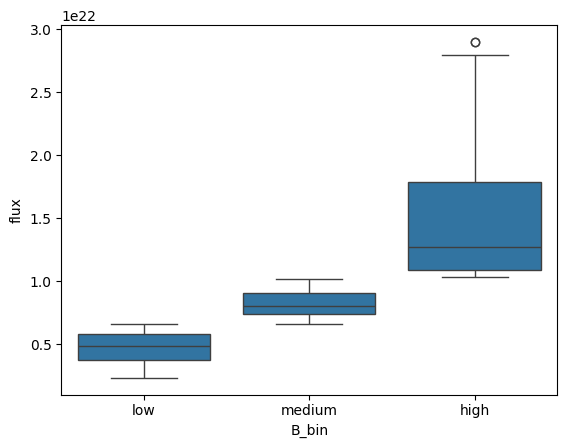

In [62]:
sns.boxplot(DFmax,x='B_bin',y='flux')

In [63]:
DFx1

t_norm   lat     AR        fn   mag          flux        Nt variable  \
0     0.062133 -22.0   8193  0.050234   0.0  5.281523e+20  0.468819    alpha   
1     0.124657 -22.0   8193  0.066990   4.0  7.043322e+20  0.468819    alpha   
2     0.187182 -22.0   8193  0.107903   8.0  1.134488e+21  0.468819    alpha   
3     0.249706 -22.0   8193  0.143195  12.0  1.505539e+21  0.468819    alpha   
4     0.312231 -22.0   8193  0.195707  16.0  2.057652e+21  0.468819    alpha   
...        ...   ...    ...       ...   ...           ...       ...      ...   
5685  0.820466  -7.0  10747  0.609831  45.0  4.781975e+21 -0.279194   alphab   
5686  0.865349  -7.0  10747  0.715223  48.0  5.608403e+21 -0.279194   alphab   
5687  0.910233  -7.0  10747  0.802347  51.0  6.291583e+21 -0.279194   alphab   
5688  0.955116  -7.0  10747  0.911246  54.0  7.145513e+21 -0.279194   alphab   
5689  1.000000  -7.0  10747  0.981142  57.0  7.693606e+21 -0.279194   alphab   

          value  t_mean   sin_lat  tilt_sinlat   tilt_norm          heli  \
0     55.413941     0.1  0.374607   147.925696  147.925696  5.128329e+43   
1     52.658806     0.1  0.374607   140.570953  140.570953  5.128329e+43   
2     26.857078     0.2  0.374607    71.694088   71.694088  5.128329e+43   
3     20.252607     0.2  0.374607    54.063670   54.063670  5.128329e+43   
4     19.019187     0.3  0.374607    50.771095   50.771095  5.128329e+43   
...         ...     ...       ...          ...         ...           ...   
5685  -2.883163     0.8  0.121869   -23.657822  -23.657822  1.640620e+43   
5686  -2.948410     0.9  0.121869   -24.193202  -24.193202  1.640620e+43   
5687  -3.470280     0.9  0.121869   -28.475415  -28.475415  1.640620e+43   
5688  -2.716777     1.0  0.121869   -22.292537  -22.292537  1.640620e+43   
5689  -1.507657     1.0  0.121869   -12.371095  -12.371095  1.640620e+43   

       B_bin   H_bin  
0       high    high  
1       high    high  
2       high    high  
3       high    high  
4       high    high  
...      ...     ...  
5685  medium  medium  
5686  medium  medium  
5687  medium  medium  
5688  medium  medium  
5689  medium  medium  

[5690 rows x 16 columns]

# Evolve plots

Perfecto, entiendo lo que querés hacer:

Tenés varias regiones activas (ARs).

Cada AR tiene distinta cantidad de puntos de tilt a lo largo de su emergencia (10, 30, etc.).

Querés comparar la evolución promedio del tilt en función de un eje temporal normalizado ($t_\mathrm{norm}$).

Para cada AR y cada bin en $t_\mathrm{norm}$, calculás el promedio y desvío estándar de sus mediciones.

Luego querés combinar todas las ARs en cada bin, pero de forma ponderada por los errores (el desvío estándar de cada AR).

La forma estándar de hacerlo es con un promedio ponderado por varianza (weighted mean):

Si en un bin tenés $N$ regiones, con tilt promedio $\alpha_i$ y error $\sigma_i$ (desvío estándar de esa AR en ese bin), la estadística global del tilt en ese bin se calcula como:


In [64]:
DFall = []

for r in [(0,39)]:
    DFx2 = DFx1[(np.abs(DFx1.lat) >= r[0]) & (np.abs(DFx1.lat) < r[1])]
    #DFx2 = DFx2[~DFx2['AR'].isin(ARout)].copy()

    # agrupás por AR en cada bin temporal
    DF_AR = (
        DFx2.groupby(['AR','variable','t_mean'])
        .agg(value_mean=('value','mean'),
             value_std=('value','std'),
             count=('value','count'))
        .reset_index()
    )

    # ahora promedio ponderado entre ARs por bin
    out = []
    for (var,t), g in DF_AR.groupby(['variable','t_mean']):
        # pesos = 1/sigma^2 (si sigma=NaN porque solo hay 1 punto, asignás sigma grande)
        sigma = g['value_std'].fillna(g['value_mean'].std() if len(g)>1 else 999)
        weights = 1 / (sigma**2)
        mean = np.average(g['value_mean'], weights=weights)
        err = np.sqrt(1/weights.sum())
        out.append([var, t, mean, err])

    DF_plot = pd.DataFrame(out, columns=['variable','t_mean','tilt','err'])
    DF_plot['lat_range'] = f"{r[0]}-{r[1]}"

    DFall.append(DF_plot)

DFall = pd.concat(DFall)

In [ ]:
DFx1[DFx1.AR==8193]

t_norm   lat    AR        fn   mag          flux        Nt variable  \
0     0.001103 -22.0  8193  0.050234   0.0  5.281523e+20  0.468819    alpha   
1     0.067696 -22.0  8193  0.066990   4.0  7.043322e+20  0.468819    alpha   
2     0.134289 -22.0  8193  0.107903   8.0  1.134488e+21  0.468819    alpha   
3     0.200882 -22.0  8193  0.143195  12.0  1.505539e+21  0.468819    alpha   
4     0.267475 -22.0  8193  0.195707  16.0  2.057652e+21  0.468819    alpha   
5     0.334069 -22.0  8193  0.303309  20.0  3.188966e+21  0.468819    alpha   
6     0.400662 -22.0  8193  0.448866  24.0  4.719346e+21  0.468819    alpha   
7     0.467255 -22.0  8193  0.590869  28.0  6.212348e+21  0.468819    alpha   
8     0.533848 -22.0  8193  0.705378  32.0  7.416293e+21  0.468819    alpha   
9     0.600441 -22.0  8193  0.765290  36.0  8.046197e+21  0.468819    alpha   
10    0.667034 -22.0  8193  0.851471  40.0  8.952305e+21  0.468819    alpha   
11    0.733627 -22.0  8193  0.922947  44.0  9.703800e+21  0.468819    alpha   
12    0.800221 -22.0  8193  0.976374  48.0  1.026552e+22  0.468819    alpha   
13    0.866814 -22.0  8193  0.993642  52.0  1.044708e+22  0.468819    alpha   
14    0.933407 -22.0  8193  0.991939  56.0  1.042917e+22  0.468819    alpha   
15    1.000000 -22.0  8193  0.994765  60.0  1.045889e+22  0.468819    alpha   
16    1.066593 -22.0  8193  0.972689  64.0  1.022678e+22  0.468819    alpha   
17    1.133186 -22.0  8193  0.952312  68.0  1.001254e+22  0.468819    alpha   
18    1.199779 -22.0  8193  0.926107  72.0  9.737016e+21  0.468819    alpha   
19    1.266373 -22.0  8193  0.891292  76.0  9.370976e+21  0.468819    alpha   
20    1.332966 -22.0  8193  0.860421  80.0  9.046402e+21  0.468819    alpha   
2845  0.001103 -22.0  8193  0.050234   0.0  5.281523e+20  0.468819   alphab   
2846  0.067696 -22.0  8193  0.066990   4.0  7.043322e+20  0.468819   alphab   
2847  0.134289 -22.0  8193  0.107903   8.0  1.134488e+21  0.468819   alphab   
2848  0.200882 -22.0  8193  0.143195  12.0  1.505539e+21  0.468819   alphab   
2849  0.267475 -22.0  8193  0.195707  16.0  2.057652e+21  0.468819   alphab   
2850  0.334069 -22.0  8193  0.303309  20.0  3.188966e+21  0.468819   alphab   
2851  0.400662 -22.0  8193  0.448866  24.0  4.719346e+21  0.468819   alphab   
2852  0.467255 -22.0  8193  0.590869  28.0  6.212348e+21  0.468819   alphab   
2853  0.533848 -22.0  8193  0.705378  32.0  7.416293e+21  0.468819   alphab   
2854  0.600441 -22.0  8193  0.765290  36.0  8.046197e+21  0.468819   alphab   
2855  0.667034 -22.0  8193  0.851471  40.0  8.952305e+21  0.468819   alphab   
2856  0.733627 -22.0  8193  0.922947  44.0  9.703800e+21  0.468819   alphab   
2857  0.800221 -22.0  8193  0.976374  48.0  1.026552e+22  0.468819   alphab   
2858  0.866814 -22.0  8193  0.993642  52.0  1.044708e+22  0.468819   alphab   
2859  0.933407 -22.0  8193  0.991939  56.0  1.042917e+22  0.468819   alphab   
2860  1.000000 -22.0  8193  0.994765  60.0  1.045889e+22  0.468819   alphab   
2861  1.066593 -22.0  8193  0.972689  64.0  1.022678e+22  0.468819   alphab   
2862  1.133186 -22.0  8193  0.952312  68.0  1.001254e+22  0.468819   alphab   
2863  1.199779 -22.0  8193  0.926107  72.0  9.737016e+21  0.468819   alphab   
2864  1.266373 -22.0  8193  0.891292  76.0  9.370976e+21  0.468819   alphab   
2865  1.332966 -22.0  8193  0.860421  80.0  9.046402e+21  0.468819   alphab   

          value  t_mean   sin_lat  tilt_sinlat   tilt_norm          heli  \
0     55.413941     0.0  0.374607   147.925696  147.925696  5.128329e+43   
1     52.658806     0.1  0.374607   140.570953  140.570953  5.128329e+43   
2     26.857078     0.1  0.374607    71.694088   71.694088  5.128329e+43   
3     20.252607     0.2  0.374607    54.063670   54.063670  5.128329e+43   
4     19.019187     0.3  0.374607    50.771095   50.771095  5.128329e+43   
5     18.455709     0.3  0.374607    49.266909   49.266909  5.128329e+43   
6     17.219136     0.4  0.374607    45.965917   45.965917  5.128329e+43   
7 

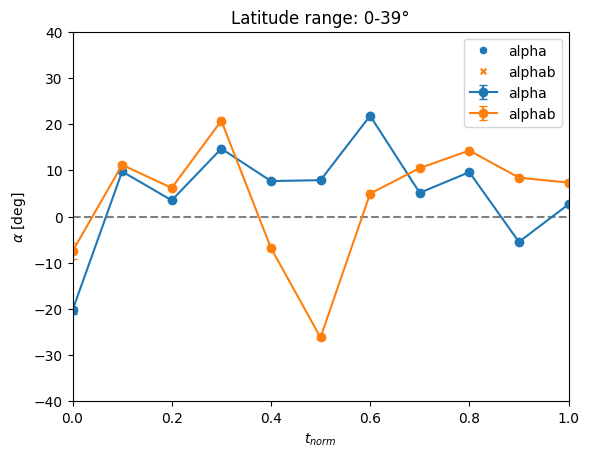

In [65]:

for r in DFall.lat_range.unique():
    g = sns.scatterplot(
        data=DFall[DFall.lat_range==r],
        x='t_mean', y='tilt',
        hue='variable', style='variable',
        marker='o'
    )

    for var,sub in DFall[DFall.lat_range==r].groupby('variable'):
        plt.errorbar(sub.t_mean, sub.tilt, yerr=sub.err,
                     fmt='o-', capsize=3, label=var)

    plt.axhline(0, linestyle='dashed', color='gray')
    plt.xlim(0,1)
    plt.ylim(-40,40)
    plt.ylabel(r'$\alpha$ [deg]')
    plt.xlabel(r'$t_{norm}$')
    plt.title(f'Latitude range: {r}°')

    plt.legend()
    plt.show()


range: (0, 39) / ARs: 108


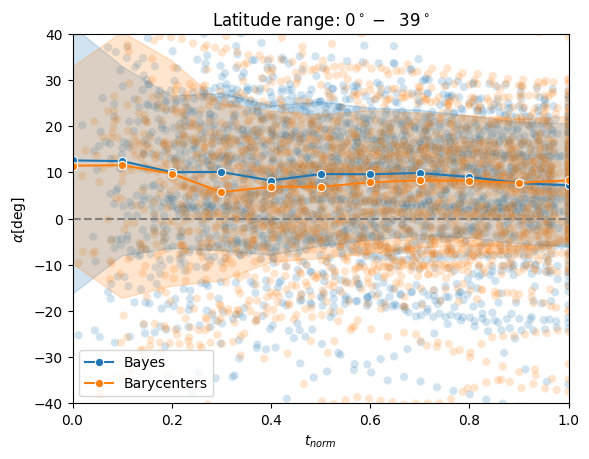

range: (15, 18) / ARs: 20


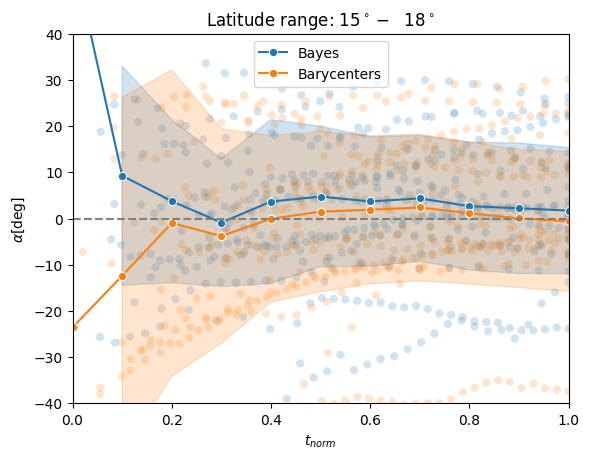

range: (18, 21) / ARs: 10


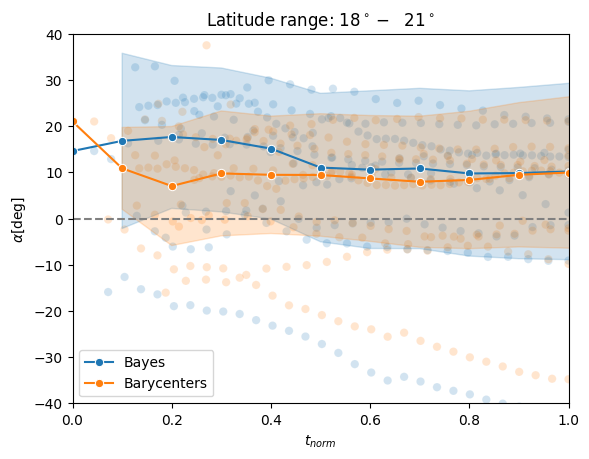

In [66]:
for r in [(0,39),(15,18),(18,21)]:
    DFx2=DFx1[(np.abs(DFx1.lat) >= r[0]) & (np.abs(DFx1.lat) < r[1])]

    #DFx2 = DFx2[~DFx2['AR'].isin(ARout)].copy()
    print(f'range: {r} / ARs: {len(set(DFx2.AR))}')

    g=sns.scatterplot(data=DFx2,x='t_norm',y='value',hue='variable',alpha=0.2)
    DFx2=DFx2.groupby(['AR','variable','t_mean']).mean(numeric_only=True).reset_index()
    g=sns.lineplot(
        data=DFx2,
        x='t_mean',
        y='value',
        hue='variable',
        estimator='median',
        errorbar='sd',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
        err_style='band',   # o 'bars' para barras verticales
        marker='o'          # opcional para marcar puntos medios
    )
 #   sns.lineplot(data=DFx2.groupby(['t_norm','variable']).median().reset_index(),x='t_norm',y='value',hue='variable')

    plt.xlim(0,1)
    plt.ylim(-40,40)

    plt.ylabel(r'$\alpha $[deg]')
    plt.xlabel(r'$t_{norm}$')

    plt.axhline(0,linestyle='dashed',color='gray')

    plt.title(fr'Latitude range: {r[0]}$^\circ -$  {r[1]}$^\circ$')

    handles, labels = g.get_legend_handles_labels()

 #   plt.legend(title='',handles=handles,labels=labels[:2])

    plt.legend(title='',handles=handles[2:4],labels=['Bayes','Barycenters'])
    plt.show()

B range: low / ARs: 36


/tmp/ipython-input-108952068.py:36: UserWarning: Mismatched number of handles and labels: len(handles) = 4 len(labels) = 2
  plt.legend(title='',handles=handles,labels=['Bayes','Barycenters'])


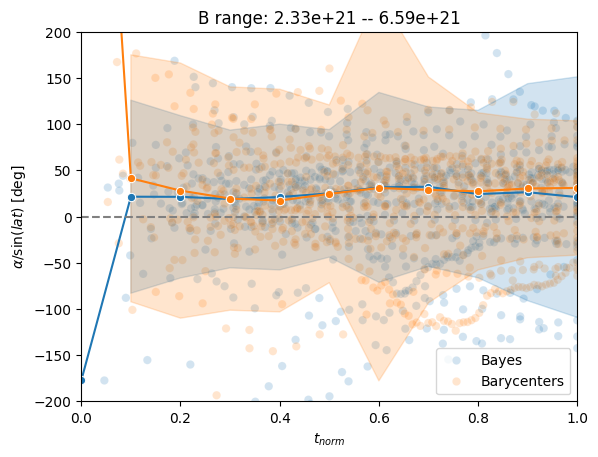

B range: medium / ARs: 36


/tmp/ipython-input-108952068.py:36: UserWarning: Mismatched number of handles and labels: len(handles) = 4 len(labels) = 2
  plt.legend(title='',handles=handles,labels=['Bayes','Barycenters'])


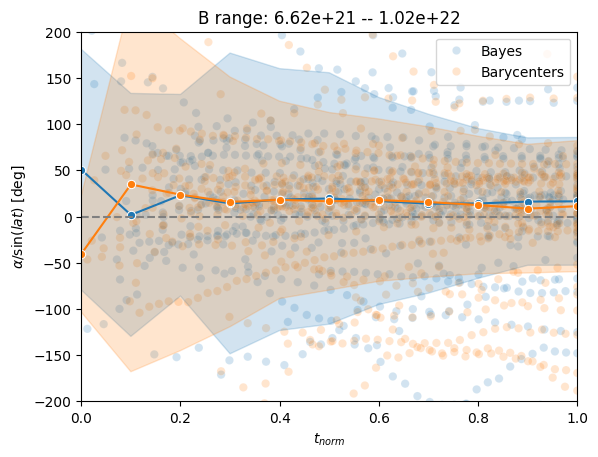

B range: high / ARs: 36


/tmp/ipython-input-108952068.py:36: UserWarning: Mismatched number of handles and labels: len(handles) = 4 len(labels) = 2
  plt.legend(title='',handles=handles,labels=['Bayes','Barycenters'])


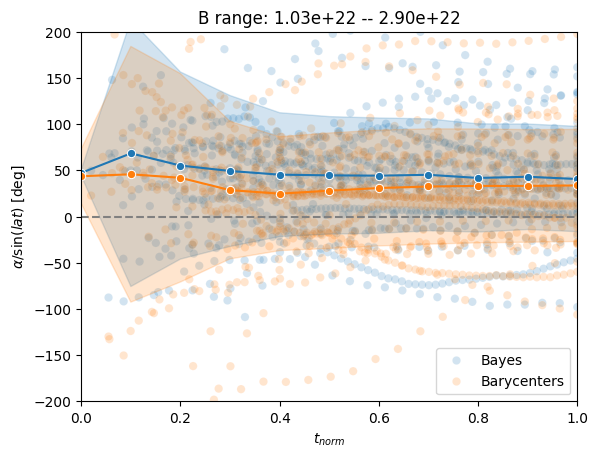

In [67]:
for r in ['low','medium','high']:
    DFx2=DFx1[DFx1.B_bin==r]

   # DFx2 = DFx2[~DFx2['AR'].isin(ARout)].copy()
    print(f'B range: {r} / ARs: {len(set(DFx2.AR))}')

    g=sns.scatterplot(data=DFx2,x='t_norm',y='tilt_sinlat',hue='variable',alpha=0.2)
    DFx2=DFx2.groupby(['AR','variable','t_mean']).mean(numeric_only=True).reset_index()
    g=sns.lineplot(
        data=DFx2,
        x='t_mean',
        y='tilt_sinlat',
        hue='variable',
        estimator='median',
        errorbar='sd',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
        err_style='band',   # o 'bars' para barras verticales
        marker='o'          # opcional para marcar puntos medios
    )
 #   sns.lineplot(data=DFx2.groupby(['t_norm','variable']).median().reset_index(),x='t_norm',y='value',hue='variable')

    plt.xlim(0,1)
    plt.ylim(-200,200)

    plt.ylabel(r'$\alpha / \sin(lat)$ [deg]')
    plt.xlabel(r'$t_{norm}$')

    plt.axhline(0,linestyle='dashed',color='gray')
    minf=DFmax[DFmax.B_bin==r]['flux'].min()
    maxf=DFmax[DFmax.B_bin==r]['flux'].max()
    plt.title(f'B range: {minf:.2e} -- {maxf:.2e}')

    handles, labels = g.get_legend_handles_labels()

 #   plt.legend(title='',handles=handles,labels=labels[:2])

    plt.legend(title='',handles=handles,labels=['Bayes','Barycenters'])
    plt.show()


In [ ]:
DFx2.groupby(['AR','variable','t_mean']).mean(numeric_only=True)

t_norm   lat        fn   mag          flux        Nt  \
AR    variable t_mean                                                           
8084  alpha    0.0     0.002999  21.0  0.085296   0.0  9.850904e+20 -0.630030   
               0.1     0.102699  21.0  0.114029   6.0  1.316941e+21 -0.630030   
               0.2     0.202399  21.0  0.141825  12.0  1.637958e+21 -0.630030   
               0.3     0.302099  21.0  0.197212  18.0  2.277627e+21 -0.630030   
               0.4     0.401799  21.0  0.288844  24.0  3.335898e+21 -0.630030   
...                         ...   ...       ...   ...           ...       ...   
11024 alphab   0.6     0.598497 -25.0  0.821287  24.5  6.073839e+21 -0.760674   
               0.7     0.695831 -25.0  0.889473  28.5  6.578112e+21 -0.760674   
               0.8     0.793165 -25.0  0.962731  32.5  7.119886e+21 -0.760674   
               0.9     0.890499 -25.0  0.981139  36.5  7.256022e+21 -0.760674   
               1.0     1.000000 -25.0  0.997494  41.0  7.376978e+21 -0.760674   

                           value   sin_lat  tilt_sinlat  tilt_norm  \
AR    variable t_mean                                                
8084  alpha    0.0     28.989361  0.358368    80.892728  80.892728   
               0.1     26.332326  0.358368    73.478463  73.478463   
               0.2     28.159338  0.358368    78.576609  78.576609   
               0.3     27.949065  0.358368    77.989856  77.989856   
               0.4     30.825659  0.358368    86.016786  86.016786   
...                          ...       ...          ...        ...   
11024 alphab   0.6     28.099592  0.422618    66.489299  66.489299   
               0.7     25.695267  0.422618    60.800183  60.800183   
               0.8     24.420622  0.422618    57.784114  57.784114   
               0.9     24.013231  0.422618    56.820144  56.820144   
               1.0     24.059044  0.422618    56.928547  56.928547   

                               heli  
AR    variable t_mean                
8084  alpha    0.0     8.402963e+43  
               0.1     8.402963e+43  
               0.2     8.402963e+43  
               0.3     8.402963e+43  
               0.4     8.402963e+43  
...                             ...  
11024 alphab   0.6     4.160401e+43  
               0.7     4.160401e+43  
               0.8     4.160401e+43  
               0.9     4.160401e+43  
               1.0     4.160401e+43  

[828 rows x 11 columns]

B range: low / ARs: 36


/tmp/ipython-input-3443406575.py:36: UserWarning: Mismatched number of handles and labels: len(handles) = 4 len(labels) = 2
  plt.legend(title='',handles=handles,labels=['Bayes','Barycenters'])


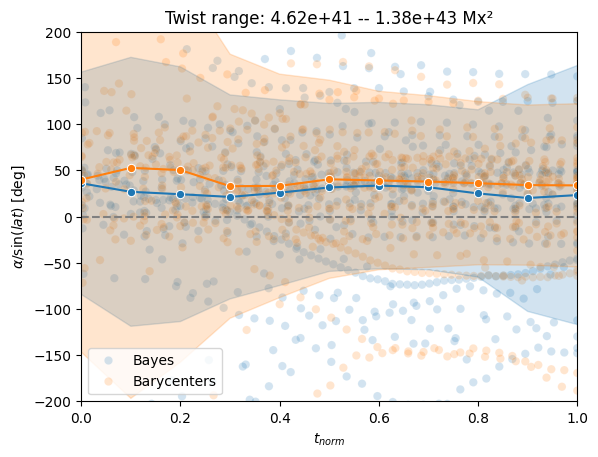

B range: medium / ARs: 36


/tmp/ipython-input-3443406575.py:36: UserWarning: Mismatched number of handles and labels: len(handles) = 4 len(labels) = 2
  plt.legend(title='',handles=handles,labels=['Bayes','Barycenters'])


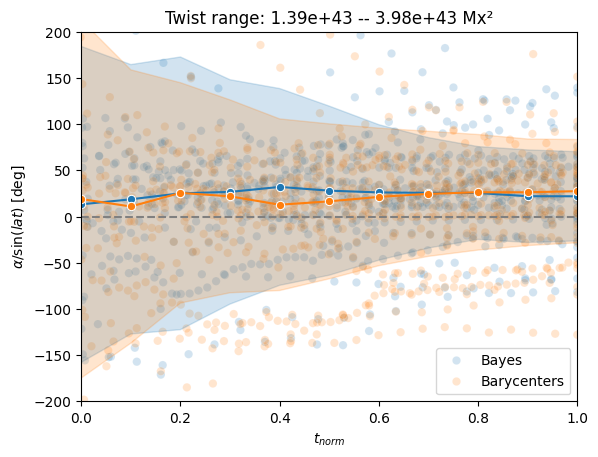

B range: high / ARs: 36


/tmp/ipython-input-3443406575.py:36: UserWarning: Mismatched number of handles and labels: len(handles) = 4 len(labels) = 2
  plt.legend(title='',handles=handles,labels=['Bayes','Barycenters'])


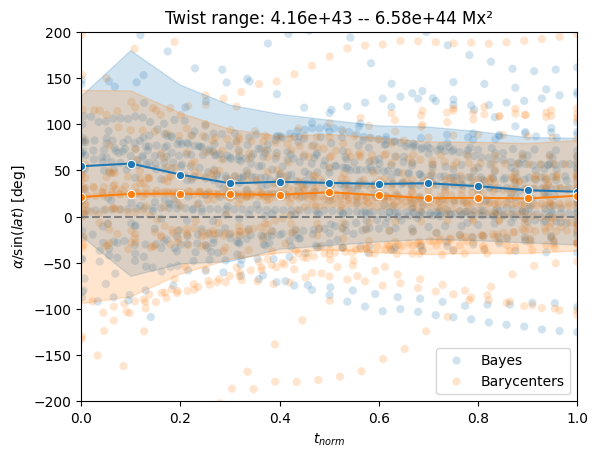

In [ ]:
for r in ['low','medium','high']:
    DFx2=DFx1[DFx1.H_bin==r]

   # DFx2 = DFx2[~DFx2['AR'].isin(ARout)].copy()
    print(f'B range: {r} / ARs: {len(set(DFx2.AR))}')

    g=sns.scatterplot(data=DFx2,x='t_norm',y='tilt_sinlat',hue='variable',alpha=0.2)
    DFx2=DFx2.groupby(['AR','variable','t_mean']).median(numeric_only=True).reset_index()
    g=sns.lineplot(
        data=DFx2,
        x='t_mean',
        y='tilt_sinlat',
        hue='variable',
        estimator='median',
        errorbar='sd',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
        err_style='band',   # o 'bars' para barras verticales
        marker='o'          # opcional para marcar puntos medios
    )
 #   sns.lineplot(data=DFx2.groupby(['t_norm','variable']).median().reset_index(),x='t_norm',y='value',hue='variable')

    plt.xlim(0,1)
    plt.ylim(-200,200)

    plt.ylabel(r'$\alpha / \sin(lat)$ [deg]')
    plt.xlabel(r'$t_{norm}$')

    plt.axhline(0,linestyle='dashed',color='gray')
    minf=DFmax[DFmax.H_bin==r]['heli'].min()
    maxf=DFmax[DFmax.H_bin==r]['heli'].max()
    plt.title(f'Twist range: {minf:.2e} -- {maxf:.2e} Mx²')

    handles, labels = g.get_legend_handles_labels()

 #   plt.legend(title='',handles=handles,labels=labels[:2])

    plt.legend(title='',handles=handles,labels=['Bayes','Barycenters'])
    plt.show()


range: (0, 39) / ARs: 79


TypeError: category dtype does not support aggregation 'median'

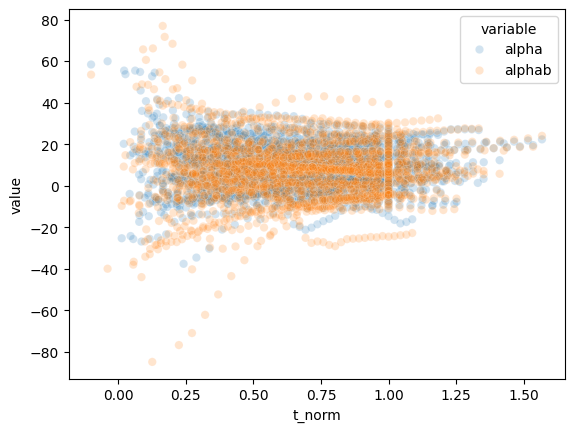

In [68]:
for r in [(0,39),(0,10),(10,15),(15,20),(20,25),(25,39)]:
    DFx2=DFx1[(np.abs(DFx1.lat) >= r[0]) & (np.abs(DFx1.lat) < r[1])]

    DFx2 = DFx2[~DFx2['AR'].isin(ARout)].copy()
    print(f'range: {r} / ARs: {len(set(DFx2.AR))}')

    g=sns.scatterplot(data=DFx2,x='t_norm',y='value',hue='variable',alpha=0.2)
    DFx2=DFx2.groupby(['AR','variable','t_mean']).median().reset_index()
    g=sns.lineplot(
        data=DFx2,
        x='t_mean',
        y='value',
        hue='variable',
        estimator='median',
        errorbar='sd',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
        err_style='band',   # o 'bars' para barras verticales
        marker='o'          # opcional para marcar puntos medios
    )
 #   sns.lineplot(data=DFx2.groupby(['t_norm','variable']).median().reset_index(),x='t_norm',y='value',hue='variable')

    plt.xlim(0,1)
    plt.ylim(-40,40)

    plt.ylabel(r'$\alpha$ [deg]')
    plt.xlabel(r'$t_{norm}$')

    plt.axhline(0,linestyle='dashed',color='gray')

    plt.title(fr'Latitude range: {r[0]}$^\circ -$  {r[1]}$^\circ$')

    handles, labels = g.get_legend_handles_labels()

 #   plt.legend(title='',handles=handles,labels=labels[:2])

    plt.legend(title='',handles=handles,labels=['Bayes','Barycenters'])
    plt.show()

In [ ]:
for r in [(0,36),(0,10),(10,15),(15,20),(20,25),(25,36)]:

  #  resar=list(set(DF[DF.N0.abs()>0.6].AR.values))
    #resar=list(set(DF.AR.values))
    DFmax=DF.groupby('AR').max().reset_index()
    resar=list(set(DFmax[DFmax.flux>DFmax.flux.median()].AR.values))
    DFx2=DFx1[(np.abs(DFx1.lat) >= r[0]) & (np.abs(DFx1.lat) < r[1]) & (DFx1['AR'].isin(resar))]
    print(f'range: {r} / ARs: {len(set(DFx2.AR))}')

    g=sns.scatterplot(data=DFx2,x='t_norm',y='value',hue='variable',alpha=0.2)
    DFx2=DFx2.groupby(['AR','variable','t_mean']).mean().reset_index()
    g=sns.lineplot(
        data=DFx2,
        x='t_mean',
        y='value',
        hue='variable',
        estimator='median',
        errorbar='sd',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
        err_style='band',   # o 'bars' para barras verticales
        marker='o'          # opcional para marcar puntos medios
    )
 #   sns.lineplot(data=DFx2.groupby(['t_norm','variable']).median().reset_index(),x='t_norm',y='value',hue='variable')

    plt.xlim(0,1)
    plt.ylim(-40,40)

    plt.ylabel(r'$\alpha$ [deg]')
    plt.xlabel(r'$t_{norm}$')

    plt.axhline(0,linestyle='dashed',color='gray')

    plt.title(fr'Latitude range: {r[0]}$^\circ -$  {r[1]}$^\circ$')

    handles, labels = g.get_legend_handles_labels()

 #   plt.legend(title='',handles=handles,labels=labels[:2])

    plt.legend(title='',handles=handles,labels=['Bayes','Barycenters'])
    plt.show()

In [ ]:
DFx1

t_norm   lat     AR        fn   mag          flux variable      value  \
0     0.001103 -22.0   8193  0.050234   0.0  5.281523e+20    alpha  55.413941   
1     0.067696 -22.0   8193  0.066990   4.0  7.043322e+20    alpha  52.658806   
2     0.134289 -22.0   8193  0.107903   8.0  1.134488e+21    alpha  26.857078   
3     0.200882 -22.0   8193  0.143195  12.0  1.505539e+21    alpha  20.252607   
4     0.267475 -22.0   8193  0.195707  16.0  2.057652e+21    alpha  19.019187   
...        ...   ...    ...       ...   ...           ...      ...        ...   
5685  0.790109  -7.0  10747  0.609831  45.0  4.781975e+21   alphab  -2.883163   
5686  0.842582  -7.0  10747  0.715223  48.0  5.608403e+21   alphab  -2.948410   
5687  0.895055  -7.0  10747  0.802347  51.0  6.291583e+21   alphab  -3.470280   
5688  0.947527  -7.0  10747  0.911246  54.0  7.145513e+21   alphab  -2.716777   
5689  1.000000  -7.0  10747  0.981142  57.0  7.693606e+21   alphab  -1.507657   

      t_mean   sin_lat  tilt_sinlat   tilt_norm   B_bin  
0        0.0  0.374607   147.925696  147.925696    high  
1        0.1  0.374607   140.570953  140.570953    high  
2        0.1  0.374607    71.694088   71.694088    high  
3        0.2  0.374607    54.063670   54.063670    high  
4        0.3  0.374607    50.771095   50.771095    high  
...      ...       ...          ...         ...     ...  
5685     0.8  0.121869   -23.657822  -23.657822  medium  
5686     0.8  0.121869   -24.193202  -24.193202  medium  
5687     0.9  0.121869   -28.475415  -28.475415  medium  
5688     0.9  0.121869   -22.292537  -22.292537  medium  
5689     1.0  0.121869   -12.371095  -12.371095  medium  

[5690 rows x 13 columns]

# Joy Plots

In [69]:
len(set(df_int.AR.values))

NameError: name 'df_int' is not defined

/tmp/ipython-input-442282558.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_int['lat'] = df_int['lat'].apply(lambda x: np.abs(x))


alpha--> R2: 0.03, RMSE: 223.36, p-val:0.0000, r:0.20
alphab--> R2: 0.04, RMSE: 278.57, p-val:0.0000, r:0.23


/tmp/ipython-input-442282558.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_int['lat'] = df_int['lat'].apply(lambda x: np.abs(x))


alpha--> R2: 0.04, RMSE: 164.57, p-val:0.0000, r:0.25
alphab--> R2: 0.06, RMSE: 174.28, p-val:0.0000, r:0.28


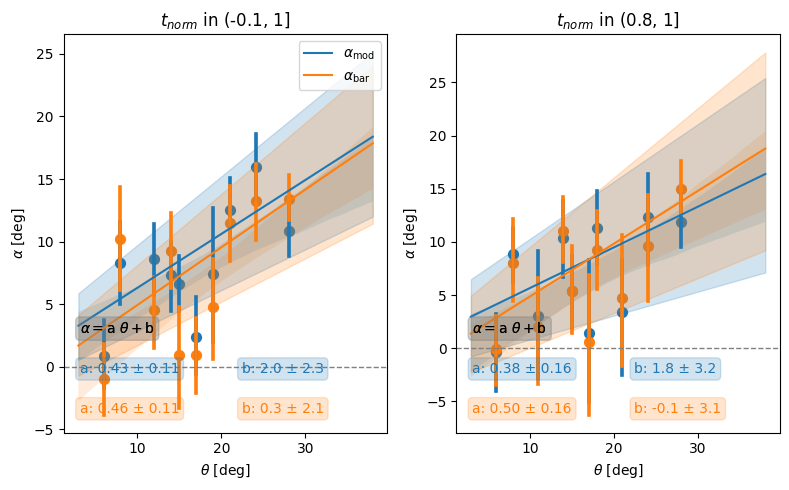

In [70]:
import numpy as np
import scipy.stats
from sklearn.metrics import r2_score, mean_squared_error


ftsz=10

def theil_sen_ci(x, y, n_boot=1000, ci=95):
    slopes = []
    intercepts = []
    rng = np.random.default_rng()
    for _ in range(n_boot):
        idx = rng.choice(len(x), len(x), replace=True)
        try:
            res = scipy.stats.theilslopes(y[idx], x[idx])
            slopes.append(res[0])
            intercepts.append(res[1])
        except Exception:
            continue
    lower = (100 - ci) / 2
    upper = 100 - lower
    slope_ci = np.percentile(slopes, [lower, upper])
    intercept_ci = np.percentile(intercepts, [lower, upper])
    return np.mean(slopes), np.mean(intercepts), slope_ci, intercept_ci

fig, axs = plt.subplots(1, 2, figsize=(8, 5)) # sharex=True, sharey=True)
axs = axs.ravel()
intervals = [(-0.1, 1), (0.8, 1)]

#DFxx = DFx1[~DFx1['AR'].isin(ARout)]
DFxx=DFx1

for i, (low, high) in enumerate(intervals):
    df_int = DFxx[(DFxx['t_norm'] > low) & (DFxx['t_norm'] <= high)]
    df_int['lat'] = df_int['lat'].apply(lambda x: np.abs(x))
    df_plot = df_int.groupby(['AR', 'variable','t_mean']).mean(numeric_only=True).reset_index()
    #sns.scatterplot(data=df_plot, x='lat', y='value', hue='variable', alpha=0.5, ax=axs[i])
    sns.regplot(data=df_plot[df_plot.variable=='alpha'], x='lat', y='value', x_bins=10,color='tab:blue', line_kws={'alpha':0.0},ax=axs[i])
    sns.regplot(data=df_plot[df_plot.variable=='alphab'], x='lat', y='value', x_bins=10,color='tab:orange', line_kws={'alpha':0.0},ax=axs[i])

    for var, color in zip(['alpha', 'alphab'], ['tab:blue', 'tab:orange']):
        dfv = df_plot[df_plot['variable'] == var]
        if len(dfv) > 1:
            slope, intercept, slope_ci, intercept_ci = theil_sen_ci(dfv['lat'].values, dfv['value'].values)
            x_fit = np.linspace(dfv['lat'].min(), dfv['lat'].max(), 100)
            y_fit = intercept + slope * x_fit
            y_fit_lower = intercept_ci[0] + slope_ci[0] * x_fit
            y_fit_upper = intercept_ci[1] + slope_ci[1] * x_fit
            axs[i].plot(x_fit, y_fit, color=color, label=f'Theil-Sen')
            axs[i].fill_between(x_fit, y_fit_lower, y_fit_upper, color=color, alpha=0.2)
            axs[i].text(
                0.05, 0.15 if var == 'alpha' else 0.05,
                f"a: {slope:.2f} ± {((slope_ci[1]-slope_ci[0])/2):.2f}",
                color=color,
                transform=axs[i].transAxes,
                fontsize=10,
                bbox=dict(boxstyle="round", alpha=0.2, color=color)
            )

            axs[i].text(
                0.55, 0.15 if var == 'alpha' else 0.05,
                f"b: {intercept:.1f} ± {((intercept_ci[1]-intercept_ci[0])/2):.1f}",
                color=color,
                transform=axs[i].transAxes,
                fontsize=10,
                bbox=dict(boxstyle="round", alpha=0.2, color=color)
            )

            axs[i].text(
                0.05, 0.25 ,
                r"$\alpha = \mathrm{a}~\theta +\mathrm{b}$",
                color='black',
                transform=axs[i].transAxes,
                fontsize=10,
                bbox=dict(boxstyle="round", alpha=0.2, color='gray')
            )

            y_true = dfv['value'].values
            y_pred = intercept + slope * dfv['lat'].values
            r2 = r2_score(y_true, y_pred)
            rmse = mean_squared_error(y_true, y_pred)
            slope, intercept, r_value, p_value, std_err = stats.linregress(dfv['lat'].values, dfv['value'].values)
            print(f'{var}--> R2: {r2:.2f}, RMSE: {rmse:.2f}, p-val:{p_value:.4f}, r:{r_value:.2f}')

    axs[i].tick_params(axis='both', labelsize=ftsz)  # Set y-ticklabel fontsize
    #g.ax_marg_y.tick_params(axis='x', labelsize=10)  # Set x-ticklabel fontsize (if needed)

    if i != 0:
        axs[i].legend().remove()
    axs[i].set_title(f"$t_{{norm}}$ in ({low}, {high}]")
    axs[i].axhline(0, color='gray', linestyle='dashed', linewidth=1)
    axs[i].set_xlabel(r'$\theta$ [deg]',fontsize=ftsz)
    axs[i].set_ylabel(r'$\alpha$ [deg]',fontsize=ftsz)




handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles, labels=[r'$\alpha_\mathrm{mod}$', r'$\alpha_\mathrm{bar}$'], title='', loc='upper right')
#plt.ylim(-20,60)
plt.tight_layout()
#plt.savefig('./plots/joyplot.pdf',dpi=300)
plt.show()

/tmp/ipython-input-4282423349.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_int['lat'] = df_int['lat'].apply(lambda x: np.abs(x))
/tmp/ipython-input-4282423349.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_int['lat'] = df_int['lat'].apply(lambda x: np.abs(x))


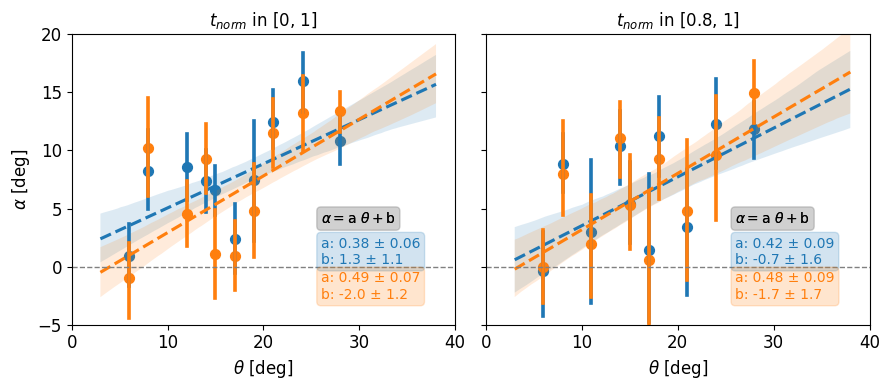

In [71]:
ftsz=12

fig, axs = plt.subplots(1, 2, figsize=(9, 4),sharey=True) # sharex=True, sharey=True)
axs = axs.ravel()
intervals = [(0, 1), (0.8, 1)]

#DFxx = DFx1[~DFx1['AR'].isin(ARout)]
DFxx=DFx1

for i, (low, high) in enumerate(intervals):
    df_int = DFxx[(DFxx['t_norm'] >= low) & (DFxx['t_norm'] <= high)]
    df_int['lat'] = df_int['lat'].apply(lambda x: np.abs(x))
    df_plot = df_int.groupby(['AR', 'variable','t_mean']).mean(numeric_only=True).reset_index()
    #sns.scatterplot(data=df_plot, x='lat', y='value', hue='variable', alpha=0.5, ax=axs[i])
    sns.regplot(data=df_plot[df_plot.variable=='alpha'], x='lat', y='value', x_bins=10,color='tab:blue',
                #line_kws={'color':'red'},
                line_kws={'linestyle':'dashed'},
                ax=axs[i],label=r'$\alpha_\mathrm{mod}$')
    sns.regplot(data=df_plot[df_plot.variable=='alphab'], x='lat', y='value', x_bins=10,color='tab:orange',
                #line_kws={'color':'green'},
                line_kws={'linestyle':'dashed'},
                ax=axs[i],label=r'$\alpha_\mathrm{bar}$')

    axs[i].set_ylim(-5,20)
    axs[i].set_xlim(0,40)
    axs[i].tick_params(axis='both',labelsize=ftsz)

    axs[i].set_title(f"$t_{{norm}}$ in [{low}, {high}]")
    axs[i].axhline(0, color='gray', linestyle='dashed', linewidth=1)
    axs[i].set_xlabel(r'$\theta$ [deg]',fontsize=ftsz)
    if i==0:
        axs[i].set_ylabel(r'$\alpha$ [deg]',fontsize=ftsz)
    else:
        axs[i].set_ylabel('')

    for var, color in zip(['alpha', 'alphab'], ['tab:blue', 'tab:orange']):
      dfv = df_plot[df_plot['variable'] == var]
      res = stats.linregress(dfv['lat'].values, dfv['value'].values)

      axs[i].text(
          0.65, 0.21 if var == 'alpha' else 0.09,
          f"a: {res.slope:.2f} ± {res.stderr:.2f}\nb: {res.intercept:.1f} ± {res.intercept_stderr:.1f}",
          color=color,
          transform=axs[i].transAxes,
          fontsize=10,
          bbox=dict(boxstyle="round", alpha=0.2, color=color)
      )

   #   axs[i].text(
   #       0.75, 0.25 if var == 'alpha' else 0.15,
   #       f"b: {res.intercept:.1f} ± {res.intercept_stderr:.1f}",
   #       color=color,
   #       transform=axs[i].transAxes,
   #       fontsize=10,
   #       bbox=dict(boxstyle="round", alpha=0.2, color=color)
   #   )

      axs[i].text(
          0.65, 0.35 ,
          r"$\alpha = \mathrm{a}~\theta +\mathrm{b}$",
          color='black',
          transform=axs[i].transAxes,
          fontsize=10,
          bbox=dict(boxstyle="round", alpha=0.2, color='gray')
      )

plt.tight_layout()
#plt.savefig('./plots/joyplot-B.pdf',dpi=300)
plt.show()


In [ ]:
DFx1.flux

0       5.281523e+20
1       7.043322e+20
2       1.134488e+21
3       1.505539e+21
4       2.057652e+21
            ...     
5685    4.781975e+21
5686    5.608403e+21
5687    6.291583e+21
5688    7.145513e+21
5689    7.693606e+21
Name: flux, Length: 5690, dtype: float64

<>:80: SyntaxWarning: invalid escape sequence '\P'
<>:80: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipython-input-838032452.py:80: SyntaxWarning: invalid escape sequence '\P'
  axs[i].set_title(f"$\Phi_\mathrm{{max}}$ in [{df_int[df_int.t_mean==1].flux.min():.2e}, {df_int[df_int.t_mean==1].flux.max():.2e}] Mx")


alpha--> R2: 0.03, RMSE: 136.79, p-val:0.0000
alphab--> R2: 0.06, RMSE: 221.39, p-val:0.0000


AttributeError: 'DataFrame' object has no attribute 'B_bin'

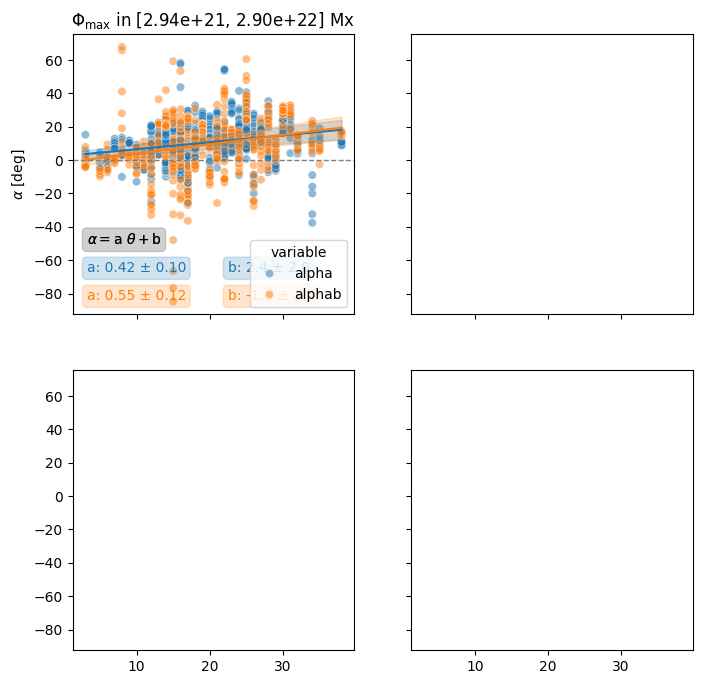

In [72]:
import numpy as np
import scipy.stats
from sklearn.metrics import r2_score, mean_squared_error

def theil_sen_ci(x, y, n_boot=1000, ci=95):
    slopes = []
    intercepts = []
    rng = np.random.default_rng()
    for _ in range(n_boot):
        idx = rng.choice(len(x), len(x), replace=True)
        try:
            res = scipy.stats.theilslopes(y[idx], x[idx])
            slopes.append(res[0])
            intercepts.append(res[1])
        except Exception:
            continue
    lower = (100 - ci) / 2
    upper = 100 - lower
    slope_ci = np.percentile(slopes, [lower, upper])
    intercept_ci = np.percentile(intercepts, [lower, upper])
    return np.mean(slopes), np.mean(intercepts), slope_ci, intercept_ci

fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
axs = axs.ravel()
intervals = ['all','high', 'medium', 'low']

DFxx = DFx1[~DFx1['AR'].isin(ARout)]
DFxx=DFxx[DFxx.t_mean <= 1]
DFmax=DFxx.groupby(['AR','variable']).max().reset_index()
DFmax['B_bin']=pd.qcut(DFmax['flux'],q=3,labels=['low','medium','high'])
#DFmax['B_bin'] = pd.cut(DFmax['flux'], bins=3, labels=['low', 'medium', 'high']) # for equal lenght bins
DFxx = DFxx.merge(DFmax[['AR', 'variable', 'B_bin']], on=['AR', 'variable'], how='left')


for i, bb in enumerate(intervals):
    if bb == 'all':
        df_int = DFxx
    else:
        df_int = DFxx[DFxx.B_bin==bb]
    df_int['lat'] = df_int['lat'].apply(lambda x: np.abs(x))
    df_plot = df_int.groupby(['AR', 'variable','t_mean']).mean(numeric_only=True).reset_index()
    sns.scatterplot(data=df_plot, x='lat', y='value', hue='variable', alpha=0.5, ax=axs[i])

    for var, color in zip(['alpha', 'alphab'], ['tab:blue', 'tab:orange']):
        dfv = df_plot[df_plot['variable'] == var]
        if len(dfv) > 1:
            slope, intercept, slope_ci, intercept_ci = theil_sen_ci(dfv['lat'].values, dfv['value'].values)
            x_fit = np.linspace(dfv['lat'].min(), dfv['lat'].max(), 100)
            y_fit = intercept + slope * x_fit
            y_fit_lower = intercept_ci[0] + slope_ci[0] * x_fit
            y_fit_upper = intercept_ci[1] + slope_ci[1] * x_fit
            axs[i].plot(x_fit, y_fit, color=color, label=f'Theil-Sen')
            axs[i].fill_between(x_fit, y_fit_lower, y_fit_upper, color=color, alpha=0.2)
            axs[i].text(
                0.05, 0.15 if var == 'alpha' else 0.05,
                f"a: {slope:.2f} ± {((slope_ci[1]-slope_ci[0])/2):.2f}",
                color=color,
                transform=axs[i].transAxes,
                fontsize=10,
                bbox=dict(boxstyle="round", alpha=0.2, color=color)
            )

            axs[i].text(
                0.55, 0.15 if var == 'alpha' else 0.05,
                f"b: {intercept:.1f} ± {((intercept_ci[1]-intercept_ci[0])/2):.1f}",
                color=color,
                transform=axs[i].transAxes,
                fontsize=10,
                bbox=dict(boxstyle="round", alpha=0.2, color=color)
            )

            axs[i].text(
                0.05, 0.25 ,
                r"$\alpha = \mathrm{a}~\theta +\mathrm{b}$",
                color='black',
                transform=axs[i].transAxes,
                fontsize=10,
                bbox=dict(boxstyle="round", alpha=0.2, color='gray')
            )
            axs[i].set_title(f"$\Phi_\mathrm{{max}}$ in [{df_int[df_int.t_mean==1].flux.min():.2e}, {df_int[df_int.t_mean==1].flux.max():.2e}] Mx")

            y_true = dfv['value'].values
            y_pred = intercept + slope * dfv['lat'].values
            r2 = r2_score(y_true, y_pred)
            rmse = mean_squared_error(y_true, y_pred)
            slope, intercept, r_value, p_value, std_err = stats.linregress(dfv['lat'].values, dfv['value'].values)
            print(f'{var}--> R2: {r2:.2f}, RMSE: {rmse:.2f}, p-val:{p_value:.4f}')



    if i != 0:
        axs[i].legend().remove()

    axs[i].axhline(0, color='gray', linestyle='dashed', linewidth=1)
    axs[i].set_xlabel(r'$\theta$ [deg]')
    axs[i].set_ylabel(r'$\alpha$ [deg]')

handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles, labels=[r'$\alpha_\mathrm{mod}$', r'$\alpha_\mathrm{bar}$'], title='', loc='upper right')
#plt.ylim(-20,60)
plt.savefig('./plots/joyplot-B.pdf',dpi=300)
plt.show()

In [ ]:
len(df_int.AR.unique())

26

/tmp/ipython-input-2386898703.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_int['lat'] = df_int['sin_lat'].apply(lambda x: np.abs(x))


alpha--> R2: -0.02, RMSE: 260.39
alphab--> R2: -0.00, RMSE: 479.86


/tmp/ipython-input-2386898703.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_int['lat'] = df_int['sin_lat'].apply(lambda x: np.abs(x))


alpha--> R2: 0.03, RMSE: 122.83
alphab--> R2: 0.07, RMSE: 211.12


/tmp/ipython-input-2386898703.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_int['lat'] = df_int['sin_lat'].apply(lambda x: np.abs(x))


alpha--> R2: 0.05, RMSE: 95.90
alphab--> R2: 0.11, RMSE: 133.51


/tmp/ipython-input-2386898703.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_int['lat'] = df_int['sin_lat'].apply(lambda x: np.abs(x))


alpha--> R2: 0.07, RMSE: 86.83
alphab--> R2: 0.11, RMSE: 123.29


/tmp/ipython-input-2386898703.py:88: UserWarning: Mismatched number of handles and labels: len(handles) = 4 len(labels) = 2
  axs[0].legend(handles=handles, labels=[r'$\alpha_\mathrm{mod}$', r'$\alpha_\mathrm{bar}$'], title='', loc='upper right')


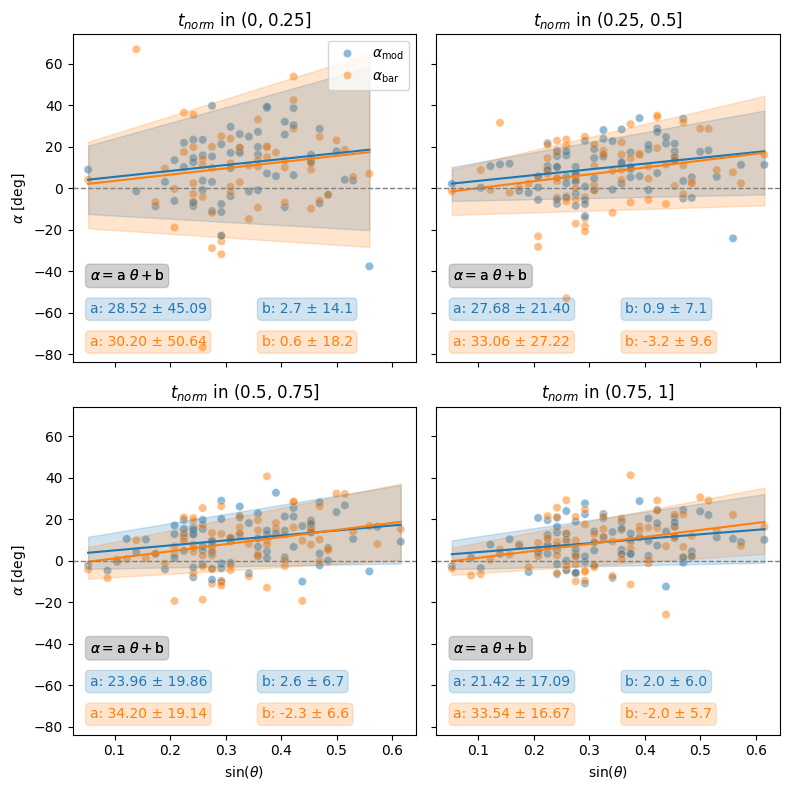

In [73]:
import numpy as np
import scipy.stats
from sklearn.metrics import r2_score, mean_squared_error

def theil_sen_ci(x, y, n_boot=1000, ci=95):
    slopes = []
    intercepts = []
    rng = np.random.default_rng()
    for _ in range(n_boot):
        idx = rng.choice(len(x), len(x), replace=True)
        try:
            res = scipy.stats.theilslopes(y[idx], x[idx])
            slopes.append(res[0])
            intercepts.append(res[1])
        except Exception:
            continue
    lower = (100 - ci) / 2
    upper = 100 - lower
    slope_ci = np.percentile(slopes, [lower, upper])
    intercept_ci = np.percentile(intercepts, [lower, upper])
    return np.mean(slopes), np.mean(intercepts), slope_ci, intercept_ci

fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
axs = axs.ravel()
intervals = [(0, 0.25), (0.25, 0.5), (0.5, 0.75), (0.75, 1)]

DFxx = DFx1[~DFx1['AR'].isin(ARout)]

for i, (low, high) in enumerate(intervals):
    df_int = DFxx[(DFxx['t_norm'] > low) & (DFxx['t_norm'] <= high)]
    df_int['lat'] = df_int['sin_lat'].apply(lambda x: np.abs(x))
    df_plot = df_int.groupby(['AR', 'variable']).mean(numeric_only=True).reset_index()
    sns.scatterplot(data=df_plot, x='sin_lat', y='value', hue='variable', alpha=0.5, ax=axs[i])

    for var, color in zip(['alpha', 'alphab'], ['tab:blue', 'tab:orange']):
        dfv = df_plot[df_plot['variable'] == var]
        if len(dfv) > 1:
            slope, intercept, slope_ci, intercept_ci = theil_sen_ci(dfv['sin_lat'].values, dfv['value'].values)
            x_fit = np.linspace(dfv['sin_lat'].min(), dfv['lat'].max(), 100)
            y_fit = intercept + slope * x_fit
            y_fit_lower = intercept_ci[0] + slope_ci[0] * x_fit
            y_fit_upper = intercept_ci[1] + slope_ci[1] * x_fit
            axs[i].plot(x_fit, y_fit, color=color, label=f'Theil-Sen')
            axs[i].fill_between(x_fit, y_fit_lower, y_fit_upper, color=color, alpha=0.2)
            axs[i].text(
                0.05, 0.15 if var == 'alpha' else 0.05,
                f"a: {slope:.2f} ± {((slope_ci[1]-slope_ci[0])/2):.2f}",
                color=color,
                transform=axs[i].transAxes,
                fontsize=10,
                bbox=dict(boxstyle="round", alpha=0.2, color=color)
            )

            axs[i].text(
                0.55, 0.15 if var == 'alpha' else 0.05,
                f"b: {intercept:.1f} ± {((intercept_ci[1]-intercept_ci[0])/2):.1f}",
                color=color,
                transform=axs[i].transAxes,
                fontsize=10,
                bbox=dict(boxstyle="round", alpha=0.2, color=color)
            )

            axs[i].text(
                0.05, 0.25 ,
                r"$\alpha = \mathrm{a}~\theta +\mathrm{b}$",
                color='black',
                transform=axs[i].transAxes,
                fontsize=10,
                bbox=dict(boxstyle="round", alpha=0.2, color='gray')
            )

            y_true = dfv['value'].values
            y_pred = intercept + slope * dfv['sin_lat'].values
            r2 = r2_score(y_true, y_pred)
            rmse = mean_squared_error(y_true, y_pred)
            print(f'{var}--> R2: {r2:.2f}, RMSE: {rmse:.2f}')



    if i != 0:
        axs[i].legend().remove()
    axs[i].set_title(f"$t_{{norm}}$ in ({low}, {high}]")
    axs[i].axhline(0, color='gray', linestyle='dashed', linewidth=1)
    axs[i].set_xlabel(r'$\sin(\theta)$')
    axs[i].set_ylabel(r'$\alpha$ [deg]')

handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles, labels=[r'$\alpha_\mathrm{mod}$', r'$\alpha_\mathrm{bar}$'], title='', loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
rmse

175.08643876434238

/tmp/ipykernel_24233/1747712881.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFx2=DFx2.groupby(['AR','variable']).median().reset_index()


range: (0, 1) / ARs: 45


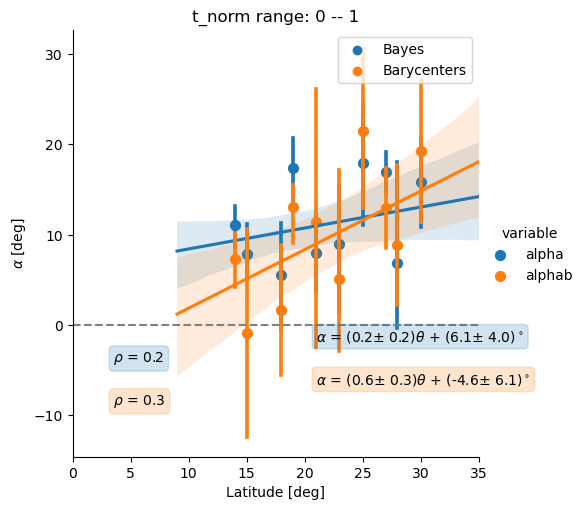

/tmp/ipykernel_24233/1747712881.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFx2=DFx2.groupby(['AR','variable']).median().reset_index()


range: (0, 0.25) / ARs: 39


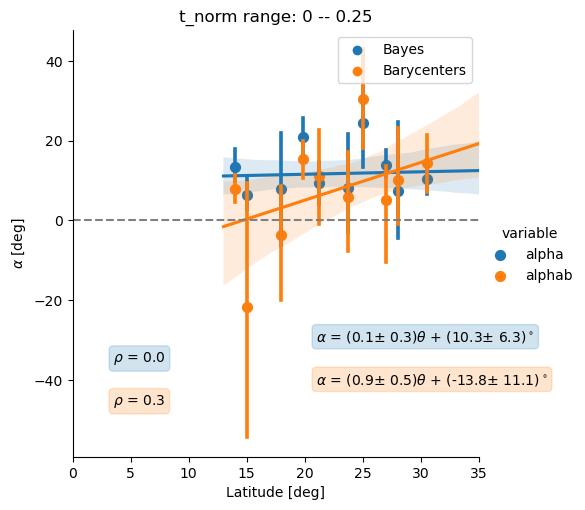

/tmp/ipykernel_24233/1747712881.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFx2=DFx2.groupby(['AR','variable']).median().reset_index()


range: (0.25, 0.5) / ARs: 45


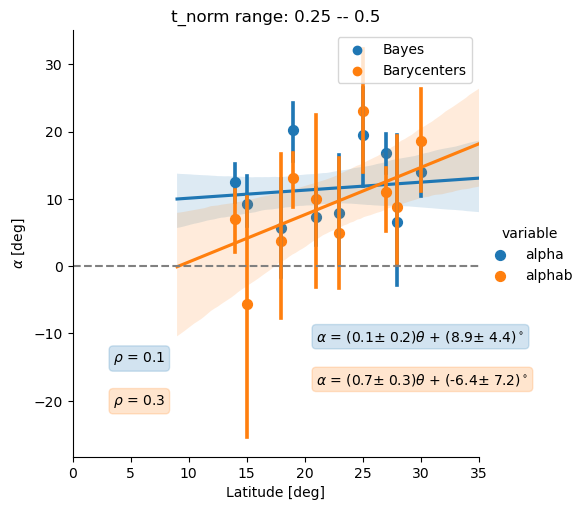

/tmp/ipykernel_24233/1747712881.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFx2=DFx2.groupby(['AR','variable']).median().reset_index()


range: (0.5, 0.75) / ARs: 45


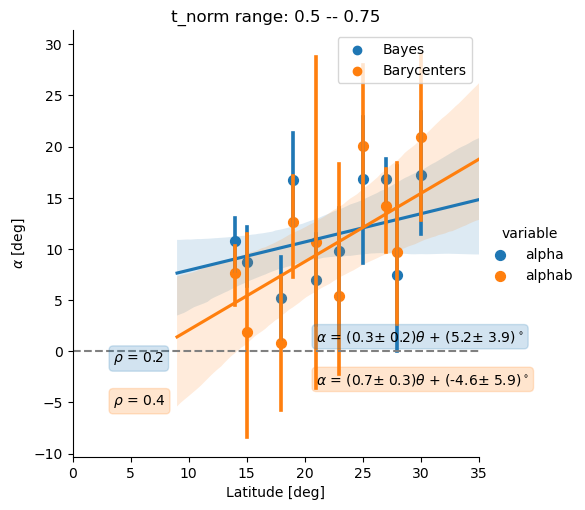

/tmp/ipykernel_24233/1747712881.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFx2=DFx2.groupby(['AR','variable']).median().reset_index()


range: (0.75, 1) / ARs: 45


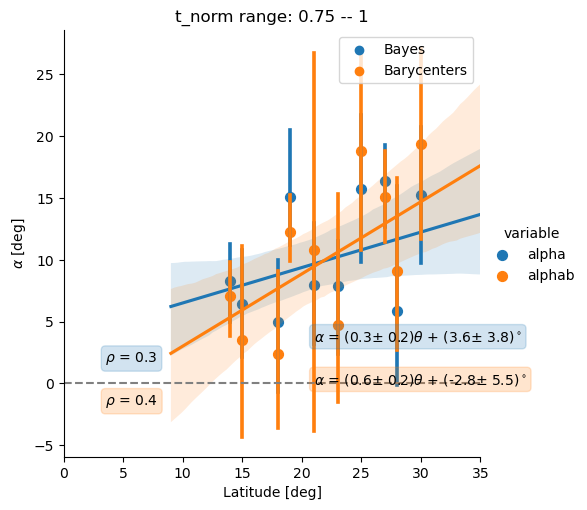

/tmp/ipykernel_24233/1747712881.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFx2=DFx2.groupby(['AR','variable']).median().reset_index()


range: (1, 2) / ARs: 45


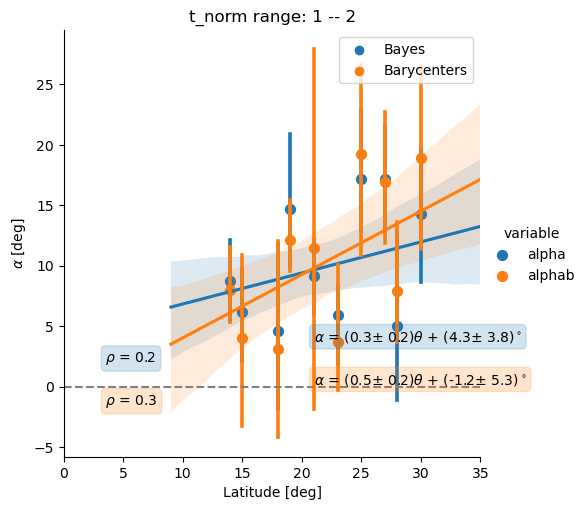

/tmp/ipykernel_24233/1747712881.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFx2=DFx2.groupby(['AR','variable']).median().reset_index()


range: (0.99, 1.1) / ARs: 45


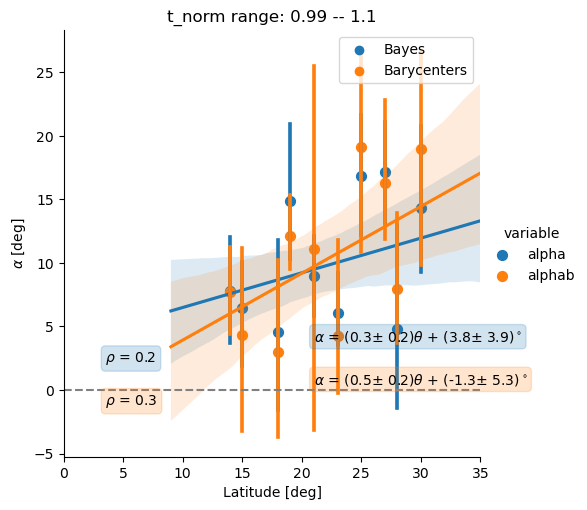

In [ ]:
from scipy.stats import t

tinv = lambda p, df: abs(t.ppf(p/2, df))



for r in [(0,1),(0,0.25),(0.25,0.5),(0.5,0.75),(0.75,1),(1,2),(0.99,1.1)]:
  #  resar=list(set(DF[DF.N0<0].AR.values))
 #   resar=list(set(DF.AR.values))
#   DFmax=DF.groupby('AR').max().reset_index()
    DFx2=DFx1[(np.abs(DFx1.t_norm) >= r[0]) & (np.abs(DFx1.t_norm) < r[1])]
    DFx2=DFx2.groupby(['AR','variable']).median().reset_index()
    DFx2 = DFx2[~DFx2['AR'].isin(ARout)].copy()
    print(f'range: {r} / ARs: {len(set(DFx2.AR))}')

    #g=sns.scatterplot(data=DFx2.assign(lata=lambda x:np.abs(x.lat)),x='lata',y='value',hue='variable',alpha=0.3)
    sns.lmplot(data=DFx2.assign(lata=lambda x:np.abs(x.lat)),x='lata',y='value',hue='variable',x_bins=10)
    #g=sns.lineplot(
    #    data=DFx2.assign(lata=lambda x:np.abs(x.lat),latm=lambda x:round(5*np.abs(x.lat))/5),
    #    x='lata',
    #    y='value',
    #    hue='variable',
    #    estimator='median',
    #    errorbar='sd',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
    #    err_style='band',   # o 'bars' para barras verticales
    #    marker='o'          # opcional para marcar puntos medios
    #)
 #   sns.lineplot(data=DFx2.groupby(['t_norm','variable']).median().reset_index(),x='t_norm',y='value',hue='variable')

    x=np.abs(DFx2[DFx2.variable=='alpha'].lat.values)
    y=DFx2[DFx2.variable=='alpha'].value.values

    ts = tinv(0.05, len(x)-2)

#    slope, intercept, rv, pv, err = stats.linregress(x, y)
    res = stats.linregress(x, y)

    textstr = fr"$\rho$ = {res.rvalue:.1f}"
    plt.text(0.1, 0.25, textstr, transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='tab:blue', alpha=0.2))

    # Agregar la pendiente y el coeficiente de correlación al gráfico
    textstr = fr"$\alpha$ = ({res.slope:.1f}$\pm$ {res.stderr:.1f})$\theta$ + ({res.intercept:.1f}$\pm$ {res.intercept_stderr:.1f})$^\circ$"
    plt.text(0.6, 0.3, textstr, transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='tab:blue', alpha=0.2))


    x=np.abs(DFx2[DFx2.variable=='alphab'].lat.values)
    y=DFx2[DFx2.variable=='alphab'].value.values

    ts = tinv(0.05, len(x)-2)

#    slope, intercept, rv, pv, err = stats.linregress(x, y)
    res = stats.linregress(x, y)

    # Agregar la pendiente y el coeficiente de correlación al gráfico
    textstr = fr"$\alpha$ = ({res.slope:.1f}$\pm$ {res.stderr:.1f})$\theta$ + ({res.intercept:.1f}$\pm$ {res.intercept_stderr:.1f})$^\circ$"
    plt.text(0.6, 0.2, textstr, transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='tab:orange', alpha=0.2))

    textstr = fr"$\rho$ = {res.rvalue:.1f}"
    plt.text(0.1, 0.15, textstr, transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='tab:orange', alpha=0.2))

    plt.xlim(0,35)
    plt.ylabel(r'$\alpha$ [deg]')
    plt.xlabel(r'Latitude [deg]')

    plt.axhline(0,linestyle='dashed',color='gray')

    plt.title(fr't_norm range: {r[0]} -- {r[1]}')

    handles, labels = g.get_legend_handles_labels()


    plt.legend(title='',handles=handles,labels=['Bayes','Barycenters'],loc='upper right')
    plt.show()

In [ ]:
from scipy.stats import t

tinv = lambda p, df: abs(t.ppf(p/2, df))



for r in [(0,1),(0,0.25),(0.25,0.5),(0.5,0.75),(0.75,1),(1,2),(0.99,1.1)]:
    DFx2=DFx1[(np.abs(DFx1.t_norm) >= r[0]) & (np.abs(DFx1.t_norm) < r[1])]
    DFx2=DFx2.groupby(['AR','variable']).median().reset_index()
    print(f'range: {r} / ARs: {len(set(DFx2.AR))}')

    #g=sns.scatterplot(data=DFx2.assign(lata=lambda x:np.abs(x.lat)),x='lata',y='value',hue='variable',alpha=0.3)
    sns.lmplot(data=DFx2.assign(lata=lambda x:np.sin(np.abs(np.pi*x.lat/180))),x='lata',y='value',hue='variable',x_bins=10)
    #g=sns.lineplot(
    #    data=DFx2.assign(lata=lambda x:np.abs(x.lat),latm=lambda x:round(5*np.abs(x.lat))/5),
    #    x='lata',
    #    y='value',
    #    hue='variable',
    #    estimator='median',
    #    errorbar='sd',      # 'sd' para desviación estándar, o 'ci' para intervalo de confianza
    #    err_style='band',   # o 'bars' para barras verticales
    #    marker='o'          # opcional para marcar puntos medios
    #)
 #   sns.lineplot(data=DFx2.groupby(['t_norm','variable']).median().reset_index(),x='t_norm',y='value',hue='variable')

    x=np.sin(np.pi*np.abs(DFx2[DFx2.variable=='alpha'].lat.values/180))
    y=DFx2[DFx2.variable=='alpha'].value.values

    ts = tinv(0.05, len(x)-2)

#    slope, intercept, rv, pv, err = stats.linregress(x, y)
    res = stats.linregress(x, y)

    textstr = fr"$\rho$ = {res.rvalue:.1f}"
    plt.text(0.1, 0.25, textstr, transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='tab:blue', alpha=0.2))

    # Agregar la pendiente y el coeficiente de correlación al gráfico
    textstr = fr"$\alpha$ = ({res.slope:.1f}$\pm$ {res.stderr:.1f})$\theta$ + ({res.intercept:.1f}$\pm$ {res.intercept_stderr:.1f})$^\circ$"
    plt.text(0.6, 0.3, textstr, transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='tab:blue', alpha=0.2))


    x=np.sin(np.pi*np.abs(DFx2[DFx2.variable=='alphab'].lat.values/180))
    y=DFx2[DFx2.variable=='alphab'].value.values

    ts = tinv(0.05, len(x)-2)

#    slope, intercept, rv, pv, err = stats.linregress(x, y)
    res = stats.linregress(x, y)

    # Agregar la pendiente y el coeficiente de correlación al gráfico
    textstr = fr"$\alpha$ = ({res.slope:.1f}$\pm$ {res.stderr:.1f})$\theta$ + ({res.intercept:.1f}$\pm$ {res.intercept_stderr:.1f})$^\circ$"
    plt.text(0.6, 0.2, textstr, transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='tab:orange', alpha=0.2))

    textstr = fr"$\rho$ = {res.rvalue:.1f}"
    plt.text(0.1, 0.15, textstr, transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round",color='tab:orange', alpha=0.2))

    #plt.xlim(0,35)
    plt.ylabel(r'$\alpha$ [deg]')
    plt.xlabel(r'Latitude [deg]')

    plt.axhline(0,linestyle='dashed',color='gray')

    plt.title(fr't_norm range: {r[0]} -- {r[1]}')

    handles, labels = g.get_legend_handles_labels()


    plt.legend(title='',handles=handles,labels=['Bayes','Barycenters'],loc='upper right')
    plt.show()

In [ ]:
DF=DF.assign(difalpha=lambda x: x.alpha-x.alphab)

In [ ]:
DFtest=DF[DF.AR.isin(ars2)]

In [ ]:
list(set(DFtest[DFtest.alpha < -50].AR))

In [ ]:
name=8016
#print(DFx1[DFx1.AR ==name])
for name in list(set(DFtest[DFtest.alpha > 60].AR)):
    sns.lineplot(DFx1[DFx1.AR ==name],x='t_norm',y='value',hue='variable',marker='o' )
    sns.lineplot(DF[DF.AR ==name],x='fint',y='alpha',marker='o' ,color='black')
    plt.title(name)
    plt.show()
#sns.lineplot(DFx1[DFx1.AR ==name],x='t_norm',y='fn',marker='o' )


In [ ]:
DFx1['t_norm']=DFx1.t_norm.apply(lambda x: f'{x:.1f}')

In [ ]:
sns.boxplot(data=DFx1,x='t_norm',y='value',hue='variable',showfliers=False)

In [ ]:
DFx1.f_grid

In [ ]:
len(tilta)

In [ ]:
tilt_meana = np.nanmedian(tilta, axis=0)
tilt_stda = np.nanstd(tilta, axis=0)

tilt_meanb = np.nanmedian(tiltb, axis=0)
tilt_stdb = np.nanstd(tiltb, axis=0)

In [ ]:
plt.plot(np.linspace(0,1,11), tilt_meana, label='Media del tilt')
plt.fill_between(np.linspace(0,1,11), tilt_meana - tilt_stda, tilt_meana + tilt_stda, alpha=0.3, label='±1σ')

plt.plot(np.linspace(0,1,11), tilt_meanb, label='Media del tilt')
plt.fill_between(np.linspace(0,1,11), tilt_meanb - tilt_stdb, tilt_meanb + tilt_stdb, alpha=0.3, label='±1σ')

In [ ]:
DF[DF.AR == 8913]

In [ ]:
# Convertir a array 2D: (n_regiones, n_fases)
tilts_array = np.array(tilts_interp_all)

# Calcular media y std (ignorando NaNs)
tilt_mean = np.nanmean(tilts_array, axis=0)
tilt_std = np.nanstd(tilts_array, axis=0)

In [ ]:
DF[DF.AR == 8913]

# OLD

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(6, 12),sharex=True)



for en,ra in enumerate([(0,12),(12,20),(20,45)]):
    axs[en].set_ylim(-5,5)

    axs[en].axhline(0,color='black')

    sns.scatterplot(data=DF[(DF.lat.abs() >=ra[0]) & (DF.lat.abs() <ra[1])],ax=axs[en],x='fint',y='rot',alpha=0.5,s=30)
    sns.scatterplot(data=DF[(DF.lat.abs() >=ra[0]) & (DF.lat.abs() <ra[1])],ax=axs[en],x='fint',y='rotb',alpha=0.5,s=30)

    sns.regplot(data=DF[(DF.lat.abs() >=ra[0]) & (DF.lat.abs() <ra[1])],ax=axs[en],x='fint',y='rot',color='tab:red',x_bins=10,label='Bayesian')
    sns.regplot(data=DF[(DF.lat.abs() >=ra[0]) & (DF.lat.abs() <ra[1])],ax=axs[en],x='fint',y='rotb',color='tab:green',x_bins=10,label='Barycenters')
    axs[en].legend()

    axs[en].text(.7,.1,rf'${ra[0]}^\circ<|lat|\leq {ra[1]}^\circ$', transform=axs[en].transAxes, fontsize=12,
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round',alpha=0.5))
#    plt.set_xlabel('Normalized flux')
    axs[en].set_ylabel(r'$\Delta \alpha$ [deg/hour]')

fig.tight_layout(pad=1.0)

axs[2].set_xlabel('Normalized flux')



In [ ]:


fig, axs = plt.subplots(2, 2, figsize=(10, 7),sharey=True,sharex=True)

axs=np.ravel(axs)

DF2x=DF2[(DF2.lat.abs() >=20) & (DF2.lat.abs() <45)]


for d in [1,2,3,4]:


    DFx=DF2x[(DF2x['frange']==d)]

    sns.histplot(data=DFx,x='rot',alpha=0.5,bins=10,binrange=(-2,2),label='Bayesian',ax=axs[d-1])

    sns.histplot(data=DFx,x='rotb',alpha=0.5,bins=10,binrange=(-2,2),label='Barycenters',ax=axs[d-1])

   # sns.histplot(data=DFx,x='ratio',alpha=0.5,bins=10,binrange=(-60,60),label='Model-Barycenters')



    axs[d-1].axvline(0,color='black',linestyle='dashed')

    axs[d-1].axvline(DFx.rot.mean(),color='tab:blue')
    axs[d-1].axvline(DFx.rotb.mean(),color='tab:orange')
    axs[d-1].text(0.05, 0.75, f"                     \n                 ",
             transform=axs[d-1].transAxes,
             fontsize=12,
             bbox=dict(facecolor='gray', edgecolor='black', boxstyle='round',alpha=0.2))

    mayores_cero=[]
    menores_cero=[]
    for en,at in enumerate(['rot','rotb']):
        # Calcular los valores mayores y menores que cero
        mayores_cero.append((DFx[at] > 0).sum())
        menores_cero.append((DFx[at] < 0).sum())

    axs[d-1].text(0.05, 0.75, f"α > 0:\nα < 0:", transform=axs[d-1].transAxes, fontsize=12)
    axs[d-1].text(0.18, 0.75, f"{mayores_cero[0]} \n{menores_cero[0]}", color='tab:blue', transform=axs[d-1].transAxes, fontsize=12)
    axs[d-1].text(0.24, 0.75, f"{mayores_cero[1]} \n{menores_cero[1]}", color='tab:orange', transform=axs[d-1].transAxes, fontsize=12)


    axs[d-1].text(0.75, 0.65, f"                ",
         transform=axs[d-1].transAxes,
         fontsize=12,
         bbox=dict(facecolor='gray', edgecolor='black', boxstyle='round',alpha=0.2))

    axs[d-1].text(0.75, 0.65, r"$\bar{\alpha}:$", transform=axs[d-1].transAxes, fontsize=12)
    axs[d-1].text(0.8, 0.65, f"{DFx.rot.mean():.1f}", color='tab:blue', transform=axs[d-1].transAxes, fontsize=12)
    axs[d-1].text(0.87, 0.65, f"{DFx.rotb.mean():.1f}", color='tab:orange', transform=axs[d-1].transAxes, fontsize=12)

       # axs[d-1].text(0.05, 0.80, f"α < 0: ,{menores_cero[1]}", transform=axs[d-1].transAxes, fontsize=12)

        # Agregar texto con la información
        # Agregar texto con formato LaTeX
#    axs[d-1].text(
#    0.05, 0.85-en/5,
 #   rf"$\alpha > 0: \color{{blue}}{{mayores_cero[0]}},{mayores_cero[1]}$"+f"\n"+
 #   rf"$\alpha < 0: {menores_cero[0]},{menores_cero[1]}$",
 #   transform=axs[d-1].transAxes,
 #   fontsize=12,




axs[1].legend()

axs[0].set_ylabel('ARs')
axs[2].set_ylabel('ARs')

axs[2].set_xlabel(r'$\Delta \alpha$ [deg/hour]')
axs[3].set_xlabel(r'$\Delta \alpha$ [deg/hour]')


fig.tight_layout(pad=1.0)

fig.show()

In [ ]:


fig, axs = plt.subplots(2, 2, figsize=(10, 7),sharey=True,sharex=True)

axs=np.ravel(axs)

for d in [1,2,3,4]:


    DFx=DF2[DF2['frange']==d]

    sns.histplot(data=DFx,x='rot',alpha=0.5,bins=10,binrange=(-2,2),label='Bayesian Model',ax=axs[d-1])

    sns.histplot(data=DFx,x='rotb',alpha=0.5,bins=10,binrange=(-2,2),label='Barycenters',ax=axs[d-1])

   # sns.histplot(data=DFx,x='ratio',alpha=0.5,bins=10,binrange=(-60,60),label='Model-Barycenters')



    axs[d-1].axvline(0,color='black',linestyle='dashed')

    axs[d-1].axvline(DFx.rot.mean(),color='tab:blue')
    axs[d-1].axvline(DFx.rotb.mean(),color='tab:orange')

    for en,at in enumerate(['rot','rotb']):
        # Calcular los valores mayores y menores que cero
        mayores_cero = (DFx[at] > 0).sum()
        menores_cero = (DFx[at] < 0).sum()

        # Agregar texto con la información
        # Agregar texto con formato LaTeX
        axs[d-1].text(
        0.05, 0.85-en/5,
        rf"$\Delta \alpha > 0: {mayores_cero}$"+f"\n"+
        rf"$\Delta \alpha < 0: {menores_cero}$",
        transform=axs[d-1].transAxes,
        fontsize=12,
        verticalalignment='top',
        bbox=dict(boxstyle="round", alpha=0.2,color=plt.cm.get_cmap('tab10')(en)))


    axs[d-1].legend()

axs[0].set_ylabel('ARs')
axs[2].set_ylabel('ARs')

axs[2].set_xlabel(r'$\Delta \alpha / \Delta t$ [deg/hour]')
axs[3].set_xlabel(r'$\Delta \alpha / \Delta t$ [deg/hour]')


fig.tight_layout(pad=1.0)

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7),sharey=True,sharex=True)

axs=np.ravel(axs)

for d in [1,2,3,4]:


    DFx=DF2[DF2['frange']==d]
    DFx=DFx.assign(ratea=lambda x: x.alpha*x.rot)
    DFx=DFx.assign(rateb=lambda x: x.alphab*x.rotb)

    sns.histplot(data=DFx,x='ratea',alpha=0.5,bins=10,binrange=(-8,8),label='Bayesian Model',ax=axs[d-1])

    sns.histplot(data=DFx,x='rateb',alpha=0.5,bins=10,binrange=(-8,8),label='Barycenters',ax=axs[d-1])

   # sns.histplot(data=DFx,x='ratio',alpha=0.5,bins=10,binrange=(-60,60),label='Model-Barycenters')



    axs[d-1].axvline(0,color='black',linestyle='dashed')

   # axs[d-1].axvline(DFx.ratea.mean(),color='tab:blue')
   # axs[d-1].axvline(DFx.rateb.mean(),color='tab:orange')

    for en,at in enumerate(['ratea','rateb']):
        # Calcular los valores mayores y menores que cero
        mayores_cero = (DFx[at] > 0).sum()
        menores_cero = (DFx[at] < 0).sum()

        # Agregar texto con la información
        # Agregar texto con formato LaTeX
        axs[d-1].text(
        0.05, 0.85-en/5,
        rf"$\alpha\Delta \alpha > 0: {mayores_cero}$"+f"\n"+
        rf"$\alpha\Delta \alpha < 0: {menores_cero}$",
        transform=axs[d-1].transAxes,
        fontsize=12,
        verticalalignment='top',
        bbox=dict(boxstyle="round", alpha=0.2,color=plt.cm.get_cmap('tab10')(en)))


    axs[d-1].legend()

axs[0].set_ylabel('ARs')
axs[2].set_ylabel('ARs')

axs[2].set_xlabel(r'$\alpha \Delta \alpha / \Delta t$ [deg**2/hour]')
axs[3].set_xlabel(r'$\alpha \Delta \alpha / \Delta t$ [deg**2/hour]')


fig.tight_layout(pad=1.0)

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7),sharey=True,sharex=True)

axs=np.ravel(axs)

for d in [1,2,3,4]:


    DFx=DF2[DF2['frange']==d]
    DFx=DFx.assign(ratea=lambda x: x.rot/x.alpha)
    DFx=DFx.assign(rateb=lambda x: x.rotb/x.alphab)

    sns.histplot(data=DFx,x='ratea',alpha=0.5,bins=20,binrange=(-1,1),label='Bayesian Model',ax=axs[d-1])

    sns.histplot(data=DFx,x='rateb',alpha=0.5,bins=20,binrange=(-1,1),label='Barycenters',ax=axs[d-1])

   # sns.histplot(data=DFx,x='ratio',alpha=0.5,bins=10,binrange=(-60,60),label='Model-Barycenters')



    axs[d-1].axvline(0,color='black',linestyle='dashed')

   # axs[d-1].axvline(DFx.ratea.mean(),color='tab:blue')
   # axs[d-1].axvline(DFx.rateb.mean(),color='tab:orange')

    for en,at in enumerate(['ratea','rateb']):
        # Calcular los valores mayores y menores que cero
        mayores_cero = (DFx[at] > 0).sum()
        menores_cero = (DFx[at] < 0).sum()

        # Agregar texto con la información
        # Agregar texto con formato LaTeX
        axs[d-1].text(
        0.05, 0.85-en/5,
        rf"$\Delta \alpha / \alpha > 0: {mayores_cero}$"+f"\n"+
        rf"$\Delta \alpha / \alpha < 0: {menores_cero}$",
        transform=axs[d-1].transAxes,
        fontsize=12,
        verticalalignment='top',
        bbox=dict(boxstyle="round", alpha=0.2,color=plt.cm.get_cmap('tab10')(en)))


    axs[d-1].legend()

axs[0].set_ylabel('ARs')
axs[2].set_ylabel('ARs')

axs[2].set_xlabel(r'$\Delta \alpha / (\alpha \Delta t)$ [1/hour]')
axs[3].set_xlabel(r'$\Delta \alpha / (\alpha \Delta t)$ [1/hour]')


fig.tight_layout(pad=1.0)

In [ ]:
sns.regplot(data=DF,y='alpha',x='fint', x_estimator=np.mean,label='Bayesian')
sns.regplot(data=DF,y='alphab',x='fint', x_estimator=np.mean,label='Barycenters')


plt.legend()
plt.ylabel(r'$\alpha$ [deg]')
plt.xlabel(r'Normalized flux')


In [ ]:
sns.regplot(data=DF,y='rot',x='fint',x_bins=[0.25,0.5,0.75,1],label='Bayesian')
sns.regplot(data=DF,y='rotb',x='fint',x_bins=[0.25,0.5,0.75,1],label='Barycenters')


plt.legend()
plt.ylabel(r'$\Delta\alpha/\Delta t$ [deg/h]')
plt.xlabel(r'Normalized flux')


In [ ]:
df_melt = DF2[['alpha','alphab','frange']].melt(['frange'], var_name='category', value_name='values')

In [ ]:
g=sns.boxplot(data=df_melt,x='frange',y='values',hue='category')
plt.gca().xaxis.set_ticklabels([0.25,0.5,0.75,1])

plt.ylabel(r'$\alpha$ [deg]')

# Edit legend title and labels
handles, labels = g.get_legend_handles_labels()
g.legend(handles, ["Bayesian", "Barycenters"], title=" ")

In [ ]:
df_melt = DF2[['rot','rotb','frange']].melt(['frange'], var_name='category', value_name='values')
g=sns.boxplot(data=df_melt,x='frange',y='values',hue='category',showfliers=False)
plt.gca().xaxis.set_ticklabels([0.25,0.5,0.75,1])

plt.ylabel(r'$\Delta\alpha/\Delta t$ [deg/h]')

# Edit legend title and labels
handles, labels = g.get_legend_handles_labels()
g.legend(handles, ["Bayesian", "Barycenters"], title=" ")

In [ ]:
DF2[DF2.AR == 10879][['alpha','alphab','lat','frange']]

In [ ]:
plt.plot(DF[DF.AR == 10879].alpha*180/np.pi)
plt.show()
plt.plot(DF2[DF2.AR == 10879].fint)
plt.show()
plt.plot(DF[DF.AR == 10879].alpha*180/np.pi)
plt.show()

In [ ]:
plt.plot(DF[DF.AR == 10268].alpha*180/np.pi)



In [ ]:
DF[(DF.fint > 0) & (DF.fint <= 0.25)].groupby(['AR']).mean()